### Hybrid Recommendation System with Combine Switching and Weighted for Tourism Destination in Bali

### Hybrid Recommender System using Singular Value Decomposition and Support Vector Machine in Bali Tourism

### Main Problem
- Bagaimana membangun sebuah model recommender system untuk menyelesaikan masalah cold start problem ?
- Bagaiamana hasil akurasi dengan pengujian MAE dan RMSE ?

In [1]:
import dill
dill.load_session('notebook_env.db')

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import GridSearchCV
import nltk
import warnings
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [16]:
dt_destination = pd.read_csv('dataset_destination.csv')
dt_rating = pd.read_csv('dt_rating1.csv')
dt_user = pd.read_csv('dt_user.csv')

In [3]:
dt_rating = shuffle(dt_rating)

In [196]:
dt_rating.to_csv('dt_rating1.csv')

In [17]:
dt_rating

Unnamed: 0  Rating                                             Review  \
0            8395       5  Kebersihan yang sangat dijaga dan kesehatan ya...   
1            5602       5  Indah, dan jauh dari keramaian! Permata sejati...   
2            5104       5  Sulit untuk mendapatkan untuk, tetapi ketika a...   
3           13260       1  Saya benar-benar ngeri melihat hewan-hewan kec...   
4            9791       4                                             #NAME?   
...           ...     ...                                                ...   
16946       16049       5  Banyak untuk melihat dan menavigasi melalui ba...   
16947        8763       4  Seminyak Square merupakan pusat belanja relati...   
16948        7656       5  Bibir pantai luas dengan ombak yang ramah dan ...   
16949       10482       5  terletak di sebelah Pantai Uluwatu, pantai ini...   
16950       16850       5  Tempat yang indah! Meskipun di dalam gua sanga...   

       destination_id  user_id  
0                  41     3031  
1                  21     3109  
2                  18     1913  
3                  75     1048  
4                  50     2261  
...               ...      ...  
16946             104      560  
16947              43      929  
16948              34      611  
16949              56      415  
16950             118      395  

[16951 rows x 5 columns]

<AxesSubplot:xlabel='Rating', ylabel='count'>

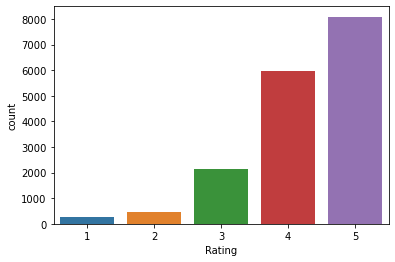

In [45]:
sns.countplot(x='Rating',data=dt_rating)

## Collaborative Filtering using SVD

#### Find Hyperparameter in SVD 

In [6]:
# algo = SVD()

In [7]:
# algo.predict(uid=15, iid=12)

In [8]:
# prediction = algo.predict(1,7)
# prediction.est

In [9]:
reader = Reader()
data = Dataset.load_from_df(dt_rating[['user_id', 'destination_id', 'Rating']], reader)

In [10]:
param_grid = {'n_factors':[50,100,150],'n_epochs':[20,30],  'lr_all':[0.005,0.01],'reg_all':[0.02,0.1]}
gs = GridSearchCV(SVD, param_grid, measures=["rmse", "mae"], cv=3)
gs.fit(data)
print(gs.best_score["rmse"])
print(gs.best_params["rmse"])

0.8452563609667086
{'n_factors': 50, 'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.1}


In [11]:
algo = SVD(n_factors=50, n_epochs=20,lr_all=0.005,reg_all=0.1)

In [12]:
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8113  0.8475  0.8742  0.8504  0.8523  0.8479  0.8286  0.8413  0.8570  0.8565  0.8467  0.0162  
MAE (testset)     0.6496  0.6689  0.6833  0.6721  0.6665  0.6753  0.6598  0.6720  0.6759  0.6632  0.6687  0.0090  
Fit time          0.47    0.49    0.47    0.51    0.93    1.53    0.85    0.75    0.82    0.89    0.77    0.31    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.01    0.02    0.01    0.01    0.01    0.00    


{'test_rmse': array([0.81134517, 0.8475217 , 0.87421953, 0.85039276, 0.85226068,
        0.84790861, 0.82862116, 0.84133373, 0.85703831, 0.85646508]),
 'test_mae': array([0.64961374, 0.66893644, 0.68326246, 0.67207994, 0.66653136,
        0.67531243, 0.65977181, 0.67195566, 0.67591265, 0.66316191]),
 'fit_time': (0.4655137062072754,
  0.4876697063446045,
  0.4721829891204834,
  0.5077648162841797,
  0.9278738498687744,
  1.530221939086914,
  0.8503410816192627,
  0.7474584579467773,
  0.8158750534057617,
  0.8872199058532715),
 'test_time': (0.008022069931030273,
  0.00802302360534668,
  0.008019685745239258,
  0.010421037673950195,
  0.012157201766967773,
  0.010167360305786133,
  0.010561943054199219,
  0.01992177963256836,
  0.014177083969116211,
  0.010215282440185547)}

#### Code for Collaborative Filtering Using SVD

In [13]:
reader = Reader(rating_scale=(1, 5))

In [14]:
dt_destination.head()

destination_id          Destination Name  Rating  Total Review  \
0               1  Mandala Suci Wenara Wana       4        34.872   
1               2              Gunung Agung       4       455.000   
2               3             Waterbom Bali       4        15.502   
3               4         Pantai Double Six       4         2.031   
4               5           Pantai Seminyak       4         5.637   

                             Category  \
0  Area Wisata Alam& Taman Margasatwa   
1                          Pegunungan   
2                           Taman Air   
3                              Pantai   
4                              Pantai   

                                            Location         Duration   \
0            Jl. Monkey Forest, Ubud 80571 Indonesia           1-2 jam   
1  Besakih, Kecamatan Karangasem, Kabupaten Karan...  Lebih dari 3 jam   
2            Jl. Kartika Plaza, Kuta 80361 Indonesia  Lebih dari 3 jam   
3  Legian, Jl. Double Six, Seminyak, Kuta, Kabupa...           2-3 jam   
4    Desa Seminyak, Kecamatan Kuta, Kabupaten Badung           2-3 jam   

   Latitude   Longitude     Regency  \
0 -8.512077  115.261053     Gianyar   
1 -8.338936  115.508228  Karangasem   
2 -8.730345  115.167818      Badung   
3 -8.696862  115.161924      Badung   
4 -8.691655  115.157316      Badung   

                                         Description  
0  Mandala Suci Wenara Wana atau disebut juga Mon...  
1  Gunung Agung adalah gunung tertinggi di pulau ...  
2  Taman bermain air yang dilengkapi dengan wahan...  
3  Pantai di Seminyak ini punya banyak daya pikat...  
4  Pantai seminyak (beberapa orang menyebutnya Pa...

In [15]:
total_destination = 120
all_destination = dt_rating.destination_id.unique()
data_cf = Dataset.load_from_df(dt_rating[['user_id', 'destination_id', 'Rating']], reader)
trainset = data_cf.build_full_trainset()
model = SVD(n_factors=100, n_epochs=20,lr_all=0.005,reg_all=0.1)
model.fit(trainset)

In [3]:
def recommend_collaborative_svd(user_id):
    already_rated_dest = dt_rating[dt_rating.user_id == user_id].destination_id
    not_rated_dest = [destination_id for destination_id in all_destination if destination_id not in already_rated_dest]
    predict_rtscore = [model.predict(user_id, destination_id).est for destination_id in not_rated_dest]
    predict_result = pd.DataFrame({'destination_id': not_rated_dest, 'predict_cf_rate' : predict_rtscore})
    print('Rating Prediction for User :',user_id)
    predict_result_cb = pd.merge(predict_result, dt_destination, on='destination_id')
    predict_result_cb = predict_result_cb[['Destination Name','destination_id','predict_cf_rate']]
    return predict_result_cb

def collaborative_filtering(user_id,destination_id,dataset):
    algo = SVD(n_factors=50, n_epochs=20,lr_all=0.005,reg_all=0.1)
    reader = Reader(rating_scale=(1, 5))
    data_new = Dataset.load_from_df(dataset[['user_id', 'destination_id', 'Rating']], reader)
    train_set = data_new.build_full_trainset()
    model = SVD(n_factors=100, n_epochs=20,lr_all=0.005,reg_all=0.1)
    model.fit(train_set)
    rat_predict_cf = model.predict(user_id, destination_id).est
    return rat_predict_cf

In [17]:
#collaborative_filtering(1,5,dt_fold_training8)

NameError: name 'dt_fold_training8' is not defined

## Content Based Filtering

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re

### Build Item Profiles

In [19]:
dt_destination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   destination_id    120 non-null    int64  
 1   Destination Name  120 non-null    object 
 2   Rating            120 non-null    int64  
 3   Total Review      120 non-null    float64
 4   Category          120 non-null    object 
 5   Location          120 non-null    object 
 6   Duration          120 non-null    object 
 7   Latitude          120 non-null    float64
 8   Longitude         120 non-null    float64
 9   Regency           120 non-null    object 
 10  Description       120 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 10.4+ KB


In [20]:
dt_destination.head()

destination_id          Destination Name  Rating  Total Review  \
0               1  Mandala Suci Wenara Wana       4        34.872   
1               2              Gunung Agung       4       455.000   
2               3             Waterbom Bali       4        15.502   
3               4         Pantai Double Six       4         2.031   
4               5           Pantai Seminyak       4         5.637   

                             Category  \
0  Area Wisata Alam& Taman Margasatwa   
1                          Pegunungan   
2                           Taman Air   
3                              Pantai   
4                              Pantai   

                                            Location         Duration   \
0            Jl. Monkey Forest, Ubud 80571 Indonesia           1-2 jam   
1  Besakih, Kecamatan Karangasem, Kabupaten Karan...  Lebih dari 3 jam   
2            Jl. Kartika Plaza, Kuta 80361 Indonesia  Lebih dari 3 jam   
3  Legian, Jl. Double Six, Seminyak, Kuta, Kabupa...           2-3 jam   
4    Desa Seminyak, Kecamatan Kuta, Kabupaten Badung           2-3 jam   

   Latitude   Longitude     Regency  \
0 -8.512077  115.261053     Gianyar   
1 -8.338936  115.508228  Karangasem   
2 -8.730345  115.167818      Badung   
3 -8.696862  115.161924      Badung   
4 -8.691655  115.157316      Badung   

                                         Description  
0  Mandala Suci Wenara Wana atau disebut juga Mon...  
1  Gunung Agung adalah gunung tertinggi di pulau ...  
2  Taman bermain air yang dilengkapi dengan wahan...  
3  Pantai di Seminyak ini punya banyak daya pikat...  
4  Pantai seminyak (beberapa orang menyebutnya Pa...

In [21]:
dt_item_prof = dt_destination.copy()

In [22]:
import re
features_extract = ['Duration ','Description','Regency']
for column in features_extract:
    dt_item_prof[column] = dt_item_prof[column].apply(lambda x: x.lower())
    dt_item_prof[column] = dt_item_prof[column].apply(lambda x: re.sub('[^a-zA-Z 0-9]', ' ',x))

In [23]:
dt_item_prof = dt_item_prof[['destination_id','Destination Name','Duration ','Regency','Description']]

In [24]:
dt_item_prof

destination_id          Destination Name         Duration      Regency  \
0                 1  Mandala Suci Wenara Wana           1 2 jam     gianyar   
1                 2              Gunung Agung  lebih dari 3 jam  karangasem   
2                 3             Waterbom Bali  lebih dari 3 jam      badung   
3                 4         Pantai Double Six           2 3 jam      badung   
4                 5           Pantai Seminyak           2 3 jam      badung   
..              ...                       ...               ...         ...   
115             116         Oasis Yoga Studio           2 3 jam    seminyak   
116             117                Peek A Boo           1 2 jam    denpasar   
117             118                 Goa Gajah           1 2 jam     gianyar   
118             119            Pantai Prancak           2 3 jam      badung   
119             120        Pantai Nyang-nyang  lebih dari 3 jam      badung   

                                           Description  
0    mandala suci wenara wana atau disebut juga mon...  
1    gunung agung adalah gunung tertinggi di pulau ...  
2    taman bermain air yang dilengkapi dengan wahan...  
3    pantai di seminyak ini punya banyak daya pikat...  
4    pantai seminyak  beberapa orang menyebutnya pa...  
..                                                 ...  
115  kami memiliki lebih dari beberapa program di l...  
116  tempat yang sangat cocok untuk membawa anak be...  
117  gua gajah adalah gua buatan dari masa purbakal...  
118  pantai perancak di desa tibubeneng canggu  ber...  
119  pantai terpencil ini memiliki hamparan pasir y...  

[120 rows x 5 columns]

In [25]:
dt_item_prof['metadata_soup'] = dt_item_prof['Regency'] + ' ' + dt_item_prof['Description'] + ' ' + dt_item_prof['Duration ']

In [26]:
dt_item_prof

destination_id          Destination Name         Duration      Regency  \
0                 1  Mandala Suci Wenara Wana           1 2 jam     gianyar   
1                 2              Gunung Agung  lebih dari 3 jam  karangasem   
2                 3             Waterbom Bali  lebih dari 3 jam      badung   
3                 4         Pantai Double Six           2 3 jam      badung   
4                 5           Pantai Seminyak           2 3 jam      badung   
..              ...                       ...               ...         ...   
115             116         Oasis Yoga Studio           2 3 jam    seminyak   
116             117                Peek A Boo           1 2 jam    denpasar   
117             118                 Goa Gajah           1 2 jam     gianyar   
118             119            Pantai Prancak           2 3 jam      badung   
119             120        Pantai Nyang-nyang  lebih dari 3 jam      badung   

                                           Description  \
0    mandala suci wenara wana atau disebut juga mon...   
1    gunung agung adalah gunung tertinggi di pulau ...   
2    taman bermain air yang dilengkapi dengan wahan...   
3    pantai di seminyak ini punya banyak daya pikat...   
4    pantai seminyak  beberapa orang menyebutnya pa...   
..                                                 ...   
115  kami memiliki lebih dari beberapa program di l...   
116  tempat yang sangat cocok untuk membawa anak be...   
117  gua gajah adalah gua buatan dari masa purbakal...   
118  pantai perancak di desa tibubeneng canggu  ber...   
119  pantai terpencil ini memiliki hamparan pasir y...   

                                         metadata_soup  
0    gianyar mandala suci wenara wana atau disebut ...  
1    karangasem gunung agung adalah gunung tertingg...  
2    badung taman bermain air yang dilengkapi denga...  
3    badung pantai di seminyak ini punya banyak day...  
4    badung pantai seminyak  beberapa orang menyebu...  
..                                                 ...  
115  seminyak kami memiliki lebih dari beberapa pro...  
116  denpasar tempat yang sangat cocok untuk membaw...  
117  gianyar gua gajah adalah gua buatan dari masa ...  
118  badung pantai perancak di desa tibubeneng cang...  
119  badung pantai terpencil ini memiliki hamparan ...  

[120 rows x 6 columns]

In [27]:
#Tokenizing
import string 
import re #regex library

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

def cleaning_text(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    #remove number
    text = re.sub(r"\d+", "", text)
    return text

#melakukan remove terhadap tanda baca
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

#melakukan remove whitespace
def remove_whitespace_leadtrail(text):
    return text.strip()

#melakukan remove single char
def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

#nltk word tokenize
def word_tokenize_wrapper(text):
    return nltk.tokenize.word_tokenize(text)

In [28]:
dt_item_prof['metadata_soup'] = dt_item_prof['metadata_soup'].apply(cleaning_text)
dt_item_prof['metadata_soup'] = dt_item_prof['metadata_soup'].apply(remove_punctuation)
dt_item_prof['metadata_soup'] = dt_item_prof['metadata_soup'].apply(remove_whitespace_leadtrail)
dt_item_prof['metadata_soup'] = dt_item_prof['metadata_soup'].apply(remove_single_char)

In [29]:
dt_item_prof.head()

destination_id          Destination Name         Duration      Regency  \
0               1  Mandala Suci Wenara Wana           1 2 jam     gianyar   
1               2              Gunung Agung  lebih dari 3 jam  karangasem   
2               3             Waterbom Bali  lebih dari 3 jam      badung   
3               4         Pantai Double Six           2 3 jam      badung   
4               5           Pantai Seminyak           2 3 jam      badung   

                                         Description  \
0  mandala suci wenara wana atau disebut juga mon...   
1  gunung agung adalah gunung tertinggi di pulau ...   
2  taman bermain air yang dilengkapi dengan wahan...   
3  pantai di seminyak ini punya banyak daya pikat...   
4  pantai seminyak  beberapa orang menyebutnya pa...   

                                       metadata_soup  
0  gianyar mandala suci wenara wana atau disebut ...  
1  karangasem gunung agung adalah gunung tertingg...  
2  badung taman bermain air yang dilengkapi denga...  
3  badung pantai di seminyak ini punya banyak day...  
4  badung pantai seminyak beberapa orang menyebut...

### TF-IDF Vectors

In [30]:
from sklearn.metrics.pairwise import cosine_similarity
tf_idf = TfidfVectorizer()
dt_destination_tf_idf_described = tf_idf.fit_transform(dt_item_prof.metadata_soup)

In [31]:
dt_destination_tf_idf_described

<120x1378 sparse matrix of type '<class 'numpy.float64'>'
	with 4112 stored elements in Compressed Sparse Row format>

In [32]:
df_tfidf_d2d = pd.DataFrame(cosine_similarity(dt_destination_tf_idf_described))
index_to_destination_id = dt_item_prof['destination_id']
df_tfidf_d2d.columns = [str(index_to_destination_id[int(col)]) for col in df_tfidf_d2d.columns]
df_tfidf_d2d.index = [index_to_destination_id[idx] for idx in df_tfidf_d2d.index]

In [33]:
#matrix cosine similarity antara destination
df_tfidf_d2d

1         2         3         4         5         6         7  \
1    1.000000  0.074162  0.039477  0.051945  0.049626  0.054724  0.036297   
2    0.074162  1.000000  0.031746  0.050546  0.076106  0.044223  0.068176   
3    0.039477  0.031746  1.000000  0.052706  0.023806  0.129629  0.009956   
4    0.051945  0.050546  0.052706  1.000000  0.244807  0.060367  0.143994   
5    0.049626  0.076106  0.023806  0.244807  1.000000  0.042915  0.066600   
..        ...       ...       ...       ...       ...       ...       ...   
116  0.027368  0.037122  0.041862  0.057042  0.117375  0.188749  0.037107   
117  0.031816  0.014165  0.112876  0.079039  0.054378  0.093723  0.002163   
118  0.125903  0.105756  0.046490  0.036795  0.071159  0.036227  0.027719   
119  0.058981  0.027579  0.031619  0.095446  0.144395  0.021041  0.017168   
120  0.026971  0.042192  0.055761  0.107133  0.216003  0.026729  0.011344   

            8         9        10  ...       111       112       113  \
1    0.042448  0.053926  0.047489  ...  0.094836  0.087987  0.015805   
2    0.034383  0.075542  0.058429  ...  0.125899  0.021705  0.030903   
3    0.013487  0.028996  0.031935  ...  0.136784  0.127633  0.013789   
4    0.024818  0.159935  0.129496  ...  0.078473  0.071312  0.032252   
5    0.061341  0.191306  0.178579  ...  0.060278  0.027980  0.072757   
..        ...       ...       ...  ...       ...       ...       ...   
116  0.010181  0.035921  0.032930  ...  0.036910  0.092271  0.020683   
117  0.015071  0.034192  0.028138  ...  0.051360  0.362119  0.090863   
118  0.077629  0.062473  0.032447  ...  0.072177  0.054399  0.038544   
119  0.044301  0.187556  0.129841  ...  0.158404  0.015423  0.018534   
120  0.015368  0.190079  0.116277  ...  0.024092  0.011228  0.015711   

          114       115       116       117       118       119       120  
1    0.019934  0.002706  0.027368  0.031816  0.125903  0.058981  0.026971  
2    0.066544  0.011007  0.037122  0.014165  0.105756  0.027579  0.042192  
3    0.018453  0.033077  0.041862  0.112876  0.046490  0.031619  0.055761  
4    0.102749  0.103993  0.057042  0.079039  0.036795  0.095446  0.107133  
5    0.127089  0.057381  0.117375  0.054378  0.071159  0.144395  0.216003  
..        ...       ...       ...       ...       ...       ...       ...  
116  0.023972  0.020000  1.000000  0.165319  0.028784  0.019975  0.044440  
117  0.015176  0.061745  0.165319  1.000000  0.032638  0.021654  0.013999  
118  0.012354  0.021265  0.028784  0.032638  1.000000  0.031001  0.047317  
119  0.117060  0.057683  0.019975  0.021654  0.031001  1.000000  0.109460  
120  0.219392  0.053077  0.044440  0.013999  0.047317  0.109460  1.000000  

[120 rows x 120 columns]

### Build User Profile

In [34]:
#example using user_id 1
dt_rating_user = dt_rating[dt_rating.user_id == 2]

In [35]:
dt_rating_user

Rating                                             Review  \
15434       5  Yang terbaik adalah untuk menyewa sepeda motor...   

       destination_id  user_id  
15434              94        2

In [36]:
dt_user_data = dt_item_prof.reset_index().merge(dt_rating_user, on='destination_id')

In [37]:
dt_user_data

index  destination_id Destination Name         Duration  Regency  \
0     93              94      Danau Batur  lebih dari 3 jam  bangli   

                                         Description  \
0  danau batur adalah danau kawah di kintamani  k...   

                                       metadata_soup  Rating  \
0  bangli danau batur adalah danau kawah di kinta...       5   

                                              Review  user_id  
0  Yang terbaik adalah untuk menyewa sepeda motor...        2

In [38]:
#perhitungan pembobotan rating dengan melakukan pembagian dengan rating tertinggi yang ada pada dataset
dt_user_data['weight'] = dt_user_data['Rating']/5.

In [39]:
#hitung user profile 
user_profile = np.dot(dt_destination_tf_idf_described[dt_user_data['index'].values].toarray().T, dt_user_data['weight'].values)

In [40]:
print(user_profile)

[0. 0. 0. ... 0. 0. 0.]


In [41]:
C = cosine_similarity(np.atleast_2d(user_profile), dt_destination_tf_idf_described)

In [42]:
C[0][0]

0.09583553643663893

In [43]:
sim_data = []
for i in range(120):
    sim_data.append(C[0][i])
len(sim_data)
df = pd.DataFrame(columns=['destination_id','cosine_similarity'])
df['destination_id'] = pd.Series(range(1,121))
df['cosine_similarity'] = sim_data
df

destination_id  cosine_similarity
0                 1           0.095836
1                 2           0.279301
2                 3           0.018136
3                 4           0.032691
4                 5           0.041169
..              ...                ...
115             116           0.034350
116             117           0.001812
117             118           0.092070
118             119           0.040561
119             120           0.020664

[120 rows x 2 columns]

In [4]:
def rating_prediction_cb(df,destination_id,threshold,x):
    cosine_sim = df[df.destination_id == destination_id]
    rating = (x-threshold) * cosine_sim.iloc[0]['cosine_similarity'] + threshold
    return rating

In [5]:
def content_based_recommender(userid,destination_id,dataset):
    x = 5
    threshold = 3.5
    destination = []
    dt_rating_user = dataset[dataset.user_id == userid]
    dt_user_data = dt_item_prof.reset_index().merge(dt_rating_user, on='destination_id')
    dt_user_data['weight'] = dt_user_data['Rating']/5.
    user_profile = np.dot(dt_destination_tf_idf_described[dt_user_data['index'].values].toarray().T, dt_user_data['weight'].values)
    C = cosine_similarity(np.atleast_2d(user_profile), dt_destination_tf_idf_described)
    sim_data = []
    for i in range(120):
        sim_data.append(C[0][i])
    df = pd.DataFrame(columns=['destination_id','cosine_similarity'])
    df['destination_id'] = pd.Series(range(1,121))
    df['cosine_similarity'] = sim_data
    return rating_prediction_cb(df,destination_id,threshold,x)

In [63]:
content_based_recommender(1,1,dt_fold_training10)

3.686254561077475

In [ ]:
#testing content_based for user 1 and destination 2
content_based_recommender(4,1)

In [ ]:
#predict all rating not rated from user id 4
#98 dan 100
pred_rating = []
already_rated_dest = dt_rating[dt_rating.user_id == 1].destination_id.to_list()
print(already_rated_dest)
not_rated_dest = [destination_id for destination_id in all_destination if destination_id not in already_rated_dest]
for i in not_rated_dest:
    pred_rating.append(content_based_recommender(4,i))
pred_rating

In [ ]:
# predict all rating from user 4
pred_rating_cb = []
for i in range(1,121):
    pred_rating_cb.append(content_based_recommender(4,i))
pred_rating_cb

## Demographic Filtering using SVM

In [64]:
dt_rating

Rating                                             Review  \
8395        5  Kebersihan yang sangat dijaga dan kesehatan ya...   
5602        5  Indah, dan jauh dari keramaian! Permata sejati...   
5104        5  Sulit untuk mendapatkan untuk, tetapi ketika a...   
13260       1  Saya benar-benar ngeri melihat hewan-hewan kec...   
9791        4                                             #NAME?   
...       ...                                                ...   
16049       5  Banyak untuk melihat dan menavigasi melalui ba...   
8763        4  Seminyak Square merupakan pusat belanja relati...   
7656        5  Bibir pantai luas dengan ombak yang ramah dan ...   
10482       5  terletak di sebelah Pantai Uluwatu, pantai ini...   
16850       5  Tempat yang indah! Meskipun di dalam gua sanga...   

       destination_id  user_id  
8395               41     3031  
5602               21     3109  
5104               18     1913  
13260              75     1048  
9791               50     2261  
...               ...      ...  
16049             104      560  
8763               43      929  
7656               34      611  
10482              56      415  
16850             118      395  

[16951 rows x 4 columns]

In [65]:
dt_user

user_id Travel_Style    Region     Country Member_Since
0           1     Keluarga   Jakarta   Indonesia     Apr 2021
1           2       Bisnis  Denpasar   Indonesia     Jan 2021
2           3       Bisnis      Ubud   Indonesia     Nov 2020
3           4     Keluarga   Jakarta   Indonesia     Mei 2016
4           5     Keluarga  Cikarang   Indonesia     Okt 2015
...       ...          ...       ...         ...          ...
3495     3496        Teman   Bintulu    Malaysia     Jan 2014
3496     3497        Teman   Bandung   Indonesia     Nov 2015
3497     3498        Teman   Jakarta   Indonesia     Nov 2015
3498     3499     Pasangan   Jakarta   Indonesia     Sep 2015
3499     3500     Keluarga  Surabaya   Indonesia     Sep 2015

[3500 rows x 5 columns]

In [66]:
dt_user.Country.nunique()

194

In [67]:
dt_user.Region.nunique()

1065

In [68]:
dt_user.Travel_Style.nunique()

5

In [81]:
dt_combine = pd.merge(dt_fold_training1, dt_user, on='user_id',how='left')

In [69]:
dt_combine = pd.merge(dt_rating, dt_user, on='user_id')

In [70]:
dt_combine = dt_combine.sort_values(by='destination_id')
dt_combine = dt_combine.reset_index(drop=True)

In [71]:
dt_combine

Rating                                             Review  \
0           4  Bersuasana adem dan asri, tempat yg merupakan ...   
1           5  Saya suka monyet secara umum sehingga peringka...   
2           4  Wajib mampir jika ke Ubud, lokasi mudah dicari...   
3           4  Yang ingin melihat kehidupan monyet2, silakan ...   
4           4  Sudah beberapa kali saya mengunjungi tempat in...   
...       ...                                                ...   
16946       5  Pantainya sangat bagus dan luas namun untuk me...   
16947       3  untuk mencapai pantai ini kalian harus menurun...   
16948       5  Pantai nya sangat worthed banget untuk didatan...   
16949       4  Pantai Nyang Nyang berada di balik bukit, memi...   
16950       3  Jika anda bosan dengan suasana Kuta yang hinga...   

       destination_id  user_id Travel_Style            Region         Country  \
0                   1      891     Pasangan           Jakarta       Indonesia   
1                   1     1863     Keluarga  Kota Ho Chi Minh         Vietnam   
2                   1     1106       Bisnis          Jimbaran       Indonesia   
3                   1     2968       Bisnis             Medan       Indonesia   
4                   1     1825        Teman   Auckland Tengah   Selandia Baru   
...               ...      ...          ...               ...             ...   
16946             120     2561     Pasangan            London    Inggris Raya   
16947             120     1064        Teman          Surabaya       Indonesia   
16948             120     2060        Teman         Melbourne       Australia   
16949             120     1226     Pasangan         Hong Kong            Cina   
16950             120     1175     Keluarga         Pontianak       Indonesia   

      Member_Since  
0         Agu 2015  
1         Mei 2016  
2         Agu 2016  
3         Nov 2019  
4         Feb 2016  
...            ...  
16946     Jul 2014  
16947     Agu 2018  
16948     Sep 2012  
16949     Jun 2012  
16950     Okt 2012  

[16951 rows x 8 columns]

In [72]:
dt_combine = dt_combine[['destination_id','user_id','Travel_Style','Region','Country','Rating']]

In [74]:
list_destination_id = dt_combine.destination_id.unique()

In [6]:
def split_by_destination_id(destination_id,dataset):
    df = dataset[dataset.destination_id == destination_id]
    return df

In [78]:
dataframe['Region'] = dataframe['Region'].apply(lambda x: x.lower())
dataframe['Country'] = dataframe['Country'].apply(lambda x: x.lower())

In [79]:
dt_user_testing = dt_user[dt_user.user_id == 1]
dt_user_testing

user_id Travel_Style   Region     Country Member_Since
0        1     Keluarga  Jakarta   Indonesia     Apr 2021

In [80]:
data_combine_df = dataframe.append(dt_user_testing)
data_combine_df.head()

destination_id  user_id Travel_Style        Region        Country  \
1439             7.0      426     Keluarga      adelaide      australia   
1440             7.0     2328     Pasangan     singapura      singapura   
1441             7.0      148     Keluarga    balikpapan      indonesia   
1442             7.0     1314     Pasangan         derby   inggris raya   
1443             7.0      903        Teman  canning vale      australia   

      Rating Member_Since  
1439     4.0          NaN  
1440     5.0          NaN  
1441     3.0          NaN  
1442     5.0          NaN  
1443     4.0          NaN

In [86]:
import category_encoders as ce
one_hot_encoding =ce.OneHotEncoder(cols=['Travel_Style','Region','Country'],handle_unknown='return_nan',return_df=True,use_cat_names=True)

In [ ]:
data_encoded = one_hot_encoding.fit_transform(data_combine_df)
data_encoded.head()

In [ ]:
dt_predict_user = data_encoded.iloc[-1:]
data_encoded = data_encoded.head(-1)
y = data_encoded['Rating']
X = data_encoded.drop(['destination_id','user_id','Rating','Member_Since'], axis=1)
x_test = dt_predict_user.drop(['destination_id','user_id','Rating','Member_Since'],axis=1)

In [ ]:
x_test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
grid_predictions = grid.predict(X_test)
print(grid_predictions)

In [ ]:
rat_pred = grid.predict(x_test)
print(rat_pred)

In [7]:
def demographic_filtering_using_svm(user_id,destination_id,dataset):
    dt_combine = pd.merge(dataset, dt_user, on='user_id',how='left')
    dt_combine = dt_combine[['destination_id','user_id','Travel_Style','Region','Country','Rating']]
    dataframe = split_by_destination_id(destination_id,dt_combine)
    dataframe['Region'] = dataframe['Region'].apply(lambda x: x.lower())
    dataframe['Country'] = dataframe['Country'].apply(lambda x: x.lower())
    dt_user_testing = dt_user[dt_user.user_id == user_id]
    data_combine_df = dataframe.append(dt_user_testing)
    data_encoded = one_hot_encoding.fit_transform(data_combine_df)
    dt_predict_user = data_encoded.iloc[-1:]
    data_encoded = data_encoded.head(-1)
    y = data_encoded['Rating']
    X = data_encoded.drop(['destination_id','user_id','Rating','Member_Since'], axis=1)
    x_test = dt_predict_user.drop(['destination_id','user_id','Rating','Member_Since'],axis=1)
    param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
    grid = GridSearchCV(SVC(decision_function_shape='ovo'),param_grid,refit=True,n_jobs=-1)
    grid.fit(X,y)
    print(grid.best_estimator_)
    rating_pred_demographic = grid.predict(x_test)
    return int(rating_pred_demographic)

In [13]:
demographic_filtering_using_svm(1,1,dt_fold_training5)

SVC(C=10, decision_function_shape='ovo', gamma=0.01)


5

### Hybrid Method Recommender System

#### Weighted

In [8]:
def hybrid_weighted(user_id,destination_id,dataset,alpha,beta,gamma): 
    pred_cf = collaborative_filtering(user_id,destination_id,dataset)
    pred_cb = content_based_recommender(user_id,destination_id,dataset)
    pred_df = demographic_filtering_using_svm(user_id,destination_id,dataset)
    rating_weighted = (alpha*pred_df) + (beta*pred_cb) + (gamma*pred_cf)
    return rating_weighted

### Finding Best Alpha,Beta and Gama

In [9]:
def linear_programming_problem(dt_training,dt_test,alpha,beta,gama):
    n = len(dt_test)
    hasil = 0
    for index,row in dt_test.iterrows():
        user_id = row['user_id']
        destination_id = row['destination_id']
        rating = np.abs(hybrid_weighted(user_id,destination_id,dt_training,alpha,beta,gama) - row['Rating'])
        hasil = hasil + rating
        print(hasil)
    return hasil/n

#### using alpha = 0.2 beta = 0.1 gamma 0.7

In [17]:
##stop only one fold test
begin_time = datetime.datetime.now()
print(1)
linear_programming_problem(dt_fold_training1,dt_fold_testing1,0.2,0.1,0.7)

1
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
0.6831250106402145
SVC(C=1, decision_function_shape='ovo', gamma=1)
1.1764739405324711
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1.5915209583411247
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
4.755603464850962
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
4.764180842145761
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
4.791904926200056
SVC(C=1, decision_function_shape='ovo', gamma=1)
6.701819496329108
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
7.008001990393161
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
8.098421715123447
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
8.506580074764393
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
9.005060680559861
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
9.943457981184517
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
10.563078603318441
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
10.8014250101489

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
85.48807735853319
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
86.57194771984256
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
88.70923215579688
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
89.08314146218405
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
89.6964791323336
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
90.03171178160378
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
91.01894908153223
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
91.55719193649891
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
92.23437677569035
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
92.5182127544747
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
92.5989978325253
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
93.15599830875749
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
93.47526547980024
SVC(C=0.1, decision_function_sh

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
164.24386473817066
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
165.1374667632067
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
165.6782281404431
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
167.11656104277205
SVC(C=10, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
168.04406030329585
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
168.11826379674628
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
168.82682702645766
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
169.9947050076457
SVC(C=1, decision_function_shape='ovo', gamma=1)
173.34761464860784
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
173.95109008918692
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
174.57661366300218
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
175.99645104473316
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
176.0856414856799
SVC(

SVC(C=10, decision_function_shape='ovo', gamma=0.1)
237.84387992253266
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
238.7604907650895
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
238.85558305790804
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
239.4736295218327
SVC(C=1, decision_function_shape='ovo', gamma=1)
240.30516783565415
SVC(C=1, decision_function_shape='ovo', gamma=1)
240.81294140294082
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
241.79443615773215
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
243.86783497044075
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
244.4308285899467
SVC(C=10, decision_function_shape='ovo', gamma=1)
244.484665154565
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
244.95912580112187
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
245.18379447575836
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
245.90266948625404
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
245.953708792

SVC(C=10, decision_function_shape='ovo', gamma=0.1)
314.8470607739069
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
315.5229436079309
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
315.7367405868252
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
316.22892589018886
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
316.53042595013756
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
316.94094071852436
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
317.27410170857667
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
317.7420342274903
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
321.26345499657833
SVC(C=1, decision_function_shape='ovo', gamma=1)
322.1156011603409
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
323.3717757358005
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
323.785555846339
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
324.98010392149496
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
325.0252470946146
SVC(C

SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
390.5458879112497
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
391.3567323901785
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
391.71330284951796
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
392.75624123932283
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
393.14093936914406
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
393.4885167292789
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
393.9783277460029
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
394.66565174808613
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
395.29440546434074
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
395.46752303466394
SVC(C=1, decision_function_shape='ovo', gamma=1)
396.2424659023484
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
397.0180442252676
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
397.48429481382186
SVC(C=1, decision_function_shape='ovo

SVC(C=1, decision_function_shape='ovo', gamma=1)
465.52078440934895
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
466.32051189963016
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
466.43518888794165
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
466.6009397986632
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
467.24446475353096
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
467.8894416344126
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
469.4391013365581
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
470.4474282957404
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
470.5669804367281
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
471.3691063530077
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
471.97434833895886
SVC(C=1, decision_function_shape='ovo', gamma=1)
472.25966173529446
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
472.622913480529
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
473.0205

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
539.2931649011625
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
539.8471732813821
SVC(C=1, decision_function_shape='ovo', gamma=1)
540.4174898287514
SVC(C=10, decision_function_shape='ovo', gamma=1)
540.8216309372077
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
541.1024649838885
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
541.4774515416843
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
542.0451879413506
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
542.3801628189428
SVC(C=10, decision_function_shape='ovo', gamma=1)
543.0400294443244
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
543.6620660391732
SVC(C=1, decision_function_shape='ovo', gamma=1)
544.0736861228715
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
544.209901798476
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
547.6657923288999
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
548.0773043571677
SVC(C=0.1, decision_fu

SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
614.3612975208216
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
614.6926671513456
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
615.7398033258222
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
616.3781426575537
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
617.2496797835461
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
617.9815899117096
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
618.0024442485638
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
619.7001991354191
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
620.2342821855519
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
621.031240251983
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
621.3908497898967
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
621.7951511543837
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
621.8340220536285
SVC(C=10, decision_fu

SVC(C=1, decision_function_shape='ovo', gamma=1)
690.5058520360103
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
691.1159599973086
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
691.4758456559802
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
692.0725467618529
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
693.5081616677221
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
694.8679548542048
SVC(C=1, decision_function_shape='ovo', gamma=1)
695.1780764963238
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
696.0711644632006
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
696.4041474634272
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
696.8436595458925
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
697.4339558331054
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
697.9019240180631
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
699.0622539842427
SVC(C=0.1, decision_function_shape='ovo', gamma=1)

SVC(C=10, decision_function_shape='ovo', gamma=0.01)
766.8060656694629
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
767.6555238001438
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
767.6936673899766
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
768.0821135367646
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
768.3849322459508
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
769.1532961117838
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
769.75479475851
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
770.0914149155756
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
770.977143065565
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
771.5246380840646
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
772.5012971338383
SVC(C=1, decision_function_shape='ovo', gamma=1)
772.8909866185055
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
773.487310388009
SVC(C=0.1, decision_function_

SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
833.991184032523
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
834.0191676051525
SVC(C=1, decision_function_shape='ovo', gamma=1)
834.3556234006713
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
834.7789331454865
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
835.2260760993332
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
835.6081185055059
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
835.6245764267323
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
836.2718079225422
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
837.5052841147334
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
837.7223836333217
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
838.0847728910842
SVC(C=1, decision_function_shape='ovo', gamma=1)
839.4894955455874
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
840.1811577748597
SVC(C=0.1, decision_function_shape='ovo', gamma=1

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
913.4671389981487
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
914.142770694112
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
914.6134726700476
SVC(C=1, decision_function_shape='ovo', gamma=1)
915.2363468983057
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
915.6321489042728
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
916.3800992320495
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
917.3461019862244
SVC(C=1, decision_function_shape='ovo', gamma=1)
918.4215676426336
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
919.2900184190026
SVC(C=1, decision_function_shape='ovo', gamma=1)
920.1289910432467
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
920.5835227970239
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
920.9534070794189
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
923.4876768783565
SVC(C=1, decision_function_shape='ovo', gamma=1)
924.2840783454111
SVC(C=1, decision_fu

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
997.6568159297776
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
998.1197569808054
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
998.5787536868164
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
999.571102680546
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1000.455690807348
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1000.7114040670247
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1001.3152417672536
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
1003.3040999848811
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1003.663984223845
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1003.9401631062182
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1004.2514206256393
SVC(C=1, decision_function_shape='ovo', gamma=1)
1005.0011908148472
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1005.829898500638
SVC(C=1, decision_function_shape='ovo', gamma=1

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1070.9149962180854
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1071.737080806781
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1072.757117974447
SVC(C=1, decision_function_shape='ovo', gamma=1)
1074.3449142819152
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1074.8805174915096
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1075.662966856635
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1077.1611053740187
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1077.787625324463
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1081.3694818707754
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1082.0892755192672
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1082.8048145122589
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1083.9887892577428
SVC(C=1, decision_function_shape='ovo', gamma=1)
1084.2933070394508
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1084.5830432198677
SVC(C=1, 

0.676845339049589

#### using alpha = 0.02 beta = 0.83 gamma 0.15 (Same With Paper Kbaier)

In [10]:
begin_time = datetime.datetime.now()
dt_linear_fold1_test5 = linear_programming_problem(dt_fold_training1,dt_fold_testing1,0.02,0.83,0.15)
print(dt_linear_fold1_test5)
dt_linear_fold2_test5 = linear_programming_problem(dt_fold_training2,dt_fold_testing2,0.02,0.83,0.15)
print(dt_linear_fold2_test5)
dt_linear_fold3_test5 = linear_programming_problem(dt_fold_training3,dt_fold_testing3,0.02,0.83,0.15)
print(dt_linear_fold3_test5)
dt_linear_fold4_test5 = linear_programming_problem(dt_fold_training4,dt_fold_testing4,0.02,0.83,0.15)
print(dt_linear_fold4_test5)
dt_linear_fold5_test5 = linear_programming_problem(dt_fold_training5,dt_fold_testing5,0.02,0.83,0.15)
print(dt_linear_fold5_test5)
print(datetime.datetime.now() - begin_time)

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1.2635701054302424
SVC(C=1, decision_function_shape='ovo', gamma=1)
2.3113841514600773
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3.071776947438909
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
5.750974211832311
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
5.916923494247941
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
6.129969412621358
SVC(C=1, decision_function_shape='ovo', gamma=1)
7.798303938088229
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
8.959709763427508
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
9.674781774497493
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
10.856574969916956
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
10.981220958128809
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
11.700794684611587
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
12.707214512350776
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
13.0190903829097

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
106.9428241158321
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
108.24441626313673
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
110.14845579264946
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
111.2604313626627
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
111.3444428756074
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
112.40326728340214
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
113.61236757463317
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
114.89514974212771
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
116.16860352088658
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
116.2329740610632
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
116.46822396989221
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
117.14302947109319
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
118.33562959673719
SVC(C=0.1, decision

SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
194.47217426125712
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
195.32095253134875
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
196.50491065615515
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
196.512156656206
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
198.07642599472328
SVC(C=10, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
199.10983982270685
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
199.3961600572166
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
200.64618004063354
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
201.55598983123062
SVC(C=1, decision_function_shape='ovo', gamma=1)
204.43789808575093
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
205.6315704059244
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
206.87579206589876
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
208.193

SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
296.2515814216843
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
297.5449904947654
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
298.80442781234973
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
299.03665635798563
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
300.24792818536986
SVC(C=1, decision_function_shape='ovo', gamma=1)
301.5412447455644
SVC(C=1, decision_function_shape='ovo', gamma=1)
302.78121319050825
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
304.06577997981407
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
305.77609225131147
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
307.0096716182353
SVC(C=10, decision_function_shape='ovo', gamma=1)
307.2164564099511
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
308.4751114029377
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
308.67624618036444
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
309.0779398587

SVC(C=1, decision_function_shape='ovo', gamma=1)
389.74807746803015
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
390.4722715732791
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
391.75444395457373
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
391.943019088377
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
393.10165461291854
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
393.91222945633837
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
394.0337076600636
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
394.1931637932615
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
395.2479447873477
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
398.2265513226408
SVC(C=1, decision_function_shape='ovo', gamma=1)
398.72320234456055
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
399.52669411622435
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
399.82512751219394
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
401.00924189885154
SVC(C

SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
486.9259811446306
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
488.08981901932367
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
489.41432987709976
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
490.6162069172774
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
491.8894082388012
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
493.0119571496792
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
493.29670054076
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
494.52622726204993
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
495.7172780008408
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
496.4713006134485
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
496.68753152730125
SVC(C=1, decision_function_shape='ovo', gamma=1)
497.94991774116676
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
499.3200374257184
SVC(C=0.1, decision_fun

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
584.2185092025284
SVC(C=1, decision_function_shape='ovo', gamma=1)
585.3890442027035
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
586.5650964708227
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
586.8813955728174
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
587.4913149208768
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
588.6221922776198
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
589.8184847792821
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
590.6328804196975
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
591.2515364246613
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
591.5840899328839
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
592.8684671924909
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
593.9396845023133
SVC(C=1, decision_function_shape='ovo', gamma=1)
594.2335183230789
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
595.419019185

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
676.3576668696078
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
676.5978501632093
SVC(C=1, decision_function_shape='ovo', gamma=1)
677.2523000867918
SVC(C=10, decision_function_shape='ovo', gamma=1)
677.338053106309
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
677.6456743214508
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
678.8178296659598
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
678.9982846702221
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
679.1686533832409
SVC(C=10, decision_function_shape='ovo', gamma=1)
680.4357665517185
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
681.700143640961
SVC(C=1, decision_function_shape='ovo', gamma=1)
681.9044461684613
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
682.2790624473469
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
685.3063765459686
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
685.4963641322753
SVC(C=0.1, decision_fun

SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
769.910747963412
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
770.493408711188
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
771.2291222547096
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
771.5082658126295
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
772.7354740409758
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
774.0344553996055
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
774.377768591599
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
775.3031148628778
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
775.485651793615
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
776.7000510469896
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
777.1038636817178
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
777.9742662363238
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
778.2190327991522
SVC(C=10, decision_funct

SVC(C=1, decision_function_shape='ovo', gamma=1)
857.209329634716
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
858.3745086657907
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
859.6044904935235
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
860.65503110391
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
861.4631821139573
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
862.2469031323394
SVC(C=1, decision_function_shape='ovo', gamma=1)
862.5132762559645
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
863.8250436522878
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
864.5353862044418
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
865.6526470069116
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
866.8994162889996
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
868.1005619571008
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
868.7894748093231
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
86

SVC(C=10, decision_function_shape='ovo', gamma=0.01)
954.1572368023731
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
955.4639990769311
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
955.6523074573731
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
955.9109824797264
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
956.607240510271
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
957.9411930457311
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
959.1390169173875
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
959.4082395806885
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
960.7158682058334
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
961.9242794306821
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
963.1316750472204
SVC(C=1, decision_function_shape='ovo', gamma=1)
963.4044783330415
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
963.4767247678778
SVC(C=0.1, decision_functi

SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1043.2525012972662
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1044.4024559553682
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1044.8004959999535
SVC(C=1, decision_function_shape='ovo', gamma=1)
1045.987729332
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1046.1747473248688
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
1046.1835250726012
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1047.4003645877142
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1047.685928503746
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1047.892170896819
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1048.6657122829051
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1049.7771712877213
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1050.9986775008665
SVC(C=1, decision_function_shape='ovo', gamma=1)
1051.7615380408904
SVC(C=1, decision_function_shape='ovo', 

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1135.8418031579001
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1136.1992568907735
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1137.0528700966659
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1138.2042311510495
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1139.4865870644528
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1139.6206551734276
SVC(C=1, decision_function_shape='ovo', gamma=1)
1140.866535483429
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1141.1309322935967
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1141.7933653350547
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1143.0222325316613
SVC(C=1, decision_function_shape='ovo', gamma=1)
1143.532249019895
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1144.8589479039558
SVC(C=1, decision_function_shape='ovo', gamma=1)
1146.0545655901012
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1146.3

SVC(C=100, decision_function_shape='ovo', gamma=0.001)
1232.916332470508
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1233.8636709285731
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1234.0885329277708
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1235.652152467598
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1236.9255841884708
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
1237.8043523322083
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1238.8927545993265
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1239.6239019619459
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1240.7116248816892
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1241.0069420477353
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1241.7342338660694
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
1243.488875887503
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1244.5516832133862
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1

SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1333.708993837625
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1334.8654926684092
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1335.0431206141777
SVC(C=1, decision_function_shape='ovo', gamma=1)
1335.4022188224608
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1335.7604042742619
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1336.9506172984231
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1338.210121999575
SVC(C=1, decision_function_shape='ovo', gamma=1)
1338.9498083936373
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1340.1792307350477
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1341.3734194480776
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1342.1412446170532
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1342.4224560239695
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1345.2410726135997
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1345.6449371332283
SVC

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1426.4860120470096
SVC(C=1, decision_function_shape='ovo', gamma=1)
1427.7255887344122
0.8423159815542255
SVC(C=1, decision_function_shape='ovo', gamma=1)
0.29944011522443326
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1.5882982320826793
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2.8920959468816014
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
4.197686961864159
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
4.505130586675522
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
5.647928713034428
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
6.80658868815464
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
7.1021245293859145
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
8.150968772349989
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
9.274547917513054
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
9.466979223460822
SVC(C=1, decision_function_shape='ovo', gamma=1)
10.493747028764

SVC(C=10, decision_function_shape='ovo', gamma=0.01)
89.93835106394178
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
91.63283592523545
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
92.89226146819557
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
94.15522443841292
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
95.47975273822962
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
96.70531604215799
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
97.9397952584969
SVC(C=10, decision_function_shape='ovo', gamma=1)
98.23499706484594
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
98.43285801419553
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
99.1493719947189
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
100.38038478891232
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
101.57303342244971
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
101.8330679718842
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
102.80221196527

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
182.2897369828919
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
182.99694686311636
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
184.43529293635424
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
184.9448270977924
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
186.0951265994822
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
187.2792210043225
SVC(C=1, decision_function_shape='ovo', gamma=1)
188.48344370427972
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
188.60007602576542
SVC(C=1, decision_function_shape='ovo', gamma=1)
189.9322266159626
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
189.98938690374024
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
190.3170464055265
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
190.45862445179537
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
191.6394226962121
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
191.8524880019

SVC(C=1, decision_function_shape='ovo', gamma=1)
278.011447141556
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
278.15406948573104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
278.3237909641175
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
278.4127369731231
SVC(C=1, decision_function_shape='ovo', gamma=1)
279.6173041716969
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
280.4089286682654
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
280.56018379399734
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
280.772672657075
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
282.0316151785225
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
283.21110239803454
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
284.3859663730211
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
285.45929016759925
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
286.68886111541696
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
287.5334524964664
SVC(C=0.1, decision_function_sh

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
373.55216970663304
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
374.27673541194156
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
374.32357263845387
SVC(C=1, decision_function_shape='ovo', gamma=1)
375.4460312405972
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
376.3450441904872
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
377.4082464714016
SVC(C=1, decision_function_shape='ovo', gamma=1)
377.49273368200875
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
377.66652546181666
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
380.3396087893572
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
381.03477265316315
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
382.84098271638163
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
384.0832336750839
SVC(C=1, decision_function_shape='ovo', gamma=1)
384.3848423517722
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
385.58878880488


SVC(C=0.1, decision_function_shape='ovo', gamma=1)
478.62104503941913
SVC(C=1, decision_function_shape='ovo', gamma=1)
479.6265815331824
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
480.7175233654756
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
481.00372229466836
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
482.1093007127315
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
483.3217813176955
SVC(C=100, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
484.8594560042801
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
486.04838422077194
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
487.35489853477344
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
488.575814161541
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
489.77752335737864
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
490.14605600506246
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
491.3251633804751
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
491.594659876

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
581.6882529089252
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
582.7313171562457
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
585.2351664584827
SVC(C=1, decision_function_shape='ovo', gamma=1)
586.4321089755101
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
587.0954975481229
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
587.3715372465363
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
588.7315789024032
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
588.9816158411239
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
590.1523926062795
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
591.8034705799022
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
592.325191850486
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
592.6846793577965
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
593.4825187685063
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
593.7

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
675.19369981993
SVC(C=0.1, decision_function_shape='ovo', gamma=0.1, kernel='poly')
677.8680808167486
SVC(C=10, decision_function_shape='ovo', gamma=1)
678.2458904602082
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
679.1111024194626
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
679.86893874562
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
679.9916245157979
SVC(C=10, decision_function_shape='ovo', gamma=1)
681.2509255663444
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
681.5137690302705
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
682.6615490448222
SVC(C=1, decision_function_shape='ovo', gamma=1)
683.9147417074814
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
685.1377711850397
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
687.9256843528468
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
688.2168115223365
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
688.4042719374748
S

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
781.8433781157762
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
781.8555026129666
SVC(C=1, decision_function_shape='ovo', gamma=1)
781.9665957515098
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
783.0719846601278
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
783.247292093312
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
784.3549691907402
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
784.6498491112628
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
784.7256320376456
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
784.8703346117052
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
785.9760151498218
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
786.7939161116792
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
787.5393274063977
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
788.8178010779645
SVC(C=1, decision_function_shape='ovo'

SVC(C=1, decision_function_shape='ovo', gamma=1)
871.1714165776743
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
871.4589077644732
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
872.6633890994949
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
873.9316610976244
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
875.1164331130401
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
875.3602770168204
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
876.3334319802509
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
877.5554054759779
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
877.8324992776135
SVC(C=1, decision_function_shape='ovo', gamma=1)
878.0770253421122
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
879.401249863679
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
880.5921187771127
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
881.4200842242245
SVC(C=1, decision_function_shape='ovo', gamma=1)
881.4224243643106
SVC(C=10

SVC(C=10, decision_function_shape='ovo', gamma=1)
967.5307844594174
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
967.6371738436617
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
968.8524083401385
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
968.9670612794705
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
970.1286992390712
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
970.9489651144788
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
972.1833297535567
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
973.2897928512048
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
974.937615208748
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
975.7804803114934
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
976.9855171030586
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
978.0941518686166
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
978.6989543880863
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
980.3782932732647
S

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1052.8626657413074
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1053.6763915200313
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1053.8855934330113
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1055.072233092933
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1056.3535042483327
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1056.688778615771
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1057.9070731102486
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1059.0388723032947
SVC(C=1, decision_function_shape='ovo', gamma=1)
1059.8114919341874
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1060.0209410394336
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1060.2060441864446
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1061.3801816509595
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1062.6663994365042
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1

SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1148.4598585950523
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1149.5610353782429
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1150.7353648961819
SVC(C=10, decision_function_shape='ovo', gamma=1)
1152.0635954975683
SVC(C=1, decision_function_shape='ovo', gamma=1)
1152.1093634320996
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1152.1814850580147
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1152.251797226219
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1152.406482506144
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1152.625335473139
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1153.989687744448
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1156.747907267159
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1157.2449940632123
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1157.7700225199133
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1157.9271303945536
SVC(C=

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1238.3446966674398
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1239.4676473939296
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1242.480214905135
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
1243.7635028406742
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1243.8755536234255
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1244.1315669158428
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1245.143239942146
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1246.3190726803223
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1247.0971279159576
SVC(C=1, decision_function_shape='ovo', gamma=1)
1248.8393323344483
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1249.3575977261764
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1249.627665929198
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1249.824690656893
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1251.03755730

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1336.510970555004
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1337.7164245758343
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1340.3551970124088
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1340.5863281111513
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1341.8050823318886
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1343.0556283449623
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1343.3672645869394
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1344.5078112925937
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1345.6393771957605
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1346.8286247091642
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1347.0185819687456
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1348.3230147023203
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1351.1565581539555
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
13.38535250732888
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
14.559055007207906
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
17.134915538475035
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
18.553994213674503
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
18.850507146074214
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
19.559501144254423
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
20.708396534646692
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
21.019936697450692
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
22.311813540007204
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
23.530915038850118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
24.69417834393102
SVC(C=10, decision_function_shape='ovo', gamma=1)
25.71084822928269
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
26.540955613516104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
27.68044

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
105.26438491627937
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
105.46109462785111
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
106.68114783157361
SVC(C=0.1, decision_function_shape='ovo', gamma=0.1, kernel='poly')
107.83406459742177
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
109.01208576754854
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
109.11668995667344
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
110.48500967667967
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
110.89959823520005
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
112.02953750470448
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
112.22384141738628
SVC(C=1, decision_function_shape='ovo', gamma=1)
112.45203600149524
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
113.73836310106914
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
115.03648738252984
SVC(C=

SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
195.17800436398565
SVC(C=1, decision_function_shape='ovo', gamma=1)
195.4062500924738
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
196.75453771036172
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
197.99446702608716
SVC(C=1, decision_function_shape='ovo', gamma=1)
199.23502703992241
SVC(C=1, decision_function_shape='ovo', gamma=1)
199.48201759615168
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
200.80086278330123
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
201.57964513755218
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
202.25118522319784
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
203.48240038892277
SVC(C=1, decision_function_shape='ovo', gamma=1)
204.85492944902575
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
206.036085552268
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmo

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
281.57072055524213
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
281.8035883816747
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
282.4791239497964
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
283.2626240086327
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
283.387991921627
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
283.5744071786581
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
284.8105045068547
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
286.0947462278931
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
286.34104908535204
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
287.1251181732537
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
288.34010218512714
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
289.580461459986
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
289.87647802902455
SVC(C=10, decision_function_shape='ov

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
366.2234655941695
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
367.42385940079214
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
367.74372876870643
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
368.9291086452275
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
370.1319327125931
SVC(C=0.1, decision_function_shape='ovo', gamma=0.1, kernel='poly')
370.56604685082516
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
371.83601076114314
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
372.8791670813815
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
374.0594134650645
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
374.10353066892213
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
375.24435990663375
SVC(C=1, decision_function_shape='ovo', gamma=1)
375.4674826937936
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='si

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
457.88730460430963
SVC(C=1, decision_function_shape='ovo', gamma=1)
459.1566170671147
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
459.41267462611336
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
459.71564021229955
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
460.7977528275824
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
461.03293096887353
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
462.2290997061886
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
463.5155734325609
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
463.70297950904813
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
464.84199171018304
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
466.1368196011735
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
466.39723842681514
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
467.39223666066493
SVC(C=0.1, decision_function_shape='ovo', g

SVC(C=100, decision_function_shape='ovo', gamma=0.1)
554.228147800098
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
554.5469211701648
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
555.7326147189569
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
555.9432923368879
SVC(C=1, decision_function_shape='ovo', gamma=1)
555.9879588649513
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
556.2888495527291
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
557.5012236978845
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
557.5933870266116
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
558.8078563223606
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
560.1106265812896
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
560.2899172247053
SVC(C=10, decision_function_shape='ovo', gamma=1)
561.4101406366349
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
562.5368672211833
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
563.7165615320

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
652.893245853875
SVC(C=1, decision_function_shape='ovo', gamma=1)
654.1638653932775
SVC(C=1, decision_function_shape='ovo', gamma=1)
654.3767331974954
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
655.4793480616979
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
656.7102063151065
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
657.9435908549086
SVC(C=1, decision_function_shape='ovo', gamma=1)
658.2027984105654
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
659.3897884773273
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
660.696694875475
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
661.581057696452
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
661.9331166415247
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
663.2824066432368
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
663.7750166927664
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
664.9212814290806
SVC(C=

SVC(C=1, decision_function_shape='ovo', gamma=1)
742.2349081836262
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
743.4541990472437
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
744.6119989885667
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
745.7981923017882
SVC(C=1, decision_function_shape='ovo', gamma=1)
746.713020041115
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
746.9362235221478
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
748.25348764253
SVC(C=10, decision_function_shape='ovo', gamma=1)
750.0781988931006
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
751.3374031367326
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
752.5516080765643
SVC(C=1, decision_function_shape='ovo', gamma=1)
753.9005520411336
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
754.3307683582376
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
755.4351448162447
SVC(C=0.1, decision_function_shape='ovo

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
835.0215060274953
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
835.1392038257619
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
836.2420499444577
SVC(C=1, decision_function_shape='ovo', gamma=1)
836.3388347238504
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
837.7152087058791
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
838.9664021783944
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
840.1787572701903
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
840.375674596646
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
841.4439683814837
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
842.6599432378862
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
843.954101613972
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
844.2235160590413
SVC(C=100, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
844.4280766108753
SV

SVC(C=1, decision_function_shape='ovo', gamma=1)
928.1035819871564
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
928.3158037787337
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
928.6584396587838
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
929.8309046143954
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
930.0466891773291
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
931.3098343807872
SVC(C=1, decision_function_shape='ovo', gamma=1)
932.4357079493487
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
933.7336696329654
SVC(C=1, decision_function_shape='ovo', gamma=1)
933.9286342399574
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
935.213798110279
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
936.5711491002004
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
937.7308430845336
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
937.9455245763735
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
938.180959

SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1017.5928427747234
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1018.6920039926416
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
1019.8983253300509
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1020.0052433037501
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1020.2057180803513
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
1021.044857450302
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1022.3158892104577
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
1022.7246338594371
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1023.9458343170049
SVC(C=10, decision_function_shape='ovo', gamma=1)
1024.4986354244018
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1025.7559368992927
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1025.9068313804169
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1026.

SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1108.9666918422217
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
1109.1531043461644
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
1110.5491981753958
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1110.7993785470187
SVC(C=1, decision_function_shape='ovo', gamma=1)
1110.9549767597823
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1111.5753159017383
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1112.738767775245
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1113.9236478093715
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1113.9562017677824
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
1114.1661433951265
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1115.761149029988
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1116.97902572428
SVC(C=1, decision_function_shape='ovo', gamma=1)
1117.1171829074935
SVC(C=10, decision_funct

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1190.2384158449745
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
1190.412495997596
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1191.4857692985943
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1192.723138988475
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1194.0436094623049
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1195.3056169943932
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1196.2583721412461
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1197.470238750508
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
1197.8357822707383
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1200.3925330651482
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1201.5914524586774
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1202.290338573138
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1202.527531934317
SVC(C=0.1, decision_fu

SVC(C=100, decision_function_shape='ovo', gamma=0.1)
1290.5252056082115
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1291.2582139416668
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1292.4897256793442
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1293.6587892761243
SVC(C=1, decision_function_shape='ovo', gamma=1)
1294.9546028883515
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1296.1403905965028
SVC(C=1, decision_function_shape='ovo', gamma=1)
1297.4517873577236
SVC(C=0.1, decision_function_shape='ovo', gamma=0.1, kernel='poly')
1297.4539558049157
SVC(C=1, decision_function_shape='ovo', gamma=1)
1297.5169403214072
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1298.7512839848664
SVC(C=1, decision_function_shape='ovo', gamma=1)
1298.9117680029565
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1300.0202357226358
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1301.2324698091672
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel=

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1381.7731020851454
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
1382.985743408608
SVC(C=10, decision_function_shape='ovo', gamma=1)
1383.1924853909054
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1383.7430459982725
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1384.0996206152352
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1385.394289595806
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1386.6251071148126
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1387.788168013412
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
1387.844889952692
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1388.2399728789403
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1388.329083746757
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1389.6014300823556
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1390.7403523734135
SVC(C=10, decision_function_sha

SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
67.5736701832746
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
67.81691264523467
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
68.06970445862409
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
68.31091291101454
SVC(C=1, decision_function_shape='ovo', gamma=1)
69.60275551951864
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
70.32915340786371
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
71.481252996812
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
72.54512461639072
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
73.37539085597794
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
74.5967459248455
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
75.8429504241177
SVC(C=1, decision_function_shape='ovo', gamma=1)
76.38024327789938
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
77.37031263670993
SVC(C=10, decision_function_shape='ovo', gamma=

SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
156.60425654729798
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
156.9027098746224
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
158.21408686486248
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
160.2342427188956
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
161.31566980911646
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
161.9957340901196
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
162.1615387612535
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
163.27461845066796
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
163.5292364160855
SVC(C=1, decision_function_shape='ovo', gamma=1)
164.78920099130096
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
165.98069960077018
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
166.7142950681513
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
166.93602865639764
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel=

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
243.2178927806233
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
244.47267540244167
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
245.6214079982891
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
246.460703252372
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
247.54873384788442
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
247.85774450625962
SVC(C=1, decision_function_shape='ovo', gamma=1)
248.67084661825012
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
249.6858797675767
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
250.7428404608196
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
250.7980073065397
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
251.16155865555422
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
251.45100966215483
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
251.6731024090381
SVC(C=1

SVC(C=1, decision_function_shape='ovo', gamma=1)
331.41262726062035
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
331.6413911915058
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
332.2815869097881
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
333.31415550770083
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
333.49810492554
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
334.82883704412944
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
335.10824421707264
SVC(C=10, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
335.3077514863415
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
338.56063499768277
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
338.7102227536173
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
339.3590533100033
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='poly')
340.67483695506957
SVC(C=10, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
340.91759531455216
SVC(C=0.1, decision_functi

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
418.3252085148175
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
419.49559892502833
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
419.8172018489565
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
421.40314770711825
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
421.95120309326563
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='poly')
423.3588109487806
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
424.401423047879
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
424.62210858684114
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
425.89949878693824
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
426.5528373495388
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
426.82097359203965
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
427.1684729045824
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
428.4098783475184
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
429.04490027951954
SVC(C=1, dec

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
513.0273575410436
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
514.1869126887942
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
514.4229481072573
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
515.6400722088586
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
516.8916582875396
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
518.0390058350247
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
519.353018075372
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
520.6191092978086
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
522.9774953825753
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
523.052625554656
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
523.2453423773551
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
523.6854415850061
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
523.8921550794288
SVC(C=0.1, decision_function_shape='ovo', gamma=1, ker

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
597.9332762196415
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
598.1794012704587
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
598.3453380630469
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
598.4942731494336
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
598.6956596850544
SVC(C=10, decision_function_shape='ovo', gamma=1)
599.8241754730852
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
600.1293654369285
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
600.3793753261001
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
600.5928457353452
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
601.708612179428
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
602.9644906139292
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
603.8228474992683
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
605.0282190797777
SVC(C=0.1, decision_function_shape=

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
685.2518996532436
SVC(C=10, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
685.53848858087
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
686.2659200647561
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
687.386601412235
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
688.4721857839039
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
689.7647666788996
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
690.871640377789
SVC(C=10, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
691.0202921605992
SVC(C=1, decision_function_shape='ovo', gamma=1)
692.2442499894128
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
692.513142509372
SVC(C=1, decision_function_shape='ovo', gamma=1)
693.5345151211959
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
694.6957345901671
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
695.6276385938545
S

SVC(C=10, decision_function_shape='ovo', gamma=1)
776.1667973855617
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
777.2984338977507
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
778.036849456066
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
779.2726123266914
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
780.4818961076996
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
781.6796568164369
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
782.9410839266884
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
783.2468239760044
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
784.4387082299302
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
784.698529092076
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
784.966459492032
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
785.9726178579953
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
786.1659902210662
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
786.9143808335299
SVC(C=

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
867.4834208978023
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
868.7053714506083
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
869.5407084766288
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
869.7401557250249
SVC(C=1, decision_function_shape='ovo', gamma=1)
870.9102967482155
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
872.5540911670158
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
873.8183421264762
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
874.1342035658087
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
875.7759876924201
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
875.9701177590332
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
875.9858223242086
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
877.2379378223654
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
878.109178307238
SVC(C=0.1, dec

SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
951.5398940116344
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
952.7446278448068
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
954.0891782614228
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
954.3663302779696
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
954.5179530357776
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
955.6374915351759
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
955.8226735661818
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
956.9310306756814
SVC(C=1, decision_function_shape='ovo', gamma=1)
957.1287592149794
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
958.305903714231
SVC(C=10, decision_function_shape='ovo', gamma=1)
958.600596372174
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
958.9212712940707
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
959.8791304238941
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
960.13

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1037.821144237412
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1038.7055485480892
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1039.7101226463647
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1040.0662619509899
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1040.6934086623314
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1041.509348299197
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1041.739507457535
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1042.860461376599
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1044.4076735249791
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1044.5496707244215
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1045.407311312113
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1046.546555372487
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1047.6808760695062
SVC(C=1, decision_function_shape='ovo', gamma=1)
1048.95631

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1129.411108796341
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1129.745080994778
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1131.0803027846396
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1131.3404740690473
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1131.701216268118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1132.5169115761403
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1132.7905457178333
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1134.2139251491406
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1135.2645332798745
SVC(C=10, decision_function_shape='ovo', gamma=1)
1136.0411454782354
SVC(C=10, decision_function_shape='ovo', gamma=1)
1136.5580778917456
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1137.7897859002826
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1138.9705884355367
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1140.0547177000856
SVC(

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1225.9548033428941
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1226.9260036538676
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
1229.6816731775903
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1230.0236696462503
SVC(C=10, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
1231.2883812865473
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1232.5650077371574
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1232.573706841606
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1233.2869080802268
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1233.493349009342
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1234.6443996477512
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1235.8226151983472
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1236.9390699105932
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1237.8341614656238
SVC(C=1, decision_function_shape='ovo', gamma=1)


SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1322.656182354049
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
1323.3881176174957
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1323.6543301612278
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1324.6201914618357
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1325.7366775195578
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1326.2100192202045
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1327.4843440992404
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1327.6523464131906
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1328.4456570270577
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1329.635266863177
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1330.5263202914175
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1331.787740858993
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1332.1210878002294
SVC(C=0.1, decision_function_shape='

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
63.01191358868843
SVC(C=10, decision_function_shape='ovo', gamma=1)
64.31953480460697
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
64.46036796629241
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
65.11707409946321
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
65.74378366928215
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
66.93784559683682
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
67.05301175321173
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
68.39351264874912
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
68.65121150471892
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
69.78805044029734
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
71.07124095112056
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
72.84326734119756
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
73.17322760845055
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
74.33413153578051
SVC(C=0.1, de

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
148.2614058497702
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
149.48397675549728
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
150.65686349945855
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
150.8316983653887
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
151.18552200380975
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
154.5247619808369
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
157.30784745084503
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
157.53981095840018
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
157.6963323220395
SVC(C=1, decision_function_shape='ovo', gamma=1)
158.87532370204133
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
159.02252747444481
SVC(C=1, decision_function_shape='ovo', gamma=1)
159.15535491315293
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
160.35482997178391
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='si

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
250.88292009074277
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
251.1798330469778
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
252.34984182582474
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
252.6573807224358
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
252.89753783447787
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
254.05072851014873
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
254.98431092835165
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
256.2685884061615
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
257.5130231360722
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
258.53627257180705
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
259.5165844723685
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
259.80973626486133
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
260.9977645083487
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
262.045584

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
349.9842523016961
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
351.1537723564225
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
351.394005784939
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
352.63527429109365
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
353.34032102396367
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
353.49186048468937
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
353.56340098119455
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
353.82947458050097
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
355.80089190523586
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
357.00536743933776
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
358.2007608680792
SVC(C=1, decision_function_shape='ovo', gamma=1)
358.4966148932995
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
359.55430501732116
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
359.7

SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
443.23944412204935
SVC(C=1, decision_function_shape='ovo', gamma=1)
443.39384595137415
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
443.601507866164
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
443.7945979843534
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
445.08634010603043
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
445.33486721844855
SVC(C=1, decision_function_shape='ovo', gamma=1)
445.63692244136456
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
446.4621826057601
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
447.6658411165913
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
447.71731075156333
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
448.88723129866946
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
449.17509906117385
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
450.4988677267023
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
451.8

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
543.790163908
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
543.817122526521
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
544.0147779568663
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
544.1366473460072
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
544.9419306280456
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
545.4671873517639
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
545.677531546623
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
546.3010009557032
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
547.0906009269434
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
549.0586312115712
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
549.2309376766627
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
549.8234797823129
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
550.1275258143266
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
550.506571455612
SVC(C=0.1, decision_

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
637.8742715550256
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
638.9613901778207
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
639.4217437749546
SVC(C=1, decision_function_shape='ovo', gamma=1)
640.1823385142111
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
642.0809272086549
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
642.3274766744016
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
643.5523465604434
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
644.671541877695
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
644.729075705624
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
645.905831780344
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
647.0166167588479
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
647.278667289207
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
647.4322004094346
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
648.5453254003231
SVC(C=1, decision_function_shape='ovo', 

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
731.7134753848693
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
732.9869955245624
SVC(C=1, decision_function_shape='ovo', gamma=1)
733.0686176539965
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
733.8133873313784
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
733.8376298456294
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
735.032883188793
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
736.2156461244163
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
737.4898899191678
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
737.634523989954
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
738.9179256410923
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
739.9969785484973
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
741.1489422102759
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
742.3091630057139
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
742.8901591360295
SVC(C=0.1, dec

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
833.7476601165837
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
834.7775710786626
SVC(C=1, decision_function_shape='ovo', gamma=1)
835.0449459571362
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
836.1734816224756
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
837.9843224705775
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
838.0316310905822
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
838.0901725470019
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
838.3944586244993
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
839.5791829409061
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
840.4750395417558
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
840.7033951755928
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
841.1912149889432
SVC(C=1, decision_function_shape='ovo', gamma=1)
841.4216928631429
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
842.5494513282365
SVC(C=0.1, decision_function_shape='

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
926.930348999751
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
927.6470790516147
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
927.8524084244598
SVC(C=1, decision_function_shape='ovo', gamma=1)
929.1033183801638
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
929.2223898285556
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
929.5200835828941
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
930.5079693908117
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
931.2332385319576
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
931.3197566560667
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
931.5545414016431
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
932.8218750289806
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
934.0080314636458
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
935.1887084286633
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
936.4183738439776
SVC(C=0.1, decision_function_shape=

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1028.7179209744643
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1029.5038364984757
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1029.760062500868
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1031.0006090597326
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1031.055142359514
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1032.1938449858176
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1033.6951225530388
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1034.345093669538
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1034.5765966750912
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1034.5781973473674
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1034.846331499995
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1036.0351420818474
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1036.329528062233
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1039.069

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1123.5561593242105
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1124.679622008566
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1125.904493175249
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1125.969725740568
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1126.0169730346677
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1127.1861232920432
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1128.0316767737386
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1128.1511393627538
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1129.4005538442668
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1129.4968675709379
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1129.6758429038034
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1130.9380879635626
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1131.131670834101
SVC(C=10, decision_function_shape='ovo', gamma=1)
1131.5445288845006
SVC(C=10, decision_fu

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1208.3198290205974
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1209.5634872470935
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1210.346118895226
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1211.3825850659007
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1212.4927428778992
SVC(C=0.1, decision_function_shape='ovo', gamma=0.1)
1212.7786776959783
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1213.4091193256475
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1213.6312420021507
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1214.3820290522847
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1214.6831158712148
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1215.5057692568387
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1216.794009393907
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1218.016167706959
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1219.0181767340302


SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1294.8762117856193
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1295.9113197273703
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1297.0637799360159
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1297.8373210942325
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1298.5558358952103
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1298.8874462948077
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1299.9778454553023
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1301.0394440686946
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1302.465309882489
SVC(C=10, decision_function_shape='ovo', gamma=1)
1303.6909897741484
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
1304.9936666016013
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
1306.2896382405975
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1307.6188729413836
SVC(C=0.1, decision_function_shape='ovo', gamma=

SVC(C=1, decision_function_shape='ovo', gamma=1)
1387.5302666083646
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1388.370944931524
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1390.0566006374647
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1391.2683817055326
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1392.1643266954136
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1392.2369207635743
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1393.3060363285529
0.8220094609607982
5:17:57.049249


In [11]:
print(dt_linear_fold1_test5)
print(dt_linear_fold2_test5)
print(dt_linear_fold3_test5)
print(dt_linear_fold4_test5)
print(dt_linear_fold5_test5)
average = (dt_linear_fold1_test5 + dt_linear_fold2_test5 + dt_linear_fold3_test5 + dt_linear_fold4_test5 + dt_linear_fold5_test5)/5
print('Average hasil percobaan : ',average)

0.8423159815542255
0.8418666702653703
0.8297376902135719
0.7977876259335942
0.8220094609607982
Average hasil percobaan :  0.826743485785512


#### using alpha = 0.2 beta = 0.05 gamma 0.75

In [19]:
##stop only one fold testing
begin_time = datetime.datetime.now()
print(1)
print(linear_programming_problem(dt_fold_training1,dt_fold_testing1,0.2,0.05,0.75))
print(datetime.datetime.now() - begin_time)

1
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
0.6074300375945789
SVC(C=1, decision_function_shape='ovo', gamma=1)
1.0950723096436308
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1.427201967219072
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
4.7209693658014045
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
4.793293115904337
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
4.8149550952526905
SVC(C=1, decision_function_shape='ovo', gamma=1)
6.686578302559541
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
6.935538612460223
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
7.9805048546585855
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
8.346493129751222
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
8.866198872831987
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
9.744700723633889
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
10.311554646093072
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
10.47602881767

SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
84.78973295434284
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
86.91688060122047
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
87.3002986163365
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
87.91982388414905
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
88.26619823640821
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
89.15582079325554
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
89.65742565182966
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
90.2454121205396
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
90.52326372807129
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
90.58861194806977
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
91.1600020437238
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
91.38251606044854
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
91.97823125210974
SVC(C=10, dec

SVC(C=10, decision_function_shape='ovo', gamma=0.01)
161.38660761836877
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
161.99409186148742
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
163.3074287105125
SVC(C=10, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
164.24495864642262
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
164.37275309571274
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
164.99860017257788
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
166.27927896314065
SVC(C=1, decision_function_shape='ovo', gamma=1)
169.64389146082647
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
170.20021213751474
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
170.6945418449725
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
172.3626435372115
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
172.4916364031746
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
173.0533053392181
SVC(C

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
233.78022397119884
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
233.82767234795836
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
234.3667941446714
SVC(C=1, decision_function_shape='ovo', gamma=1)
235.18881053017586
SVC(C=1, decision_function_shape='ovo', gamma=1)
235.66638696819876
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
236.62592013274036
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
238.69207563363108
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
239.17770937011227
SVC(C=10, decision_function_shape='ovo', gamma=1)
239.2709263886851
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
239.61378490778577
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
239.91017051146454
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
240.7012661885451
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
240.72775591861074
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
240.98903482

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
310.26054778620005
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
310.3530556380352
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
310.8654888427488
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
311.1076006712919
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
311.4770791608741
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
311.8388779488239
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
312.2105370968288
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
315.73740006110853
SVC(C=1, decision_function_shape='ovo', gamma=1)
316.5599325000574
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
317.8576799451787
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
318.26885760970566
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
319.44522082106397
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
319.5152519590398
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
322.30833409874697
SVC(C=

SVC(C=100, decision_function_shape='ovo', gamma=0.001)
384.3149411527229
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
384.6151881079374
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
385.54155781343667
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
385.76242874344626
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
386.17006333296814
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
386.6588008637984
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
387.4179168889598
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
387.99751012598534
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
388.281262767377
SVC(C=1, decision_function_shape='ovo', gamma=1)
389.0315619659109
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
389.69570625407397
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
390.2367653085011
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
390.8083786471894
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel=

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
458.44401797556935
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
458.5882365545344
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
458.7239425512445
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
459.3750412187655
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
460.0437001806358
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
461.49752669680026
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
462.5289718545793
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
462.66784975126524
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
463.4356359991388
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
464.04925111122645
SVC(C=1, decision_function_shape='ovo', gamma=1)
464.3523564849044
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
464.6941934192364
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
465.08499992792974
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
532.3023932683287
SVC(C=1, decision_function_shape='ovo', gamma=1)
532.925330974566
SVC(C=10, decision_function_shape='ovo', gamma=1)
533.3694397325439
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
533.6857449059968
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
534.010283621212
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
534.633524156043
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
535.0207311380773
SVC(C=10, decision_function_shape='ovo', gamma=1)
535.6025662124501
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
536.197033904765
SVC(C=1, decision_function_shape='ovo', gamma=1)
536.671686631233
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
536.8572701623228
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
540.3114732622531
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
540.8057083815577
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
540.9820267195495
SVC(C=1, decision_function

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
605.9106061495463
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
607.0059303282161
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
607.5997498700574
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
608.4921586340805
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
609.1135362523148
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
609.1754881732076
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
610.9080210363323
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
611.4951913747284
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
612.2033010241297
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
612.5595898896607
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
612.9428659549243
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
612.967795646154
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
613.1631822497723
SVC(C=0.1, decisio

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
683.51624580012
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
684.086889468547
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
685.4817820272579
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
686.8281979114969
SVC(C=1, decision_function_shape='ovo', gamma=1)
687.1911123509436
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
687.978508523085
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
688.2913935424186
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
688.6252637093246
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
689.2686447842793
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
689.7616266130461
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
690.9104583790438
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
690.9334887118539
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
691.7333801972272
SVC(C=100, decision_function_shape='ovo', gamma=0.

SVC(C=10, decision_function_shape='ovo', gamma=0.01)
759.7131971379506
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
760.0984423935761
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
760.3148874472429
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
761.037211360926
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
761.6024511067267
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
762.0298832643475
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
762.9875708369472
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
763.5432028222926
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
764.5345490521942
SVC(C=1, decision_function_shape='ovo', gamma=1)
765.0220274870243
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
765.6266397156097
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
766.0740343100256
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
766.5431234469125
SVC(C=1, decision_function_shape

SVC(C=10, decision_function_shape='ovo', gamma=0.01)
826.9559898682347
SVC(C=1, decision_function_shape='ovo', gamma=1)
827.1696167603259
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
827.6481059515585
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
828.1643081748355
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
828.5495803267012
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
828.6060347714694
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
829.3026018440922
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
830.5686036428286
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
830.7206387672218
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
831.1076301529332
SVC(C=1, decision_function_shape='ovo', gamma=1)
832.5811014177365
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
833.150690269089
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
833.3201156918262
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
833.8100235039

SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
906.2163460433562
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
906.6692907440012
SVC(C=1, decision_function_shape='ovo', gamma=1)
907.2262610380892
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
907.8698555999507
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
908.6997077973455
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
909.603656116683
SVC(C=1, decision_function_shape='ovo', gamma=1)
910.5583536642916
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
911.3947085070735
SVC(C=1, decision_function_shape='ovo', gamma=1)
912.228704843136
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
912.6716254065194
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
913.0136566401418
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
915.5762206557383
SVC(C=1, decision_function_shape='ovo', gamma=1)
916.2912422275974
SVC(C=1, decision_function_shape='ovo', gamma=1)
917.722606418922
SVC(C=0.1, decision_func

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
989.9210550660822
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
990.8877430199724
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
991.6781367739354
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
991.9476923167573
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
992.5163634504036
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
994.4831960674554
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
994.7872575343321
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
995.0624523355508
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
995.336317612964
SVC(C=1, decision_function_shape='ovo', gamma=1)
995.9934900256014
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
996.8491996585557
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
997.4593091716123
SVC(C=1, decision_function_shape='ovo', gamma=1)
998.5060348596181
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
998.96691

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1062.7392929825862
SVC(C=1, decision_function_shape='ovo', gamma=1)
1064.3434003619334
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1064.768168607411
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1065.631560335415
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1067.1627747603447
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1067.6276937287716
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1071.1330461254847
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1071.9024043762795
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1072.669297364839
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1073.8924901645894
SVC(C=1, decision_function_shape='ovo', gamma=1)
1074.2432300339567
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1074.5722753001469
SVC(C=1, decision_function_shape='ovo', gamma=1)
1075.2696210436918
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1077.2686548310767
SVC(C=0.1,

#### using alpha = 0.4 beta = 0.1 gamma 0.5

In [15]:
begin_time = datetime.datetime.now()
print(1)
dt_linear_fold1_test5 = linear_programming_problem(dt_fold_training1,dt_fold_testing1,0.4,0.1,0.5)
print(dt_linear_fold1_test5)
print(datetime.datetime.now() - begin_time)

1
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
0.5166255290570465
SVC(C=1, decision_function_shape='ovo', gamma=1)
0.890348131997504
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1.1856914608608866
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
4.591238055127341
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
4.615894659213844
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
4.634265213555085
SVC(C=1, decision_function_shape='ovo', gamma=1)
6.808391816843578
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
7.057300253681868
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
7.993621276814496
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
8.303596071636846
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
8.901707498540175
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
9.842918830048248
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
10.284521727930343
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
10.72665513609666

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
82.86292776795057
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
83.93102325224842
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
86.0235144321591
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
86.35744297432618
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
87.04857478109024
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
87.34177489230045
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
88.09442593533612
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
88.5307737021728
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
89.01738483562924
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
89.21281717602842
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
89.29435802523317
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
89.69437957279561
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
89.9292882955646
SVC(C=0.1, decision_function_sh

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
161.4548034150508
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
162.33731842765414
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
162.9678044648714
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
164.20787018023938
SVC(C=10, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
164.899100556601
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
164.96170439939254
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
165.7509242596535
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
166.96539903475696
SVC(C=1, decision_function_shape='ovo', gamma=1)
170.46674429236327
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
170.9279437524445
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
171.43163454193262
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
173.14000577300334
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
173.27147262186577
SVC(C=

SVC(C=10, decision_function_shape='ovo', gamma=0.1)
233.3473575783161
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
234.28356862632302
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
234.5151963102589
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
234.9767510758483
SVC(C=1, decision_function_shape='ovo', gamma=1)
235.59185886591868
SVC(C=1, decision_function_shape='ovo', gamma=1)
236.00716870335776
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
236.99273709656674
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
238.98575681429088
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
239.3952565547469
SVC(C=10, decision_function_shape='ovo', gamma=1)
239.45216930374534
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
239.80938932510503
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
239.95403768527547
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
240.5096505453614
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
240.579907191

SVC(C=10, decision_function_shape='ovo', gamma=0.1)
309.65691991790686
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
310.17810004201885
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
310.25052716069973
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
310.72050281992836
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
310.94820824137634
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
311.51741375150556
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
311.7115183943752
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
312.0836049704775
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
315.68107937872924
SVC(C=1, decision_function_shape='ovo', gamma=1)
316.79717694364115
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
318.26058245456613
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
318.85751258207534
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
320.0318096608447
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
320.12824601901775

SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
383.4264466944749
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
384.23049413020226
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
384.50892136831885
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
385.25323422496217
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
385.55451200284443
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
386.07195265583897
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
386.4868545295892
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
387.05296888081534
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
387.4706704529991
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
387.8398689525047
SVC(C=1, decision_function_shape='ovo', gamma=1)
388.4139428101937
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
389.0426705912664
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
389.63724501157003
SVC(C=1, decision_function_shape='ovo

SVC(C=1, decision_function_shape='ovo', gamma=1)
455.54455594584067
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
456.0834995051442
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
456.4450638561953
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
456.58935947829286
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
457.1368902319383
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
457.67433159029633
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
459.2258825664366
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
460.24590097185285
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
460.32088870507783
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
461.0015514890842
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
461.4460533959309
SVC(C=1, decision_function_shape='ovo', gamma=1)
461.91516060908776
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
462.2263509971298
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
462.549

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
529.3765265926603
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
530.0258330582334
SVC(C=1, decision_function_shape='ovo', gamma=1)
530.4905989590916
SVC(C=10, decision_function_shape='ovo', gamma=1)
531.0482571996937
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
531.5249445113118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
531.8231312106851
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
532.4842084109309
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
533.0006656781334
SVC(C=10, decision_function_shape='ovo', gamma=1)
533.5249138827983
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
534.0900370107472
SVC(C=1, decision_function_shape='ovo', gamma=1)
534.668835092216
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
534.7537930910538
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
538.3341007083967
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
538.900244251041
SVC(C=0.1, decision_fun

SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
603.6894569028799
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
603.9548593172901
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
604.9640100694942
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
605.6301483918182
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
606.3106197340148
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
606.8575232007815
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
606.8941371821583
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
608.6736944595693
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
609.3063245694176
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
610.1324789068727
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
610.430680785457
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
610.7537068195313
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
610.7626245311926
SVC(C=10, decision_fu

SVC(C=1, decision_function_shape='ovo', gamma=1)
680.8222877964232
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
681.3270004396951
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
681.6374584197996
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
682.0747729567124
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
683.6060538810694
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
685.1243352020279
SVC(C=1, decision_function_shape='ovo', gamma=1)
685.5810567792739
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
686.5019530782861
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
686.7386489073564
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
687.0531624518613
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
687.556923349768
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
687.9333998285741
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
689.0539719568427
SVC(C=0.1, decision_function_shape='ovo', gamma=1)


SVC(C=10, decision_function_shape='ovo', gamma=0.01)
755.4420978257357
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
756.3497323274628
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
756.4013655192758
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
756.9067667565974
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
757.1520159131785
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
757.7352385074694
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
758.2205653560186
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
758.7375685880128
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
759.7443742253727
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
760.1447225627653
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
761.2158735196593
SVC(C=1, decision_function_shape='ovo', gamma=1)
761.7490478820691
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
762.4577350493971
SVC(C=0.1, decision_funct

SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
822.8412549008294
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
822.8473565115635
SVC(C=1, decision_function_shape='ovo', gamma=1)
823.1131949453467
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
823.6671327171599
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
824.2740113001119
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
824.634909100058
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
824.6828067534265
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
825.4143045306055
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
826.8557424276705
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
827.0632767816003
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
827.4083042577074
SVC(C=1, decision_function_shape='ovo', gamma=1)
828.9454062466814
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
829.77183096854
SVC(C=0.1, decision_function_shape='ovo', gamma=1)


SVC(C=1, decision_function_shape='ovo', gamma=0.1)
903.6872616454899
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
904.2380470515855
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
904.8433673752259
SVC(C=1, decision_function_shape='ovo', gamma=1)
905.3077470771718
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
905.952360052247
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
906.844293105938
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
907.8443900780878
SVC(C=1, decision_function_shape='ovo', gamma=1)
909.1059338237728
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
909.9886775464681
SVC(C=1, decision_function_shape='ovo', gamma=1)
910.568949056287
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
911.1112937186883
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
911.4151917280888
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
914.0368321955661
SVC(C=1, decision_function_shape='ovo', gamma=1)
914.6033219527845
SVC(C=1, decision_func

SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
989.3597112833902
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
989.7512989766176
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
990.7317365793969
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
991.6176088434845
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
991.9995839839926
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
992.4184787224118
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
994.3593713560724
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
994.6167352302715
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
994.8189284945134
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
995.0843072379507
SVC(C=1, decision_function_shape='ovo', gamma=1)
995.633999260737
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
996.4613562575568
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
996.9828626964401
SVC(C=1, decision_function_shape='ovo

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1058.1137513475844
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1059.1700698463746
SVC(C=1, decision_function_shape='ovo', gamma=1)
1060.799407378571
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1061.1905280347553
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1061.8239135419321
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1063.4003906603725
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1064.142614153013
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1067.758305227825
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1068.6160409726438
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1069.40756644127
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1070.4962196244155
SVC(C=1, decision_function_shape='ovo', gamma=1)
1070.9711705005877
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1071.4246027968468
SVC(C=1, decision_function_shape='ovo', gamma=1)
1072.009169219955
SVC(C=0.1, de

In [10]:
begin_time = datetime.datetime.now()
dt_linear_fold2_test4 = linear_programming_problem(dt_fold_training2,dt_fold_testing2,0.4,0.1,0.5)
print(dt_linear_fold2_test4)
dt_linear_fold3_test4 = linear_programming_problem(dt_fold_training3,dt_fold_testing3,0.4,0.1,0.5)
print(dt_linear_fold3_test4)
dt_linear_fold4_test4 = linear_programming_problem(dt_fold_training4,dt_fold_testing4,0.4,0.1,0.5)
print(dt_linear_fold4_test4)
dt_linear_fold5_test4 = linear_programming_problem(dt_fold_training5,dt_fold_testing5,0.4,0.1,0.5)
print(dt_linear_fold5_test4)
print(datetime.datetime.now() - begin_time)

SVC(C=1, decision_function_shape='ovo', gamma=1)
0.8304617045621132
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1.3705908709716415
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1.8752103022848061
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2.6204322427482216
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3.01743464475783
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
3.54039461528538
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
4.130470335805852
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
4.6302410295857825
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
4.918427610818198
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
5.124589079951408
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
5.793517215183971
SVC(C=1, decision_function_shape='ovo', gamma=1)
6.136587461831005
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
7.84119131868879
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
7.90521658377396
SVC(C=10, decision_

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
81.04695908805014
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
81.44362579882534
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
82.46479417474498
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
82.79058804649004
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
83.12121145091639
SVC(C=10, decision_function_shape='ovo', gamma=1)
83.3028773170888
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
83.68054578062653
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
84.68540856358143
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
85.21931022639714
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
86.18148803497539
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
86.65312438241061
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
86.93898515317791
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
87.43076605097545
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')


SVC(C=0.1, decision_function_shape='ovo', gamma=1)
148.18312710004884
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
148.96868638582689
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
149.99500917266772
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
150.2265344185933
SVC(C=1, decision_function_shape='ovo', gamma=1)
150.6687938415459
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
151.17474279988247
SVC(C=1, decision_function_shape='ovo', gamma=1)
151.61882348789058
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
152.19403276053725
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
152.62873628754215
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
152.73370414632421
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
153.8550979934204
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
154.13326514453075
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
154.25345434455565
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
220.13874929858974
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
220.2453715376845
SVC(C=1, decision_function_shape='ovo', gamma=1)
220.70760663512613
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
221.22102262685937
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
221.39715242838022
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
221.78922950192188
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
222.26074281961036
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
222.72878440018758
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
223.01057901059215
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
224.02619427944856
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
224.42524573211236
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
224.57911950876033
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
224.9887631692848
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
225.97401311771654
SVC(C=1, decision_fu

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
299.811137662429
SVC(C=1, decision_function_shape='ovo', gamma=1)
300.1841846751316
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
300.60264918251664
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
301.6544912056335
SVC(C=1, decision_function_shape='ovo', gamma=1)
302.22658803033596
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
302.2543621799318
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
304.9794841484439
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
306.15538886421444
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
308.32101689024194
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
308.79972832802207
SVC(C=1, decision_function_shape='ovo', gamma=1)
309.36969115423227
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
309.9217098423898
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
310.9940364974664
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
311.85794140496944


SVC(C=0.1, decision_function_shape='ovo', gamma=1)
377.01988222092666
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
377.48291657634127
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
377.7847094010625
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
378.72842286363635
SVC(C=100, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
379.1607620751665
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
379.39176618075976
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
379.81810593529275
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
380.2881682388581
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
380.64471083055497
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
380.77154271359956
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
381.1174541650238
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
381.32237680527555
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
381.5703525115323
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
382.1186

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
450.4419133295474
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
452.58907275324424
SVC(C=1, decision_function_shape='ovo', gamma=1)
452.74719142296857
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
453.8712699683734
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
454.3528656705493
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
456.0540286144702
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
456.66030685982776
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
457.00378663184466
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
459.2746338403389
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
459.6303228732045
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
459.9662865080844
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
460.27444293714365
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
460.7576073442826
SVC(C=1, decision_function_shape='ovo', gamma=1, k

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
519.1344388699154
SVC(C=0.1, decision_function_shape='ovo', gamma=0.1, kernel='poly')
522.2085213861471
SVC(C=10, decision_function_shape='ovo', gamma=1)
522.4822365803008
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
523.9907660779284
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
524.9737923241731
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
525.5694571907321
SVC(C=10, decision_function_shape='ovo', gamma=1)
526.5681266009863
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
527.2344072413027
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
527.9363085108316
SVC(C=1, decision_function_shape='ovo', gamma=1)
528.3584399447419
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
528.8048902121511
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
532.2933825049071
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
532.7455653557194
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
533.32392698414

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
605.3057137160429
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
605.7300740750259
SVC(C=1, decision_function_shape='ovo', gamma=1)
606.3253161710311
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
607.3167178283248
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
607.824946158313
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
609.4701818063479
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
609.9541134138557
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
610.0367403981631
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
610.624987594027
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
611.5850429567322
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
613.3013579153801
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
614.4070242738834
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
615.3296798658431
SVC(C=1, decision_function_shape='ovo',

SVC(C=1, decision_function_shape='ovo', gamma=1)
680.9411443970031
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
681.3516628911256
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
681.8238678909828
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
682.3260622986537
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
682.9320646491959
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
683.4833767093297
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
684.3611591626375
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
685.3923280252804
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
685.940052678595
SVC(C=1, decision_function_shape='ovo', gamma=1)
686.440008089858
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
686.9285691538792
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
687.2156972962853
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
688.7418687653551
SVC(C=1, decision_function_shape='ovo', gamma=1)
689.4033602496346
SVC(C=10,

SVC(C=10, decision_function_shape='ovo', gamma=1)
747.3470798299849
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
747.9749454723188
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
748.5325862504034
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
748.6990449264538
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
748.87878082882
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
749.2526475447639
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
749.8077850273212
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
750.6341476487728
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
752.7784637175491
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
753.6856142996191
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
754.0455124043485
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
754.2718098451462
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
755.4016521092155
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
757.7113129143218
SV

SVC(C=10, decision_function_shape='ovo', gamma=0.1)
822.8859241380363
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
823.3933833910856
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
823.7832960681847
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
824.4062971920691
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
824.4980820695909
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
824.9348038088964
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
825.7067151670241
SVC(C=1, decision_function_shape='ovo', gamma=1)
826.641233113623
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
826.7766381127768
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
826.8653961361928
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
827.2370790707803
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
828.2665558719837
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
828.6760615496842
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
829.258174197

SVC(C=10, decision_function_shape='ovo', gamma=1)
903.1945444906445
SVC(C=1, decision_function_shape='ovo', gamma=1)
903.9009435969799
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
903.9642114337764
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
904.3526945510995
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
904.8502612699267
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
904.9181555822055
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
905.5735337369817
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
909.0159824617798
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
909.1891831161477
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
910.120847690601
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
910.6041289056578
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
911.0686751357563
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
912.7421621466455
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
913.6863500673213
SVC(C=10, decisio

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
980.9776491178955
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
981.2325124000777
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
981.9280376512677
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
982.9732380001136
SVC(C=1, decision_function_shape='ovo', gamma=1)
984.8976524981287
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
985.0813100955114
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
985.5414796191475
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
986.2188724239479
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
987.1094417493584
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
987.8569711755418
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
988.4758770440474
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
989.6080675476015
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
989.7250416382565
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
990.3589115982422
SVC(C=0.1, decision_

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1057.1969348509833
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1057.7332935467841
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1058.6800465003087
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1059.0678770964944
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1059.4887378099756
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1059.610790077714
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1060.1323031842194
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1063.840489232176
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1063.9076723301368
SVC(C=1, decision_function_shape='ovo', gamma=1)
1064.5325907183053
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1066.0981776862973
SVC(C=1, decision_function_shape='ovo', gamma=1)
1066.4296735501373
SVC(C=1, decision_function_shape='ovo', gamma=1)
1067.0365398699057
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1067.4990894119603
SVC(C=0

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
16.470014271313353
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
16.846192934025943
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
16.893449684477943
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
17.43452625297433
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
17.945007761041968
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
18.354284395180656
SVC(C=10, decision_function_shape='ovo', gamma=1)
18.672308609330184
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
19.65434066599539
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
19.989441604502822
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
20.2137007385316
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
22.00037569365942
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
23.00395262260664
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
23.326391530607793
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
26.91888179269059
SVC(C=10,

SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
82.02917231080991
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
82.68342068428608
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
83.36142162990568
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
84.15139548283216
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
84.15760486533459
SVC(C=1, decision_function_shape='ovo', gamma=1)
84.82820843492365
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
85.81586088735229
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
87.57952438901144
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
87.95214811669858
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
89.35444478567709
SVC(C=1, decision_function_shape='ovo', gamma=1)
89.69648751528312
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
91.25147638869257
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
91.75437968009392
SVC(C=0.1, decision_funct

SVC(C=1, decision_function_shape='ovo', gamma=1)
149.24071623378453
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
150.114679986299
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
151.6453490031123
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
152.9080354163418
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
153.38514218114796
SVC(C=1, decision_function_shape='ovo', gamma=1)
154.53698419284413
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
155.04733870644807
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
155.96221281538382
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
156.51634981608908
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
156.9383794383175
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
158.43149511652683
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
158.91674497571628
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoi

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
224.07773642688588
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
225.03662814232578
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
225.7698703433767
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
226.30634780670388
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
226.76927424864988
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
227.2508365370014
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
227.42443525569402
SVC(C=10, decision_function_shape='ovo', gamma=1)
227.75424607580786
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
229.30495523838277
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
229.48744792509734
SVC(C=1, decision_function_shape='ovo', gamma=1)
230.52332431079657
SVC(C=1, decision_function_shape='ovo', gamma=1)
230.95693668095714
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
231.2570357405761
SVC(C=1, decision_function_shape

SVC(C=0.1, decision_function_shape='ovo', gamma=0.1, kernel='poly')
293.2851160840322
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
293.74777022065666
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
294.72790893325725
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
295.69089048524137
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
296.22358456832495
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
296.57405873241106
SVC(C=1, decision_function_shape='ovo', gamma=1)
297.21312771168425
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
297.25912466434323
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
297.7536875555339
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
298.3888470779328
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
299.23824302151786
SVC(C=1, decision_function_shape='ovo', gamma=1)
299.64529102958863
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
300.

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
360.435823151807
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
360.9013649598734
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
361.4596631764947
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
361.5989065196071
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
362.0152654788198
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
362.53801367550676
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
363.2468575765568
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
364.25739890390093
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
365.2933147072934
SVC(C=1, decision_function_shape='ovo', gamma=1)
365.63042232933066
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
365.960344860191
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
366.24124176824415
SVC(C=0.1, decision_function_shape='ovo', gamma=0.1, kernel='poly')
368.5095305724919
SVC(C=10, decision_function_shape='ovo', gamma=0

SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
430.37707553307047
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
430.7335352427224
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
431.3230928305431
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
432.13786085939216
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
432.7192458108225
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
433.28063454855663
SVC(C=10, decision_function_shape='ovo', gamma=1)
433.6332685786718
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
433.9455934317967
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
434.4599416452564
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
435.16171304822194
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
435.40284246345453
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
436.47489384326974
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
437.5657536410422
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
438.223

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
500.4562995972903
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
500.97533572916683
SVC(C=1, decision_function_shape='ovo', gamma=1)
501.50204588279723
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
501.8518966366682
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
502.30780762292034
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
503.2777352774541
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
503.6988448472129
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
504.19519983804025
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
504.2941519050388
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
504.59849328284565
SVC(C=1, decision_function_shape='ovo', gamma=1)
504.8220236053667
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
505.2112578223659
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
507.6412417428598
SVC(C=1, decision_function_shape='ovo', gamma=

SVC(C=100, decision_function_shape='ovo', gamma=0.001)
568.3692718023929
SVC(C=1, decision_function_shape='ovo', gamma=1)
568.7582834926055
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
568.7863554588744
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
569.7695799130449
SVC(C=10, decision_function_shape='ovo', gamma=1)
572.3532887460962
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
572.8569787630755
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
573.2239031922086
SVC(C=1, decision_function_shape='ovo', gamma=1)
573.7199714406269
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
574.0282374788202
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
574.613229242255
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
575.1050748045293
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
576.027866782291
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
577.1817367746753
SVC(C=0.1, decision_function_shape='ovo', gamma=1)


SVC(C=1, decision_function_shape='ovo', gamma=1)
647.8434037167269
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
648.6741578369011
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
649.1507649497306
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
649.4585255480725
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
650.1227880620589
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
650.5306568013013
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
651.0417128117564
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
652.0972688847328
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
652.5934444898984
SVC(C=100, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
652.7783803134835
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
653.3287234830046
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
654.3571387555954
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
722.9154487820564
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
723.5970728787869
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
724.2016124406625
SVC(C=1, decision_function_shape='ovo', gamma=1)
724.4750256648401
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
724.9421096374078
SVC(C=1, decision_function_shape='ovo', gamma=1)
725.5178785010683
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
726.5861461342239
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
727.3050593138931
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
728.2701117985696
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
728.3760142368711
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
728.937324243915
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
729.7776343298957
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
731.3085464332866
SVC(C=1, decision_function_shape='ovo', gamma=1)
731.308

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
791.4324411790535
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
791.5302051135898
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
792.5938714211615
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
793.0984706243252
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
793.3681007125945
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
793.7586907261434
SVC(C=10, decision_function_shape='ovo', gamma=1)
793.8769948977949
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
794.2031334866482
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
794.6328657002508
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
794.7162034657462
SVC(C=0.1, decision_function_shape='ovo', gamma=0.1, kernel='poly')
796.2206589074821
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
796.5683025699093
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
797.6995172785

SVC(C=1, decision_function_shape='ovo', gamma=1)
862.3044130535294
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
863.5545644999893
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
863.8363026384831
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
864.2895416400927
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
865.0689087465613
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
865.2330455153565
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
865.3007075746715
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
865.7927182790228
SVC(C=1, decision_function_shape='ovo', gamma=1)
866.3129972246429
SVC(C=10, decision_function_shape='ovo', gamma=1)
868.1534587760686
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
868.8347202269473
SVC(C=1, decision_function_shape='ovo', gamma=1)
869.2526577328629
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
869.8635280372321
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel=

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
924.5376426152574
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
926.1418254578407
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
926.542252599261
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
926.658115163825
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
928.8418554212454
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
929.1576578759727
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
929.476920881277
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
929.9298253169818
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
930.4016631854438
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
930.9260461516014
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
931.8553324477089
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
932.3631702635778
SVC(C=1, decision_function_shape='ovo', gamma=1)
932.8351085970164
SVC(C=0.1, decision_function_shape='ovo', gamma=

SVC(C=0.1, decision_function_shape='ovo', gamma=0.1, kernel='poly')
998.7293869879459
SVC(C=1, decision_function_shape='ovo', gamma=1)
999.2763161634642
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
999.7046743058326
SVC(C=1, decision_function_shape='ovo', gamma=1)
1000.2661526834662
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1001.2285713367154
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1002.1538010600256
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1002.195443625377
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1002.7438500308194
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1002.7796489924498
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1003.6918984016398
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1007.3187840165652
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1007.8439075851891
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1008.2495534887561
SVC(C=0.1, decision_function_shape='ovo', g

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1069.9699199728805
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
1070.522694790735
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1070.5376110105565
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1071.0378420849208
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1072.4520721691783
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1072.7661331923375
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1073.2332876001872
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1076.7739856484613
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1077.6451173897944
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1078.060211913324
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1078.1526222376563
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1079.1395398566885
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
54.77362694568116
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
56.35591818581095
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
56.767737852556884
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
57.77925908272946
SVC(C=1, decision_function_shape='ovo', gamma=1)
58.21686146657343
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
59.18543580181025
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
59.656626468546044
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
60.59139008443969
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
60.96858711189501
SVC(C=10, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
61.437620317576375
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
61.8647441338323
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
62.64467247358783
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
63.61898804658168
SVC(C=0.1, decisi

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
130.69972312304265
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
131.23954956658093
SVC(C=1, decision_function_shape='ovo', gamma=1)
131.83536817716967
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
132.1780354446884
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
133.66804575437035
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
134.19473780381878
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
134.6606609492356
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
134.7800419259811
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
134.7959755437581
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
135.520658930925
SVC(C=10, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
136.09685820583334
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
136.49489442796536
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
136.78114844830986
SVC(C=0.1, decision_function_shape='ovo

SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
201.356632351822
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
201.53485949940435
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
201.70992527070428
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
201.96509146885816
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
202.01157902284348
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
202.60726593990202
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
203.01244888924887
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
203.73802451016368
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
204.68751305986058
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
205.6062650828311
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
206.5994633077803
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
207.0332803200648
SVC(C=10, decision_fu

SVC(C=10, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
271.64538138609083
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
275.2472961624923
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
275.92602727854546
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
277.4222044727371
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='poly')
278.48974914918927
SVC(C=10, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
278.9879411880961
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
279.4940615010324
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
279.95298853365716
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
281.02705778435114
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
281.9131329026433
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
282.19749629489473
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
283.558834617765
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
285.0863823572714
SVC(C=0.1, decision_functi

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
347.4668033246572
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
348.05998302599363
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
348.8218439277273
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
349.3134104717816
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
349.8216620370621
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
351.007524125146
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
352.1241029866963
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
353.10200325091853
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
353.56995052938123
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
353.9292545787407
SVC(C=10, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
354.33206395125126
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
354.7731517652656
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
355.6524624769338
SVC(C=0.1, decision_function_shape='ovo', gam

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
416.0610082957064
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
418.63904434405623
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
418.76766323131596
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
419.1925219228393
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
420.2231863782184
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
420.8704522682689
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
420.98026128007706
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
421.93996643265837
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
422.39730873969074
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
423.2409563020376
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
423.5933887846003
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
423.97431817263106
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
424.6579338435174
SVC(C=0.1, decis

SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
484.8367668563363
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
484.9292459456048
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
485.51124510809575
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
486.092641089952
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
487.0734844960702
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
488.7530891077758
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
489.5947837319003
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
490.112202729685
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
490.1470628415747
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
490.895268912895
SVC(C=10, decision_function_shape='ovo', gamma=1)
491.12054380460216
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
491.9155874137499
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
492.3048224441354
SVC(C=100, decision_function_shape=

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
556.0603771026908
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
556.3952672091998
SVC(C=10, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
556.9705538698594
SVC(C=1, decision_function_shape='ovo', gamma=1)
557.3315508653034
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
557.3959998538306
SVC(C=1, decision_function_shape='ovo', gamma=1)
557.6193728702294
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
558.1882448092072
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
558.7804531779778
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
559.429183344779
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
559.8493115201852
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
560.8805232530605
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
561.2075663295359
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
561.5485835931237
SVC(C=100, decision_

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
629.8133056354392
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
630.3500450233628
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
630.6954749496532
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
631.3631337319629
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
631.3676322313509
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
631.7605699837544
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
632.3198635661273
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
633.7673011690028
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
633.8179941097285
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
634.2965985364646
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
634.8124756889665
SVC(C=1, decision_function_shape='ovo', gamma=1)
636.3427701169194
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
636.7409407406708
SVC(C=0.1, decision_function_shape='ovo

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
698.3534345936404
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
698.836029372607
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
699.1298830659682
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
701.484143266996
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
701.9511380634062
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
702.6095255777706
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
703.782949369822
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
705.4652575384994
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
707.1063325719717
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
707.5844287233315
SVC(C=10, decision_function_shape='ovo', gamma=1)
707.652495231259
SVC(C=10, decision_function_shape='ovo', gamma=1)
709.106331346258
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
709.8708403004036
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
710.4528934713463


SVC(C=0.1, decision_function_shape='ovo', gamma=1)
768.3197960355449
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
769.0395063003247
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
769.2443006858869
SVC(C=1, decision_function_shape='ovo', gamma=1)
769.6567416241384
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
771.2233961620808
SVC(C=10, decision_function_shape='ovo', gamma=1)
771.3533025456308
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
771.5407070871983
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
772.5685539665532
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
772.6696240569302
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
773.1882802631758
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
773.758396477292
SVC(C=1, decision_function_shape='ovo', gamma=1)
774.1335069171914
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
775.687160263207
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
775.779742

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
837.1790065612804
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
837.6208839692866
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
838.801458619723
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
838.9144072217039
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
840.5261983511664
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
841.3425127780852
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
842.3830761188171
SVC(C=1, decision_function_shape='ovo', gamma=1)
842.9039209188319
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
842.9131812437273
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
843.48917036745
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
843.9453764497073
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
844.5889217609091
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
846.1392814383878
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
847.2517377594302
SVC(C=10

SVC(C=10, decision_function_shape='ovo', gamma=0.1)
911.652223961264
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
913.2251443100674
SVC(C=10, decision_function_shape='ovo', gamma=1)
914.3177906869279
SVC(C=10, decision_function_shape='ovo', gamma=1)
914.3970762383109
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
914.6850201817549
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
915.0492193666606
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
915.8798814124366
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
916.0823337810854
SVC(C=10, decision_function_shape='ovo', gamma=1)
916.9545709054105
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
917.4613285793503
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
917.8637972392208
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
918.2742432793315
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
918.8163836976637
SVC(C=10, decision_function_shape='ovo', gamma=1)
918.8520488525769
SVC(C=100, decisio

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
995.3062552511651
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
996.3325442373869
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
996.7946356202675
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
997.1925035680891
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
998.1930974683987
SVC(C=1, decision_function_shape='ovo', gamma=1)
998.7980459910724
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
999.2864409557444
SVC(C=1, decision_function_shape='ovo', gamma=1)
1000.369170639456
SVC(C=10, decision_function_shape='ovo', gamma=1)
1000.4402539428031
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1000.9626962822094
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1001.8310154007397
SVC(C=10, decision_function_shape='ovo', gamma=1)
1003.2418546032245
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1003.4595945241352
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1070.256720219925
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1070.617916793984
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1072.1714428243283
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1072.5951713632865
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1072.8371696446256
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1073.7917155157409
SVC(C=10, decision_function_shape='ovo', gamma=1)
1074.8009116637763
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1074.9723517814432
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1075.4206438562542
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
1076.1480373522347
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
1076.5886101486421
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1077.6077322135143
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1078.6514020207098
SVC(C=1, decisi

SVC(C=10, decision_function_shape='ovo', gamma=0.01)
54.66692659538158
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
55.27296052567136
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
55.80109393636629
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
57.76035674378112
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
57.8091108269914
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
58.17466007087086
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
59.561516519727554
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
59.99247170829968
SVC(C=1, decision_function_shape='ovo', gamma=1)
60.45921531281226
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
60.48627646520646
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
60.93082697155536
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
61.659229181829616
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
62.098741961337716
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
62.39164034941899
SVC(C=0.1, d

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
131.16171638575747
SVC(C=1, decision_function_shape='ovo', gamma=1)
131.5328367482835
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
131.96136519889956
SVC(C=1, decision_function_shape='ovo', gamma=1)
132.54779861016186
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
133.40419595637303
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
134.36340966172094
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
134.4430698769063
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
135.88468908259833
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
136.26240780087505
SVC(C=1, decision_function_shape='ovo', gamma=1)
136.75038741406195
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
137.17441634735655
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
137.49555195328702
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
138.14714630467293
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
138.612307

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
200.66008691923258
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
201.57349723903314
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
202.13974723145654
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
202.17793286851713
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
203.06041038267193
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
203.49023569890767
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
203.72964690555239
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
204.19088462016634
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
206.05819133929552
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
206.48111550286467
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
207.55882729693258
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
208.5935510358163
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
208.89665765602774
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
209

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
279.39059421346286
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
281.74344595718685
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
282.1384320740042
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
283.0867409045031
SVC(C=1, decision_function_shape='ovo', gamma=1)
283.5395572213132
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
283.87649553561596
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
284.48155439829463
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
284.8455423653981
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
285.5678183412146
SVC(C=1, decision_function_shape='ovo', gamma=1)
285.82943120537874
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
286.2999467645859
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
286.4247091708488
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
286.76163144677713
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
289.2818578156847
SVC(C=10, decision_function

SVC(C=10, decision_function_shape='ovo', gamma=0.01)
356.59415246226854
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
357.1327061817319
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
358.0476257206778
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
358.40734093345475
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
358.9196023217547
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
359.96150602172594
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
360.3698817424744
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
360.79193554763475
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
361.30529519645
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
362.57204157818757
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
362.8758309347307
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
364.86831841758993
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
365.98585395981206
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
366.37300231016746
SVC(

SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
442.26221436499355
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
442.77451346491677
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
443.23106920554665
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
443.83240409649346
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
444.0075338295825
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
444.8998475413996
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
445.12375766695226
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
445.24512507184556
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
445.32370416692766
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
445.870528718236
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
447.1934934327551
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
447.59828943049297
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
448.0489652615644
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
449.58

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
524.3645345566916
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
525.3959882578531
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
525.83694426155
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
526.4226373422476
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
526.9979876020442
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
527.1907171406812
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
527.3441806533348
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
527.7777747395344
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
528.3713488472571
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
529.1140932394621
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
529.6151956785372
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
530.60442879401
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
531.5096399773072
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
53

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
600.3710126835791
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
600.8860543176282
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
601.8665420805211
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
602.2729865167377
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
602.531595794336
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
603.0351543773767
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
603.9341669583705
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
604.8594421534642
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
605.7417851164807
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
606.2786491917366
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
606.5628919109438
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
606.9983518246305
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
608.1207621061295
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
609.030473792136
SVC(C=0.1, deci

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
679.5179026945584
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
681.1169699522736
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
681.7730268980893
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
681.9157371751011
SVC(C=1, decision_function_shape='ovo', gamma=1)
682.5197249714804
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
683.5186438526699
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
683.571873395083
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
684.3692102061104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
684.6767143056886
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
685.3353225724561
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
686.4455668347823
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
686.6085514437193
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
687.3838072255512
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
687.9019019009492
SVC(C=0.1, decision_function_shape=

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
754.8002006148487
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
755.3595108136062
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
756.407044384518
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
756.967017824163
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
757.2321397142717
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
757.6642865750263
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
760.5682628425217
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
761.254632661156
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
761.7955026871025
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
762.7431093585293
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
763.323560413821
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
763.9540331898529
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
766.6895709012103
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
767.620206002906
SVC(C=1, decision_

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
839.8311545778722
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
840.0120472057131
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
840.5054155165786
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
841.0128366645226
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
841.0510455482316
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
844.3200954965242
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
845.9267713222553
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
846.8894489465075
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
847.1168866959497
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
847.3929553763176
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
847.9668392214437
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
848.4391591954541
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
849.5525296109226
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
849.9543985202245
SVC(C=1, d

SVC(C=10, decision_function_shape='ovo', gamma=0.01)
923.8836163154897
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
924.2305240877346
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
924.724455700461
SVC(C=10, decision_function_shape='ovo', gamma=1)
925.1354601418869
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
925.3113043020252
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
926.5272715782565
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
926.938798261783
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
927.5590002531633
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
929.0986919893332
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
929.4255450250037
SVC(C=1, decision_function_shape='ovo', gamma=1)
929.8594113895956
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
930.6511581294786
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
931.6589718613865
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
931.7679900571

SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1009.4555258534111
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1010.0113611396415
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1010.3328773851879
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1010.6380334111907
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1011.4162264076288
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1013.324610104372
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1013.6654509335357
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1014.4878455400044
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1015.0536899077181
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1015.3685360384992
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1016.8047824213807
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1017.4264127859645
SVC(C=10, decision_function_shape='ovo', gamma=1)
1018.1181436230252
SVC(C=0.1, decision_function_shape='

SVC(C=100, decision_function_shape='ovo', gamma=0.01)
1080.7527192410205
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1081.2431831825645
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1082.157414824298
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1082.780705368819
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1083.4687878108284
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1086.4448064638684
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1087.0107974642417
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1087.4690444715638
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1088.467221305834
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1089.3656766674653
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1090.3540773316972
SVC(C=1, decision_function_shape='ovo', gamma=1)
1091.0169729050037
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1091.6746467584271
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1092.243151272286
SVC(C

In [11]:
dt_linear_fold1_test4 = 0.667829603407029
print(dt_linear_fold1_test4)
print(dt_linear_fold2_test4)
print(dt_linear_fold3_test4)
print(dt_linear_fold4_test4)
print(dt_linear_fold5_test4)
average = (dt_linear_fold1_test4 + dt_linear_fold2_test4 + dt_linear_fold3_test4 + dt_linear_fold4_test4 + dt_linear_fold5_test4)/5
print('Average hasil percobaan : ',average)

0.667829603407029
0.6589828380657603
0.6399308733280101
0.6448500461298448
0.683745737094423
Average hasil percobaan :  0.6590678196050134


#### using alpha = 0.3 beta = 0.02 gamma 0.68

In [8]:
begin_time = datetime.datetime.now()
print(1)
print(linear_programming_problem(dt_fold_training1,dt_fold_testing1,0.3,0.02,0.68))
print(datetime.datetime.now() - begin_time)

1
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
0.5438222525248957
SVC(C=1, decision_function_shape='ovo', gamma=1)
0.9482438628294672
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1.2156967035301074
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
4.612718442901296
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
4.647222163773522
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
4.695105110724898
SVC(C=1, decision_function_shape='ovo', gamma=1)
6.7850347192832725
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
7.008023411057667
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
7.963418021546148
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
8.22279429807395
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
8.796004958364467
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
9.766225313981014
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
10.302429862757268
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
10.6101283896723

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
82.51943857107695
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
83.62539652101187
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
85.72572129235897
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
86.01160743411967
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
86.69706513730299
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
87.00926631434842
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
87.85611023724461
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
88.24736426022177
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
88.80154898689051
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
89.07773361713801
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
89.1962491039265
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
89.68972161313413
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
89.85229157112217
SVC(C=0.1, decision_function_

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
160.617307656384
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
161.4151380051543
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
162.03405249693395
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
163.29154615949415
SVC(C=10, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
164.08215319045453
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
164.1356323022545
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
164.83255734363055
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
166.0043260794107
SVC(C=1, decision_function_shape='ovo', gamma=1)
169.4569870199134
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
169.86198613550954
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
170.3338745735118
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
171.93143615797334
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
172.07929482164965
SVC(C=0

SVC(C=10, decision_function_shape='ovo', gamma=0.1)
230.45301193288907
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
231.36876988418388
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
231.54193776473753
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
232.0293051799663
SVC(C=1, decision_function_shape='ovo', gamma=1)
232.76705776809217
SVC(C=1, decision_function_shape='ovo', gamma=1)
233.16352997828403
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
234.06524664758876
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
236.27533795108974
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
236.6771167432988
SVC(C=10, decision_function_shape='ovo', gamma=1)
236.72047984000082
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
237.03151085050555
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
237.3033786871936
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
238.05143288017916
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
238.0764852

SVC(C=10, decision_function_shape='ovo', gamma=0.1)
307.3483477987426
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
307.8612298128631
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
308.0190377695376
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
308.410483750555
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
308.635696102974
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
309.1673493076942
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
309.5579598181017
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
309.85937905681186
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
313.4851831168678
SVC(C=1, decision_function_shape='ovo', gamma=1)
314.4657994658732
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
315.89357203976795
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
316.372938423569
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
317.5726573952144
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
317.65848490132373
SVC(C=0.1,

SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
380.53089111355035
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
381.3398149151672
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
381.59497161044294
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
382.43787372576804
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
382.65398551393184
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
383.0801679203154
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
383.4759457731974
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
383.98741046657034
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
384.50905565493025
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
384.75234060542516
SVC(C=1, decision_function_shape='ovo', gamma=1)
385.33713716735343
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
386.0741564097098
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
386.6611688724326
SVC(C=1, decision_function_shape='ov

SVC(C=1, decision_function_shape='ovo', gamma=1)
453.3486031026132
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
453.8896933689031
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
454.2030304474626
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
454.3093427736626
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
454.8789883900048
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
455.4087677926356
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
456.9146294315857
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
458.0448049750347
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
458.17079560979164
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
458.7973397459676
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
459.2930430189904
SVC(C=1, decision_function_shape='ovo', gamma=1)
459.8888180971641
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
460.13707877108027
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
460.4658865

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
526.8898644454176
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
527.5340225303956
SVC(C=1, decision_function_shape='ovo', gamma=1)
528.051076030501
SVC(C=10, decision_function_shape='ovo', gamma=1)
528.5930705097135
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
529.0305268243305
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
529.2733302405742
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
529.9874728914305
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
530.5177736587393
SVC(C=10, decision_function_shape='ovo', gamma=1)
531.0510331987356
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
531.6450782116643
SVC(C=1, decision_function_shape='ovo', gamma=1)
532.2316387283021
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
532.4090434992459
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
535.9538311145238
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
536.5617316235788
SVC(C=0.1, decision_fu

SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
601.0743887640009
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
601.373484565801
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
602.4072127432664
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
603.0945028293478
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
603.8292990969655
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
604.412409435718
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
604.4963674039847
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
606.2690727400126
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
606.9037659063357
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
607.7302685547813
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
608.0516307460086
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
608.4216220094762
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
608.4530401195691
SVC(C=10, decision_fun

SVC(C=1, decision_function_shape='ovo', gamma=1)
677.9546837779463
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
678.4622140164942
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
678.7018533711905
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
679.248708416751
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
680.7377160775426
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
682.1611789431522
SVC(C=1, decision_function_shape='ovo', gamma=1)
682.6228850229844
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
683.4613060950351
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
683.7137762735821
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
683.9780913777864
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
684.4884446096632
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
684.8919062230822
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
686.1006383901387
SVC(C=0.1, decision_function_shape='ovo', gamma=1)


SVC(C=10, decision_function_shape='ovo', gamma=0.01)
752.7700230638188
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
753.6144641387448
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
753.6270002257428
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
754.1054376418396
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
754.3666158162416
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
755.0199289110506
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
755.5211123181176
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
755.9799264649881
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
756.787468290608
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
757.1974521862919
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
758.1726885042774
SVC(C=1, decision_function_shape='ovo', gamma=1)
758.6915488695197
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
759.4323506945586
SVC(C=0.1, decision_functi

SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
819.4270514314813
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
819.4931481633608
SVC(C=1, decision_function_shape='ovo', gamma=1)
819.7100098894217
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
820.2543912650636
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
820.815869540309
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
821.1304993982606
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
821.1346615121362
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
821.9221494950332
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
823.2409042406209
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
823.3689979438393
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
823.6714431453306
SVC(C=1, decision_function_shape='ovo', gamma=1)
825.1999171811756
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
825.8181516511974
SVC(C=0.1, decision_function_shape='ovo', gamma=1

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
899.2143646846852
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
899.73259568956
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
900.3414089195177
SVC(C=1, decision_function_shape='ovo', gamma=1)
900.8134448440308
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
901.4594591534953
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
902.2458474809364
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
903.2743525767228
SVC(C=1, decision_function_shape='ovo', gamma=1)
904.3327795878752
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
905.153100258338
SVC(C=1, decision_function_shape='ovo', gamma=1)
905.9151103143745
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
906.4620999596785
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
906.6807156719236
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
909.2364557022688
SVC(C=1, decision_function_shape='ovo', gamma=1)
909.8711407548784
SVC(C=1, decision_func

SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
984.3839937596891
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
984.7715555262545
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
985.8839538723071
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
986.6719862162034
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
987.0638597374219
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
987.5576348600371
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
989.5437115496521
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
989.8012193012887
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
990.0087196395363
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
990.1992037577091
SVC(C=1, decision_function_shape='ovo', gamma=1)
990.7722512997569
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
991.5897760762424
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
992.0603434143982
SVC(C=1, decision_function_shape='ov

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1054.093997791783
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1055.0847120576748
SVC(C=1, decision_function_shape='ovo', gamma=1)
1056.7583775220828
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1057.1416725770746
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1057.793957020104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1059.3627567746553
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1060.0964780203767
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1063.785735714988
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1064.6446082106322
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1065.5228400601238
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1066.7210014535901
SVC(C=1, decision_function_shape='ovo', gamma=1)
1067.156491867526
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1067.4793891652043
SVC(C=1, decision_function_shape='ovo', gamma=1)
1068.1547596067064
SVC(C=0.1, 

In [12]:
begin_time = datetime.datetime.now()
dt_linear_fold2_test3 = linear_programming_problem(dt_fold_training2,dt_fold_testing2,0.3,0.02,0.68)
print(dt_linear_fold2_test3)
dt_linear_fold3_test3 = linear_programming_problem(dt_fold_training3,dt_fold_testing3,0.3,0.02,0.68)
print(dt_linear_fold3_test3)
print(datetime.datetime.now() - begin_time)

SVC(C=1, decision_function_shape='ovo', gamma=1)
0.8552375858544803
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1.3651565353760322
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1.833626891743907
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2.669050920872829
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2.9851837822195746
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
3.5869869035627886
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
4.240782840248068
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
4.710578443770704
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
4.890848856692889
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
5.037001010673906
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
5.67226510652907
SVC(C=1, decision_function_shape='ovo', gamma=1)
6.03057838701871
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
7.8298126172231415
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
7.940950218568839
SVC(C=10, decisio

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
81.30359150706641
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
82.20265980845747
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
82.5559600384893
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
82.87272238959878
SVC(C=10, decision_function_shape='ovo', gamma=1)
82.98471814313788
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
83.36179236026926
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
84.32955778321056
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
84.91838494454575
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
85.85449955582007
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
86.32601228121082
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
86.52956650638413
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
87.01797303611792
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
87.2701597138677
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
8

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
147.0278705323674
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
148.0507605605389
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
148.18707662004775
SVC(C=1, decision_function_shape='ovo', gamma=1)
148.6282448960907
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
149.0764086427386
SVC(C=1, decision_function_shape='ovo', gamma=1)
149.5037720923409
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
150.0891724624984
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
150.4696168812106
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
150.65742091195742
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
151.7146031953501
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
151.90634737944237
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
152.02383662243273
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
152.1988956645937
SVC(C=0.1, decision_function_shape='ovo', gamma

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
218.01488336224264
SVC(C=1, decision_function_shape='ovo', gamma=1)
218.454909918615
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
219.05573382701934
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
219.25898740240314
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
219.5603193200223
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
219.99978007807726
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
220.45400399385332
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
220.64859799685945
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
221.5610853583034
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
221.93922676934815
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
222.06150350871079
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
222.497250848045
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
223.4200555004715
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
224.83087552014004
SVC(C=0.1, decision_funct

SVC(C=1, decision_function_shape='ovo', gamma=1)
296.40110083824015
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
296.8323571987023
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
297.94412782667945
SVC(C=1, decision_function_shape='ovo', gamma=1)
298.5029761523907
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
298.5165141400602
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
301.1533624048482
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
302.20068631303093
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
304.38732257261694
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
304.86011470819903
SVC(C=1, decision_function_shape='ovo', gamma=1)
305.46729742920337
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
306.0599422302399
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
307.0504877431478
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
307.91741977289075
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
307.9583717266380

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
373.41487300747735
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
373.6938723748889
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
374.48277748596723
SVC(C=100, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
375.1493850918542
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
375.3300175847294
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
375.8051622561135
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
376.34318630024205
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
376.620376127117
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
376.74550619067264
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
377.08622576065653
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
377.2166304229177
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
377.5255919980623
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
378.11905200654
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
378.32630132

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
448.86924127515357
SVC(C=1, decision_function_shape='ovo', gamma=1)
448.9627067435005
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
450.016693928797
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
450.49307467866515
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
452.2169176122625
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
452.83026058162096
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
453.1683775529552
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
455.252486436131
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
455.69320884144355
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
455.95562658855016
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
456.27030400299134
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
456.7657400896955
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
456.8948221796238
SVC(C=0.1, decision_function_shape=

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
515.406054205717
SVC(C=0.1, decision_function_shape='ovo', gamma=0.1, kernel='poly')
518.2753620861149
SVC(C=10, decision_function_shape='ovo', gamma=1)
518.5371013053624
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
520.0963138243667
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
521.1927076243439
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
521.8300168973747
SVC(C=10, decision_function_shape='ovo', gamma=1)
522.7453946996752
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
523.3753480561838
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
524.0911300742799
SVC(C=1, decision_function_shape='ovo', gamma=1)
524.5059631438415
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
524.9911647486358
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
528.3684440467789
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
528.7332394813917
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
529.32099240453


SVC(C=0.1, decision_function_shape='ovo', gamma=1)
599.9900926557342
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
600.3611226999426
SVC(C=1, decision_function_shape='ovo', gamma=1)
600.966110167565
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
601.9270518670958
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
602.3546651596723
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
603.9191680324226
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
604.2891622962779
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
604.3771122480282
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
604.9230425245937
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
605.8364240225455
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
607.6355607524757
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
608.8638881993081
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
609.7663337072387
SVC(C=1, decision_function_shape='ovo'

SVC(C=1, decision_function_shape='ovo', gamma=1)
674.8402436295668
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
675.2602084335831
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
675.8065631619033
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
676.304027971826
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
676.975493771529
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
677.4711581083104
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
678.3432185555671
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
679.308397276427
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
679.804287595073
SVC(C=1, decision_function_shape='ovo', gamma=1)
680.2504293030092
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
680.7508781594635
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
680.9538443538263
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
682.507289868305
SVC(C=1, decision_function_shape='ovo', gamma=1)
683.262928220353
SVC(C=10, dec

SVC(C=10, decision_function_shape='ovo', gamma=1)
741.2121241451648
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
741.8228086905299
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
742.4365875279747
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
742.7696378978956
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
742.8675926008358
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
743.3030451562233
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
743.8642893112724
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
744.6286669296063
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
746.8892804829231
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
747.7703364479742
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
748.1302980666932
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
748.3148890244723
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
749.3323577884016
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
751.4207200735401


SVC(C=10, decision_function_shape='ovo', gamma=0.1)
815.2701749972955
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
815.6728264655095
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
816.0409088660036
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
816.6383391716024
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
816.7765586949236
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
817.130332318692
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
817.8651208850263
SVC(C=1, decision_function_shape='ovo', gamma=1)
818.8769027211961
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
819.1245116365968
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
819.2274399181662
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
819.5873088632029
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
820.6329837890277
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
821.1151668491292
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
821.685282840

SVC(C=10, decision_function_shape='ovo', gamma=1)
896.4551846825534
SVC(C=1, decision_function_shape='ovo', gamma=1)
897.1385849439207
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
897.2085381809005
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
897.4065363711202
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
897.9231011850293
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
898.0229850771199
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
898.8369907252712
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
902.2720544530362
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
902.3947381988589
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
903.3327004096215
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
903.7883923297537
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
904.2473614568783
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
905.9813733755781
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
906.8597276580225
SVC(C=10, decisi

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
974.1137174659282
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
974.2980469141866
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
974.9869095377978
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
976.1166968557285
SVC(C=1, decision_function_shape='ovo', gamma=1)
978.1128417934617
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
978.2952855989499
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
978.7745200618338
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
979.4336019516087
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
980.278039758183
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
981.0816888663337
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
981.6899509801018
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
982.8916375071469
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
983.0937542549848
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
983.7171527758259
SVC(C=0.1, decision_f

SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1050.0169148946836
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1050.880390190739
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1051.228447729203
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1051.703030698783
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1051.7797413503338
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1052.3146365159032
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1056.1117943483268
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1056.2702230270243
SVC(C=1, decision_function_shape='ovo', gamma=1)
1056.917680767183
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1058.5020135606471
SVC(C=1, decision_function_shape='ovo', gamma=1)
1058.7589658294771
SVC(C=1, decision_function_shape='ovo', gamma=1)
1059.3975747421634
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1059.8612211420052
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1061.3445339088576
SVC(C=0.1

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
17.361938960940606
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
17.44827017762075
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
17.95455242136255
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
18.44058200004845
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
18.812564618854363
SVC(C=10, decision_function_shape='ovo', gamma=1)
19.322693916261535
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
20.331944925551173
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
20.63289739902446
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
20.851332838489164
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
22.588057802145062
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
23.61132745183454
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
23.870883730707444
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
27.42366978029556
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
28.20273

SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
82.22471133664773
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
82.92367304430194
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
83.5142977398294
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
84.2423938369261
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
84.26854484866806
SVC(C=1, decision_function_shape='ovo', gamma=1)
84.92841725399757
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
85.84618754623379
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
87.56859427799179
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
87.98251321081109
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
89.26294529602677
SVC(C=1, decision_function_shape='ovo', gamma=1)
89.59952404421063
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
91.17332668928256
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
91.63633410657793
SVC(C=0.1, decision_functio

SVC(C=1, decision_function_shape='ovo', gamma=1)
148.50939538304914
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
149.21562588258539
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
150.698834519625
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
151.8415056878881
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
152.44825576439342
SVC(C=1, decision_function_shape='ovo', gamma=1)
153.4512763707699
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
153.95285482590998
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
154.82232984869879
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
155.44322707102233
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
155.91144057580962
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
157.40769249968318
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
157.9901237979489
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoi

SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
222.20759003636908
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
222.3345528151341
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
223.28030090972538
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
224.12009352819874
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
224.6960353755328
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
225.29567314282298
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
225.7980196788988
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
225.82484292244303
SVC(C=10, decision_function_shape='ovo', gamma=1)
226.2028504152724
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
227.79671552276744
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
228.02490791207924
SVC(C=1, decision_function_shape='ovo', gamma=1)
229.12433969921992
SVC(C=1, decision_function_shape='ovo', gamma=1)
229.55143549931003
SVC(C=10, decision_f

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
290.13997637971545
SVC(C=0.1, decision_function_shape='ovo', gamma=0.1, kernel='poly')
290.9097373428461
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
291.4886566073738
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
292.3860306596859
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
293.2980257627341
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
293.79074602973924
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
294.13481459811203
SVC(C=1, decision_function_shape='ovo', gamma=1)
294.7302209154073
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
294.8419350256894
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
295.3558607490178
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
296.09266751279307
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
296.8131196585324
SVC(C=1, decision_function_shape='ovo', gamma=1)
297.25698983915254
SVC(C=10,

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
357.7795682803812
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
357.93149065531173
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
358.3880970340369
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
358.9513585045054
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
359.2265834365928
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
359.6210128304012
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
360.19672300222203
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
360.93545104406934
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
361.885736462269
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
362.9815801626621
SVC(C=1, decision_function_shape='ovo', gamma=1)
363.26656049447917
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
363.5738031395673
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
363.78028255554455
SVC(C=0.1, decision_function_shape='ovo', gamma=0.1, kernel='po

SVC(C=1, decision_function_shape='ovo', gamma=1)
426.7639924474685
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
427.2793533348419
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
427.5307218491364
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
428.11615742381025
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
428.7385262553017
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
429.43982997691586
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
430.0135221790019
SVC(C=10, decision_function_shape='ovo', gamma=1)
430.28911090437106
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
430.57918786999437
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
431.0648729995088
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
431.9326605556546
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
432.0920001563382
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
433.2258750399156
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
434.2189548

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
497.25678901634967
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
497.89541145104414
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
498.4154606899449
SVC(C=1, decision_function_shape='ovo', gamma=1)
498.98875911247
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
499.2495436680419
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
499.68214415789913
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
500.6612649300514
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
501.03620471577693
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
501.53896699073465
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
501.7452959690781
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
501.9791156528921
SVC(C=1, decision_function_shape='ovo', gamma=1)
502.1087367981076
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
502.58603380140426
SVC(C=0.1, decision_function_shape='ovo', gamma

SVC(C=100, decision_function_shape='ovo', gamma=0.001)
565.4303036685164
SVC(C=1, decision_function_shape='ovo', gamma=1)
565.8462096837147
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
566.008170827136
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
567.0593191816243
SVC(C=10, decision_function_shape='ovo', gamma=1)
569.6742465728248
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
570.1746541485838
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
570.5562191670107
SVC(C=1, decision_function_shape='ovo', gamma=1)
571.0587023398573
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
571.3982704385393
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
572.0062466544258
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
572.5753794997453
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
573.5233845312704
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
574.5937030816415
SVC(C=0.1, decision_function_shape='ovo', gamma=1)

SVC(C=1, decision_function_shape='ovo', gamma=1)
645.5742766245754
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
646.4871388802023
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
647.035352646791
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
647.2880339923511
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
647.9790442047582
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
648.3531640831426
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
648.8968518882048
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
649.9988379792978
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
650.5324015882576
SVC(C=100, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
650.9862222117425
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
651.5837523106766
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
652.5760551977216
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')


SVC(C=0.1, decision_function_shape='ovo', gamma=1)
720.930771719431
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
721.6838648930336
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
722.2988510555979
SVC(C=1, decision_function_shape='ovo', gamma=1)
722.6564200592622
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
723.1773811441096
SVC(C=1, decision_function_shape='ovo', gamma=1)
723.7595549236964
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
724.7875670472954
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
725.5402635818416
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
726.4589866798277
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
726.7222587517356
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
727.4428536816013
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
728.1644698156867
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
729.6644049850415
SVC(C=1, decision_function_shape='ovo', gamma=1)
729.685

SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
788.1521456205238
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
788.2519724865542
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
788.2541531706013
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
789.3451864849022
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
789.8043209020942
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
790.0346243276617
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
790.3878550908352
SVC(C=10, decision_function_shape='ovo', gamma=1)
790.5421202522467
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
790.7828453837595
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
791.133829566876
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
791.224403733722
SVC(C=0.1, decision_function_shape='ovo', gamma=0.1, kernel='poly')
792.7660315960092
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
793.0749480467764
SV

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
858.9954722774033
SVC(C=1, decision_function_shape='ovo', gamma=1)
859.6162949208473
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
860.6371583316499
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
860.8772952835694
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
861.3821437863417
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
862.1877672549356
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
862.4148275064582
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
862.6231817528682
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
863.0286376173264
SVC(C=1, decision_function_shape='ovo', gamma=1)
863.4801004490648
SVC(C=10, decision_function_shape='ovo', gamma=1)
865.3081622604441
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
866.0104947978604
SVC(C=1, decision_function_shape='ovo', gamma=1)
866.3385854191915
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
866.895

SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
920.6914492525746
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
921.2638285195708
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
922.804705747608
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
923.1622839749712
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
923.3790981155099
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
925.6217122937976
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
925.8284524735666
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
926.1701350239274
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
926.5885516766307
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
927.0507161632377
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
927.6572039670091
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
928.5263711248472
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
929.0603101813597
SVC(C=1, decision_function_s

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
994.029482639166
SVC(C=1, decision_function_shape='ovo', gamma=1)
994.4998534222148
SVC(C=0.1, decision_function_shape='ovo', gamma=0.1, kernel='poly')
994.9597279635062
SVC(C=1, decision_function_shape='ovo', gamma=1)
995.4932389051037
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
995.9369914546821
SVC(C=1, decision_function_shape='ovo', gamma=1)
996.4261457832503
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
997.3604910270872
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
998.3080697463125
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
998.336920683532
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
998.9600910168674
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
999.2072317670228
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1000.0412549574763
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1003.674760355484
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1004

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1064.8931376823969
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1065.2872450498496
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1065.40499932275
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
1065.964492861945
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1066.048244874485
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1066.541605194246
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1067.95681987012
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1068.2490597914393
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1068.7178784721018
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1072.258594487751
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1073.1828244527326
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1073.5933604695472
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1073.605182

In [13]:
begin_time = datetime.datetime.now()
dt_linear_fold4_test3 = linear_programming_problem(dt_fold_training4,dt_fold_testing4,0.3,0.02,0.68)
print(dt_linear_fold4_test3)
dt_linear_fold5_test3 = linear_programming_problem(dt_fold_training5,dt_fold_testing5,0.3,0.02,0.68)
print(dt_linear_fold5_test3)
print(datetime.datetime.now() - begin_time)

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
0.30526193269437485
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
0.6442076347461603
SVC(C=10, decision_function_shape='ovo', gamma=1)
1.6527993800509835
SVC(C=1, decision_function_shape='ovo', gamma=1)
2.67310767337305
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
3.0369099619127433
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3.373948898501013
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3.9692343035694972
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
4.30321759481407
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
6.6121197805339635
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
7.89601843262676
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
8.529301432484253
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
9.282700991871156
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
12.435664374805514
SVC(C=0.1, decision_function_shape=

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
69.76273095091706
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
70.10127724817269
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
70.63893896495672
SVC(C=10, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
71.1057338441941
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
71.64151681675645
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
72.31113837799548
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
73.55789574376591
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
73.83112719726353
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
75.10129542381955
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
76.25318803278793
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
76.81065255971816
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
79.71509116396675
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
80.02202086981256
SVC(C=10, decision_functio

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
140.97440888081508
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
143.03508313003795
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
143.60606024984284
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
144.08669041867122
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
144.61882990797992
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
144.78344773263623
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
144.98727207357766
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
145.1770027666121
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
145.5646676051918
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
147.1206643918645
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
147.86487241170084
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
148.77649529045917
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
149.05028443472213
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
149.52166879204475
SVC(C=100, decision_fun

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
214.2277404998263
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
215.95067924997065
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
216.18922214527174
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
217.4238224019128
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
217.68381530549811
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
217.97964023309376
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
218.22138193202017
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
218.74797631538732
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
219.23379814737675
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
220.20647460086693
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
221.0084776085506
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
221.66270068481802
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
224.14910548642982
SVC(C=0.1, decision

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
291.25248448233845
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
292.1997044684825
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
293.6329073585085
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
294.1218764431363
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
294.44558311319975
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
295.40106516741906
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
296.00410122231676
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
296.29944162286813
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
296.98087149573604
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
299.0304923379958
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
299.45620509529806
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
299.58756375623574
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
300.0903017005663
SVC(C=1, decision_function_shape='ovo', ga

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
359.19071691927286
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='poly')
360.11113746197515
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
360.55722407369774
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
360.82318391757684
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
361.1093706136836
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
361.58729728103947
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
362.21734299305433
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
362.96082519097683
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
363.8607632674215
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
364.17535675419265
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
364.4879508222673
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
364.96362306733994
SVC(C=1, decision_function_shape='ovo', gamma=1)
365.47955275409663
SVC(C=0.1

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
428.3699459497866
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
428.95803587061283
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
430.1838866646074
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
430.8472279402444
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
431.76807496299233
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
431.8392561584391
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='poly')
431.8700947525032
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
432.98655636679587
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
433.3050499909025
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
435.11318400492905
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
435.47270826171047
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
435.5828451084668
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
436.1516862895189
SVC(C=0.1, decision_function_shape='ovo', gamma=

SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
495.2507644344935
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
495.6243663791783
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
495.95104193265615
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
496.89227110215865
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
497.3776914489443
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
498.0142940603951
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
500.40522836303603
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
500.62627575393714
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
501.38734879466693
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
502.19793016994925
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
502.9645512216258
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
503.32345566192663
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
506.2791784025251
SVC(C=0.1

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
565.6798810280578
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
566.8751858451112
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='poly')
567.8123113100731
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
567.9444962594978
SVC(C=1, decision_function_shape='ovo', gamma=1)
569.6313224571866
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
570.2450165370284
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
570.4858631442223
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
570.9518033473913
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
571.6501176963864
SVC(C=10, decision_function_shape='ovo', gamma=1)
572.7690103045138
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
573.2023481428894
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
574.6144270358122
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
574.79919637746
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
574.983559

SVC(C=10, decision_function_shape='ovo', gamma=0.1)
641.5280938681188
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
642.0509155307736
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
642.6290533411034
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
643.11455950234
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
643.5421058327504
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
643.9694050833402
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
645.0213136695252
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
645.0382885906059
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
646.0349701855386
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
646.0453944746356
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
646.6316634662952
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
647.1281288631787
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
647.6819462901215
SVC(C=1, decision_function_shape='ovo', gamma=0.

SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
717.7539701272367
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
717.824383030076
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
718.4234461926321
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
718.8970904084875
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
719.378858687976
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
719.8354442789722
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
721.482456579607
SVC(C=10, decision_function_shape='ovo', gamma=1)
722.5823176714407
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
723.1326210106769
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
723.7030955070795
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
724.1164184897318
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
724.7051532690382
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
725.2768810046858
SVC(C=0.1, decision_function_shape='ovo', gamma=

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
782.8226659964753
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
783.308557427174
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
783.4377912960381
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
785.1163488145155
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
785.7100483506175
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='poly')
788.7704693412832
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
790.2346359405616
SVC(C=10, decision_function_shape='ovo', gamma=1)
792.3433880429291
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
793.4047191431978
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
793.94609656164
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
794.452617298417
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
795.2017415440978
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
795.7070246489992
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
796.537

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
854.8546601127991
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
856.2531927830406
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
856.513858680189
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
856.6905643150669
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
857.8068097616722
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
858.0147859024567
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
859.0175468476073
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
859.6080489258701
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
861.1971706954549
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
861.3707567378268
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
861.8589852413354
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
862.3892066062479
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
862.7380711355374
SVC(C=0.1, decision_function_shape='ovo', gamma

SVC(C=10, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
930.2301994398416
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
930.7135602053612
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
931.1710195134983
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
931.8910519976844
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
931.9996238505727
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
933.4556561348179
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
934.0838218447641
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
934.266427957465
SVC(C=10, decision_function_shape='ovo', gamma=1)
934.8980987686069
SVC(C=10, decision_function_shape='ovo', gamma=1)
935.1620908557811
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
935.6715482431748
SVC(C=10, decision_function_shape='ovo', gamma=1)
935.7104205244609
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
936.419222540852
SVC(C=100, decision_function_sha

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1012.9910406494606
SVC(C=1, decision_function_shape='ovo', gamma=1)
1015.9527718603737
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1016.2691106831816
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1016.6849955360924
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1017.2471225393704
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1017.9985062295148
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1018.4306451145385
SVC(C=10, decision_function_shape='ovo', gamma=1)
1018.5570077897455
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1019.6135606354004
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1019.8212935454287
SVC(C=10, decision_function_shape='ovo', gamma=1)
1020.7624598739425
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1021.4219700787742
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1021.8901622108153
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1022.2538648640365
SVC(

SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1086.159780427472
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1086.442387059809
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1087.1244926967647
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1087.19842891403
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1087.7075640810137
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1088.3525197941735
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1090.1288509507733
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1090.7313044987384
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1092.3511006403558
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1092.8588194438855
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1093.1674963512958
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1094.3087535725413
0.6456098841135937
SVC(C=0.1, decision_function_shape='ovo', g

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
66.47422246304554
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
67.56374285829594
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
68.08446582925691
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
68.41297823561285
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
68.84194835610312
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
70.6188411893366
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
71.50548465908632
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
71.80307627211029
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
73.46157115366341
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
73.66409631649815
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
74.11113398027888
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
74.79236022314545
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
75.33751463641134
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
76.02163847225758
SVC

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
139.86325267997728
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
140.40713780250985
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
140.720052122388
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
141.08535196108477
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
141.58600832327517
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
142.12455648138038
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
143.03465401797433
SVC(C=1, decision_function_shape='ovo', gamma=1)
143.7259328020059
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
144.36942004284376
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
144.89532411265827
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
145.2351673964585
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
147.7426251454545
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
148.6436175469858
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
148.86042362213917
SVC(C=1,

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
210.94262460218135
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
211.30755921155225
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
211.7627919465758
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
212.1464913294242
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
212.66305498915034
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
212.76734216300983
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
213.88475814493648
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
214.12817121191495
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
214.36683488129566
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
215.26542614627488
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
215.73663840771022
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
215.90243446413646
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
216.46947971989468
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
217.0121639864809
SVC(C=10, decision_fu

SVC(C=10, decision_function_shape='ovo', gamma=0.01)
290.6740357805747
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
291.22551799910246
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
292.2183077041254
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
292.7465938566622
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
293.44644529862825
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
293.6396769081175
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
294.01045643981996
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
294.6051341848326
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
295.0853088940665
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
295.3608692884172
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
295.9460310818315
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
296.868739663944
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
297.9933837295632
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
298.44707

SVC(C=1, decision_function_shape='ovo', gamma=1)
365.7799967382584
SVC(C=1, decision_function_shape='ovo', gamma=1)
366.35857941616746
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
367.28287848110824
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
367.8128431978977
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
368.326602616766
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
369.1047565982756
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
369.4364828827677
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
369.6990402068839
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
369.76057148066536
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
370.9835525960718
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
371.60612034745
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
372.7182464509784
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
372.9003462718873
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
375.9585552126629
SVC(C=0.1, decision_f

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
452.67813495897235
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
454.3217266477969
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
455.4509398977976
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
455.70825653277694
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
456.4077143435956
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
458.2071764071548
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
458.52949153086934
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
458.85712640103804
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
459.09911873915047
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
460.13546978831016
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
460.23295744634567
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
461.30904949170247
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
461.83498920272984
SVC(C=0.1, decision_function_shape='ovo', gamma=

SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
533.7463985258393
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
534.34252862712
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
534.6515828636016
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
534.7508737541218
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
534.7792908416935
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
535.4529910502222
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
535.6465466573387
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
536.938781689752
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
537.5362978178579
SVC(C=10, decision_function_shape='ovo', gamma=1)
537.9357563755781
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
538.6204744378017
SVC(C=1, decision_function_shape='ovo', gamma=1)
539.016503681642
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
540.2463246502143
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel=

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
610.7243143623605
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
611.6628470402549
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
612.019492573334
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
612.9396802057636
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
613.5443837815195
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
613.761384642886
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
614.2472790777632
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
614.7607463231394
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
615.1807998818609
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
615.2410803431881
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
617.4426559478368
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
618.2627146537698
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
619.2038138908283
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
619.8213558307222
SVC(C=0.1, decisio

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
690.7977365551102
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
691.0517052095039
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
691.5595809534533
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
692.2632342765686
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
692.8277838902226
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
693.54914750775
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
694.5605812419112
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
696.0207328938138
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
696.4542075288821
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
697.586307177509
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
697.7609429292864
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
698.1275308065326
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
698.5691495261866
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
699.6615829753509
SVC(C=0.1, decisi

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
764.7723697031826
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
764.8932409863821
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
765.5422464468526
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
766.4029201949377
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
767.246050107152
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
768.5127168814086
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
769.1796675268656
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
769.2445941143454
SVC(C=1, decision_function_shape='ovo', gamma=1)
770.578860372655
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
771.2180120243435
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
771.5479576132121
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
771.9050069865847
SVC(C=1, decision_function_shape='ovo', gamma=1)
773.4281449349814
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
773.8510961775753
SVC(C=0.1, decis

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
851.8037711019272
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
852.7121731979083
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
853.5229449453545
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
853.9065300829825
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
854.5236280787122
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
855.0565001130907
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
856.6747567398844
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
857.1385755822706
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
857.631956705393
SVC(C=1, decision_function_shape='ovo', gamma=1)
858.4931849347565
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
862.0304279697267
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
863.0095758590528
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
863.925848086609
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
864.7390596799034
SVC(C=0.1, decision_function_shape

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
933.3852756531193
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
934.8880225868982
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
935.0695728939198
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
935.272467863964
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
937.9260562745377
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
938.0185869724611
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
938.5305499904721
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
940.8181172679509
SVC(C=1, decision_function_shape='ovo', gamma=1)
941.4413710633269
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
941.931781982863
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
942.8245225208841
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
943.8626537146284
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
946.9475242642119
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
947.058114967071
SVC(C=0.1, decisi

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1015.9706344992356
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1016.8152491449363
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1017.0105928489489
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1017.4155284117408
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1017.6654995516442
SVC(C=1, decision_function_shape='ovo', gamma=1)
1018.0600759013713
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1018.8584537606968
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1019.8182290269573
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1019.908282568738
SVC(C=1, decision_function_shape='ovo', gamma=1)
1020.4421993438434
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1021.2384105651515
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1021.7340809731878
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1022.2429759711903
SVC(C=10, decision_function_shape='ovo', ga

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1092.412476511142
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1092.7689877705388
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1093.7808952592115
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
1095.4579780576933
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1095.8401118231159
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1096.5742567252178
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1097.5470736760274
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1098.3346207705927
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1099.0659931244952
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1099.8882479232634
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1100.3612935474525
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1100.7709692128062
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1103.8428807639568
SVC(C=1, decision_

In [8]:
print(0.6661954899377845)
print(dt_linear_fold2_test3)
print(dt_linear_fold3_test3)
print(dt_linear_fold4_test3)
print(dt_linear_fold5_test3)
average = (0.6661954899377845 + dt_linear_fold2_test3 + dt_linear_fold3_test3 + dt_linear_fold4_test3 + dt_linear_fold5_test3)/5
print('Average hasil percobaan : ',average)

0.6661954899377845
0.6540741797222683
0.6373516432305356
0.6456098841135937
0.6786686457139416
Average hasil percobaan :  0.6563799685436248


#### using alpha = 0.4 beta = 0.05 gamma = 0.55

In [12]:
begin_time = datetime.datetime.now()
print(1)
print(linear_programming_problem(dt_fold_training1,dt_fold_testing1,0.4,0.05,0.55))
print(datetime.datetime.now() - begin_time)

1
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
0.5114084335101108
SVC(C=1, decision_function_shape='ovo', gamma=1)
0.7999346684855855
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1.0744457480588485
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
4.4794825395206095
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
4.508042076217701
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
4.524385443457463
SVC(C=1, decision_function_shape='ovo', gamma=1)
6.60523473643154
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
6.829597648734598
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
7.880365743330756
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
8.176044035973888
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
8.820275567742183
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
9.768110510122764
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
10.201724786724615
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
10.6225709001947

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
82.43922386407289
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
83.49561144744669
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
85.61189410477849
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
85.88997605298661
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
86.59970529826046
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
86.8701379102406
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
87.5818215456617
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
87.98489582850902
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
88.42412766999627
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
88.60709253038368
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
88.66170852717173
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
89.05232428322158
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
89.22115175317461
SVC(C=0.1, decision_function_s

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
160.86177705965824
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
161.69213363102332
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
162.33006611582766
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
163.59454701594458
SVC(C=10, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
164.26663170672373
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
164.41923466725257
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
165.17819993342079
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
166.323156568273
SVC(C=1, decision_function_shape='ovo', gamma=1)
169.8249133335543
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
170.23466813627883
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
170.73162618802843
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
172.47664575508185
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
172.57729687988734
SVC

SVC(C=10, decision_function_shape='ovo', gamma=0.1)
231.40596901909123
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
232.28540393778889
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
232.5963473044669
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
233.02604256116578
SVC(C=1, decision_function_shape='ovo', gamma=1)
233.64490918778813
SVC(C=1, decision_function_shape='ovo', gamma=1)
234.03127360903142
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
234.9944369696886
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
237.05545582907467
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
237.39174896562776
SVC(C=10, decision_function_shape='ovo', gamma=1)
237.39750283737555
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
237.71109070892027
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
237.8507645582694
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
238.4219261172784
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
238.45643283

SVC(C=10, decision_function_shape='ovo', gamma=0.1)
307.4958629657798
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
307.9466948911599
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
308.0333976196229
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
308.4598930050974
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
308.6661899227506
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
309.30176652092905
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
309.54291052251114
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
309.8391824781214
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
313.4811292580454
SVC(C=1, decision_function_shape='ovo', gamma=1)
314.63980888261955
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
316.11173178187266
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
316.70210629198004
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
317.8650530036583
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
317.92632652252126
SVC(

SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
381.0168682724163
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
381.92255910269944
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
382.1495534945663
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
382.8531455252535
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
383.0196496819366
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
383.55226574300417
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
383.92751909020257
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
384.40964629632094
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
384.86928444613466
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
385.26034999212965
SVC(C=1, decision_function_shape='ovo', gamma=1)
385.8329279767549
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
386.34003713655954
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
386.9739230551799
SVC(C=1, decision_function_shape='ovo

SVC(C=1, decision_function_shape='ovo', gamma=1)
451.82034366260206
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
452.36560586687034
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
452.7261454598232
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
452.8436526020945
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
453.3799927076488
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
453.87992702587087
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
455.46088079659376
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
456.5551122422466
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
456.65925328822743
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
457.2806785932641
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
457.7215293743611
SVC(C=1, decision_function_shape='ovo', gamma=1)
458.2538195618665
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
458.5400214739303
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
458.8435

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
525.1724568206395
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
525.8512532522635
SVC(C=1, decision_function_shape='ovo', gamma=1)
526.3034796172736
SVC(C=10, decision_function_shape='ovo', gamma=1)
526.8509701396982
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
527.351627855032
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
527.6082489551759
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
528.3368275092797
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
528.8472715902224
SVC(C=10, decision_function_shape='ovo', gamma=1)
529.3609383418175
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
529.8588632258665
SVC(C=1, decision_function_shape='ovo', gamma=1)
530.4445544537745
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
530.5658960372623
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
534.1558404659032
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
534.822548131789
SVC(C=0.1, decision_fun

SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
598.8720035566649
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
599.0911206144324
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
600.1474053047762
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
600.8709182502952
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
601.457907404356
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
601.9709507595775
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
601.9813105384726
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
603.8223871883059
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
604.4736367575888
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
605.2671274898129
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
605.5904345041462
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
605.8976174099981
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
605.8986535596906
SVC(C=10, decision_fu

SVC(C=1, decision_function_shape='ovo', gamma=1)
676.5387409931665
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
677.0495014271708
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
677.2612392471045
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
677.6856692770286
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
679.2681902273898
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
680.8443107825296
SVC(C=1, decision_function_shape='ovo', gamma=1)
681.3866306590903
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
682.2859001866722
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
682.4985450012296
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
682.7852966251111
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
683.211204891457
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
683.552112612845
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
684.6996429569629
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
6

SVC(C=10, decision_function_shape='ovo', gamma=0.01)
751.6941452739933
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
752.5649579779215
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
752.5738131023226
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
753.0962787129806
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
753.4009542414294
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
753.9694550055312
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
754.4394984049509
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
754.970399353364
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
755.8725927506594
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
756.2508306012296
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
757.2379977063702
SVC(C=1, decision_function_shape='ovo', gamma=1)
757.8444625365868
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
758.5279026842474
SVC(C=0.1, decision_functi

SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
818.4546811174758
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
818.4909381718845
SVC(C=1, decision_function_shape='ovo', gamma=1)
818.6932377322364
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
819.240580809647
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
819.9018570612424
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
820.1248990031265
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
820.1295658871286
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
820.890009377874
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
822.3580279964663
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
822.4769571626852
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
822.758351378837
SVC(C=1, decision_function_shape='ovo', gamma=1)
824.3340902426476
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
825.0855165079672
SVC(C=0.1, decision_function_shape='ovo', gamma=1)


SVC(C=1, decision_function_shape='ovo', gamma=0.1)
899.036038857795
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
899.5011381720665
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
900.1387211248523
SVC(C=1, decision_function_shape='ovo', gamma=1)
900.5597159281176
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
901.1951479191619
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
902.0308886743048
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
902.9741484192041
SVC(C=1, decision_function_shape='ovo', gamma=1)
904.2154466582915
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
905.0630473654062
SVC(C=1, decision_function_shape='ovo', gamma=1)
905.6608226244085
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
906.1897848667812
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
906.4983613625831
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
909.1841039207682
SVC(C=1, decision_function_shape='ovo', gamma=1)
909.7258530571445
SVC(C=1, decision_fu

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
983.8110070534688
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
984.3652991430316
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
984.71700037641
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
985.7116497922894
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
986.5714478865513
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
987.0680017801554
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
987.4897863005929
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
989.5264028046369
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
989.7244608403105
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
989.9169298503805
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
990.1227556873273
SVC(C=1, decision_function_shape='ovo', gamma=1)
990.6609914476812
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
991.5626422627691
SVC(C=1, decision_function_shape='ovo', gamma=1, kerne

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1051.7360218313484
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1052.5884712456161
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1053.679481774794
SVC(C=1, decision_function_shape='ovo', gamma=1)
1055.3369895842493
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1055.695449799403
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1056.2620908509116
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1057.8920417870856
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1058.5717060352054
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1062.242592969997
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1063.1370167595421
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1063.9016062739547
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1065.0366535910487
SVC(C=1, decision_function_shape='ovo', gamma=1)
1065.50902826086
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1065.9495411653584
SVC(C=1, d

In [14]:
begin_time = datetime.datetime.now()
print(1)
dt_linear_fold2_test6 = linear_programming_problem(dt_fold_training2,dt_fold_testing2,0.4,0.05,0.55)
print(dt_linear_fold2_test6)
print(datetime.datetime.now() - begin_time)

1
SVC(C=1, decision_function_shape='ovo', gamma=1)
0.8549352946297768
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1.289856633014856
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1.7320871121654093
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2.4681132662388237
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2.8670775313101213
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
3.404579658257071
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
4.029692758340471
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
4.581734606186219
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
4.780213300351959
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
4.969622573901712
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
5.628496434125472
SVC(C=1, decision_function_shape='ovo', gamma=1)
5.96706723920641
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
7.708071247894955
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
7.738518261198955
SVC(C=10, decis

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
81.51438846381595
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
82.50311059510668
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
82.76702955265532
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
83.05607170256283
SVC(C=10, decision_function_shape='ovo', gamma=1)
83.29785867292725
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
83.76182631020514
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
84.7304433416116
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
85.2239885689284
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
86.14937787613546
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
86.64622099232713
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
86.85598487488821
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
87.3362814684838
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
87.84383732865004
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
88

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
148.97072848474662
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
150.00964571459886
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
150.16369615640372
SVC(C=1, decision_function_shape='ovo', gamma=1)
150.62732181116732
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
151.10634889510433
SVC(C=1, decision_function_shape='ovo', gamma=1)
151.50213668548645
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
152.12495566310798
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
152.60318474645916
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
152.726482312132
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
153.8260471496679
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
154.09205224538536
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
154.24751076913157
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
154.4597402747466
SVC(C=0.1, decision_function_shape='ovo', 

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
219.9923865081841
SVC(C=1, decision_function_shape='ovo', gamma=1)
220.40490590166502
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
220.9061045596998
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
221.05402326056466
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
221.43752852583995
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
221.82272506612478
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
222.18927146633027
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
222.44055311827742
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
223.433170681377
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
223.83890011962322
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
223.95836616149492
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
224.34336951101614
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
225.30393169035318
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
226.7967634074471
SVC(C=0.1, decision_fun

SVC(C=1, decision_function_shape='ovo', gamma=1)
298.67617121727307
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
299.0589250903307
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
300.14194359542336
SVC(C=1, decision_function_shape='ovo', gamma=1)
300.7474229668851
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
300.77930817526715
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
303.5783340033009
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
304.7172837364756
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
306.8295401457529
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
307.2863202338262
SVC(C=1, decision_function_shape='ovo', gamma=1)
307.8908028534104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
308.39580192811263
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
309.4837566653777
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
310.40856252328905
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
310.48902248170975


SVC(C=0.1, decision_function_shape='ovo', gamma=1)
376.05029889272816
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
376.3538720735324
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
377.2219317714016
SVC(C=100, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
377.67184007140236
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
377.8274171891392
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
378.21895599140413
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
378.7323463700282
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
379.02195312879593
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
379.11861034009166
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
379.42169089531143
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
379.58570207956507
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
379.8385996911338
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
380.415632384766
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
380.6088

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
450.20784533454434
SVC(C=1, decision_function_shape='ovo', gamma=1)
450.52864342605585
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
451.7266621133039
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
452.228864564518
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
453.9897544021244
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
454.6254812192443
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
454.94535729635857
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
457.1116433795933
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
457.51986988335926
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
457.79952803765957
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
458.1337851724209
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
458.66800723060413
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
458.7088495263525
SVC(C=0.1, decision_function_shape

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
517.005948188917
SVC(C=0.1, decision_function_shape='ovo', gamma=0.1, kernel='poly')
520.0829938766499
SVC(C=10, decision_function_shape='ovo', gamma=1)
520.348845821175
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
521.8581618848206
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
522.929126893218
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
523.5410189204815
SVC(C=10, decision_function_shape='ovo', gamma=1)
524.4916728173415
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
525.1374776618284
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
525.7123722780811
SVC(C=1, decision_function_shape='ovo', gamma=1)
526.0791377224718
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
526.5173163323899
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
529.9776403140761
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
530.4030430202783
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
531.0582037260796


SVC(C=0.1, decision_function_shape='ovo', gamma=1)
602.7077357995228
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
603.2417455121507
SVC(C=1, decision_function_shape='ovo', gamma=1)
603.8559240856837
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
604.8146127906556
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
605.3582635224197
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
606.9921693035651
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
607.4760835082946
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
607.5813524000203
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
608.2160550950082
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
609.1693075145515
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
610.920329288888
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
612.0503453311205
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
612.9344988343693
SVC(C=1, decision_function_shape='ovo'

SVC(C=1, decision_function_shape='ovo', gamma=1)
677.8145341374201
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
678.2920764926516
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
678.7249390767308
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
679.1765472406588
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
679.7500619726798
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
680.3402389294358
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
681.3017780254712
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
682.3323945239428
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
682.9223828937425
SVC(C=1, decision_function_shape='ovo', gamma=1)
683.4200698359219
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
683.8614475974965
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
684.1450419463504
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
685.7852325036698
SVC(C=1, decision_function_shape='ovo', gamma=1)
686.4882377724139
SVC(C=1

SVC(C=10, decision_function_shape='ovo', gamma=1)
743.4973423245067
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
744.1658395469167
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
744.6684172888251
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
744.8859834378034
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
745.0003697824343
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
745.3516953578554
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
745.8368135441797
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
746.7017409177274
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
748.858409074418
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
749.7135137023301
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
750.0760784918884
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
750.2807010311826
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
751.4909410503076
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
753.7073973784977
S

SVC(C=10, decision_function_shape='ovo', gamma=0.1)
818.5907259457489
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
819.0913332911759
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
819.4314301301433
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
819.9982480151845
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
820.1819665624627
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
820.5370677197164
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
821.2585560412133
SVC(C=1, decision_function_shape='ovo', gamma=1)
822.2518085385443
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
822.3985068738973
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
822.419630616804
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
822.7619380442393
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
823.7818985452294
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
824.2170864455195
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
824.807891765

SVC(C=10, decision_function_shape='ovo', gamma=1)
899.3172885222599
SVC(C=1, decision_function_shape='ovo', gamma=1)
899.9882595524489
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
900.1394792513698
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
900.4849959140797
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
901.0111225104577
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
901.047114851953
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
901.74177981866
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
905.2069470830347
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
905.364347166374
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
906.2609751784352
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
906.7913730233532
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
907.2794799986589
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
908.9974532193869
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
909.8284449443363
SVC(C=10, decision_f

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
976.7685076385266
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
976.9663704945874
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
977.6680332566273
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
978.6782900645172
SVC(C=1, decision_function_shape='ovo', gamma=1)
980.6863692716056
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
980.8425449936772
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
981.3233877417798
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
982.0602442564292
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
982.9239917008971
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
983.6352754253808
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
984.2869470680938
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
985.4290938892786
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
985.5405606965662
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
986.1257068073344
SVC(C=0.1, decision_

SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1053.3674806767178
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1054.2599157571995
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1054.5709048028586
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1054.961768172793
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1055.093580476909
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1055.5261830767477
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1059.3274240702565
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1059.485156748426
SVC(C=1, decision_function_shape='ovo', gamma=1)
1060.1474572731463
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1061.741522299662
SVC(C=1, decision_function_shape='ovo', gamma=1)
1062.0312391850462
SVC(C=1, decision_function_shape='ovo', gamma=1)
1062.7011931413492
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1063.139305569372
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1064.6831954157062
SVC(C=0.1,

In [7]:
begin_time = datetime.datetime.now()
dt_linear_fold3_test6 = linear_programming_problem(dt_fold_training3,dt_fold_testing3,0.4,0.05,0.55)
print(dt_linear_fold3_test6)
dt_linear_fold4_test6 = linear_programming_problem(dt_fold_training4,dt_fold_testing4,0.4,0.05,0.55)
print(dt_linear_fold4_test6)
dt_linear_fold5_test6 = linear_programming_problem(dt_fold_training5,dt_fold_testing5,0.4,0.05,0.55)
print(dt_linear_fold5_test6)
print(datetime.datetime.now() - begin_time)

SVC(C=10, decision_function_shape='ovo', gamma=0.01)
0.07791337050302527
SVC(C=10, decision_function_shape='ovo', gamma=1)
1.40095527706073
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1.872267440277922
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
1.895246340694888
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2.59783036303473
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2.6699320098017636
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
3.6112355232595905
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
4.1402392236060575
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
4.376922964773497
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
5.150728694739037
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
5.378321311686822
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
6.573222214275454
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
9.09836686050787
SVC(C=1, decision_function_shape='ovo'

SVC(C=100, decision_function_shape='ovo', gamma=0.1)
69.24118042827746
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
70.06277035589875
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
70.50096968141125
SVC(C=1, decision_function_shape='ovo', gamma=1)
70.94731419873979
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
71.39889721539893
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
72.41180423171268
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
72.95137043078284
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
74.17832660230185
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
74.71302844686093
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
75.1479772461727
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
75.80184340154153
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
76.80724042880951
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
78.00011700316179
SVC(C=0.1, decision_function_shape='

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
137.89606664087646
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
139.34356117163605
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
140.23160842357916
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
140.32198051998841
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
140.62786161419712
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
140.82797621100408
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
141.227589390971
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
141.5775284662908
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
141.94477733606922
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
142.4194651850633
SVC(C=1, decision_function_shape='ovo', gamma=1)
142.99765260731994
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
143.49674998376256
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
144.32697639192108
SVC(C=100, decision_function_shape='o

SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
209.7392255816527
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
210.34395278341708
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
211.80993150522852
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
212.3732977395104
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
212.38211247456397
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
212.42679797813977
SVC(C=0.1, decision_function_shape='ovo', gamma=0.1, kernel='poly')
212.9006972686617
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
213.86314720985487
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
214.45354144169596
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
215.75460585548146
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
216.8698956871924
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
218.55787120903562
SVC(C=1, decision_function_shape='ovo', gamma=0.1, ke

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
278.13842570336334
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
278.6060063093265
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
278.7224525133305
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
279.1995551290509
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
280.6751421800807
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
280.94407610602536
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
281.50852305685765
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
282.71749059063876
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
284.3680874365484
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
284.89387096144947
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
285.76051832925265
SVC(C=1, decision_function_shape='ovo', gamma=1)
286.1886044283268
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
286.6528182653557
SVC(C=1, decision_functio

SVC(C=0.1, decision_function_shape='ovo', gamma=0.1, kernel='poly')
351.2249241591497
SVC(C=0.1, decision_function_shape='ovo', gamma=0.1, kernel='poly')
351.7326043930548
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
352.19275067307257
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
353.01424699583976
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
353.3931712322433
SVC(C=1, decision_function_shape='ovo', gamma=1)
353.81069630248055
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
354.11228294529263
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
354.6321562322783
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
355.00796574564697
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
355.01737236812596
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
355.379131163192
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
355.8014014547343
SVC(C=10, decision_function_shape='ovo', gamma=1)
356.60625587622997
SVC(C=1, deci

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
417.6413109183866
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
418.07784668451603
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
418.34946303682733
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
418.8414802646319
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
419.32785308579435
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
420.2669838621057
SVC(C=1, decision_function_shape='ovo', gamma=1)
420.7014309218948
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
421.112425049014
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
421.3543876786074
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
421.9188122298706
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
422.02547476282916
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
422.64481191712207
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
423.14682760335876
SVC(C=10, decision_function

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
482.8487432896701
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
484.4834578303874
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
485.4371079317073
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
486.64495041353115
SVC(C=0.1, decision_function_shape='ovo', gamma=0.1, kernel='poly')
487.0175546428377
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
487.1212223881524
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
487.63542426565164
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
488.08411967662045
SVC(C=1, decision_function_shape='ovo', gamma=1)
488.60516122970057
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
489.6134333278586
SVC(C=1, decision_function_shape='ovo', gamma=1)
490.2898719328037
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
491.519506784746
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
491.679201832384
SVC(C=1, decision_function_shape='ovo', gamma=1)

SVC(C=100, decision_function_shape='ovo', gamma=0.1)
554.8839990530448
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
555.0160991875955
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
555.2521479478112
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
555.8185201942335
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
556.0612330223387
SVC(C=1, decision_function_shape='ovo', gamma=1)
556.9602305059069
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
557.5990316584742
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
558.5729497629311
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
558.8967002093036
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
559.3189794997317
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
559.5863449373245
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
559.8716127488884
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
560.6917859744358
SVC(C=10, decision_function_shape='ovo', gamma=0.01)


SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
633.0003755363263
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
633.4182993905366
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
633.942161284994
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
634.7173397792766
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
635.275418255104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
635.8732581679003
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
636.3627645222359
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
637.7837782327732
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
637.8493139133244
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
637.8901613797693
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
638.6052204759601
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
639.3240118505868
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
640.2832584120292
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
641

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
709.348341297904
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
709.3599675693526
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
710.2823468880163
SVC(C=1, decision_function_shape='ovo', gamma=1)
710.6049945654503
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
710.930562498047
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
711.8413179424821
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
713.1149908910642
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
713.5646456206778
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
714.2622374350827
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
714.5416057992092
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
715.1634517639731
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
715.5427187063484
SVC(C=1, decision_function_shape='ovo', gamma=1)
717.2086590304943
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
717.

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
776.4854377788656
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
776.91166028357
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
777.2419986155578
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
777.7908005357283
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
777.865573763527
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
777.9871478629001
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
778.3624507408105
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
778.5721470380583
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
778.861506711358
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
779.2110410586994
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
779.6311234831333
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
780.6033129865223
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
781.2803241866654
SVC(C=100, decision_function_shape='ov

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
845.4834016639714
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
846.2304905394275
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
846.4476531840846
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
846.7575766625375
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
847.9107028999169
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
849.2489910067368
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
849.6839838947104
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
849.8252166701257
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
851.8935277476706
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
852.3290176484604
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
852.5444072229385
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
853.2029591341679
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
853.216952783337
SVC(C=10, dec

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
907.524238140437
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
907.734464193454
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
908.2843277989118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
908.7327573295638
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
909.621062936436
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
909.7133594128643
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
910.3835828235973
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
910.9182107851619
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
911.9781844932188
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
912.9331607496117
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
913.1889641337877
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
913.2852021128938
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
913.3760329805395
SVC(C=0.1, decision

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
978.9324467838421
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
979.9286174730433
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
980.0643977654089
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
981.2365136263297
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
981.5546131850143
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
981.9735902535643
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
982.3348953421416
SVC(C=0.1, decision_function_shape='ovo', gamma=0.1, kernel='poly')
982.8969110064152
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
983.3901656688942
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
984.2666706976802
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
984.6201007347235
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
986.1939305421847
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
986.8118998115864
SVC(C=10, decision_function_shape='o

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1051.8852762027902
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
1053.3090657378511
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1053.6306783662997
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1054.6506608004952
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1054.859822433767
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1055.446479164566
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1056.1404360299448
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1056.6077534451103
SVC(C=1, decision_function_shape='ovo', gamma=1)
1057.237365375145
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
1057.4555414788415
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1057.9769194569515
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1058.4256609416498
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1058.677213687535
SVC(C=0.1, decision_function_shape='ov

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
45.837444682467925
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
46.755341862377236
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
46.75697392332777
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
47.36092696402598
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
48.03316706593504
SVC(C=1, decision_function_shape='ovo', gamma=1)
48.48102063868857
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
48.990831399296134
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
49.193238374912134
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
49.883360133745015
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
49.95096199937848
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
50.21719369771344
SVC(C=10, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
50.60922039137998
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
51.050013681383334
SVC(C=0.1, decision_fun

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
117.68128518635461
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
118.03978911592715
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
118.23663885298271
SVC(C=10, decision_function_shape='ovo', gamma=1)
118.52300602509274
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
118.94554110025399
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
120.2508703845225
SVC(C=10, decision_function_shape='ovo', gamma=1)
121.0190076834637
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
121.03408015611248
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
121.15806744521635
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
121.30571122655076
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
122.33734070262717
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
122.6927497666403
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
122.81639447819393
SVC(C=100, decision_function_shape='ovo', gam

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
187.7153314619367
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
188.0075141079343
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
188.0388967871026
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
189.59165179381327
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
189.79090270475876
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
190.80571972041375
SVC(C=1, decision_function_shape='ovo', gamma=1)
191.21272232936403
SVC(C=1, decision_function_shape='ovo', gamma=1)
191.78093908877986
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
193.3128954346413
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
193.33095281353866
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
194.14779869164522
SVC(C=1, decision_function_shape='ovo', gamma=1)
194.51503917110784
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
194.6000680514766
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
194.8423990502546
SVC(C=0.1,

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
257.6577568782663
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
258.5357774083385
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
260.053590828536
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
261.163465239221
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
261.2968844242995
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
261.6852887863464
SVC(C=10, decision_function_shape='ovo', gamma=1)
261.8047659525489
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
262.1236898802268
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
263.13330733022707
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
263.18540000814085
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
263.8291198405173
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
264.41395048813644
SVC(C=1, decision_function_shape='ovo', gamma=1)
264.86368232601296
SVC(C=0.1, decision_function_shape='ovo

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
336.6944038243224
SVC(C=10, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
337.033964493944
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
337.89092469715706
SVC(C=10, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
338.43100409154596
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
338.7750568750154
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
338.78837991326316
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
338.95924261572895
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
339.14738890149135
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
339.622979017255
SVC(C=10, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
340.13704776735045
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
340.5964906844659
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
340.68433048884236
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
341.6906083317629
SVC(C=0.1, decisio

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
402.34697171022333
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
403.25329481478866
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
403.5594096562099
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
404.2076946493376
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
405.12203639355664
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
405.63849982139334
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
406.50125502282646
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
406.93057758343934
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
407.0921577515191
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
407.64630529077994
SVC(C=10, decision_function_shape='ovo', gamma=1)
408.71722397696396
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
409.21402984698926
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
409.6444477176815
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
410.0874

SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
472.2683776835513
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
472.6484585612776
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
473.5935448924856
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
474.097911563413
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
474.3945011563295
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
474.42565327643507
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
474.96985516173453
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
475.16864316167687
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
475.2625787313563
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
476.85030435621155
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
477.9770259142139
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
478.686132297941
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
479.23897293266924
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
480.6664602

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
542.5772244739763
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
543.1001940139618
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
543.8705034216149
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
544.4424956198669
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
544.8563487541134
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='poly')
545.7380650377759
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
546.7330025342079
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
547.5874592741393
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
549.2515317573033
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
549.9725616877546
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
550.1440409750498
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
550.5630293216041
SVC(C=10, decision_function_shape='ovo', gamma=1)
550.7377526166218
SVC(C=0.1, decision_function_shape='o

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
616.0948254425325
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
617.5454281840733
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
619.0453289945988
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
619.2642492921356
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='poly')
620.1706548295789
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
620.3243430459466
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
620.6523008804558
SVC(C=1, decision_function_shape='ovo', gamma=1)
621.1216254026152
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
621.4165641525825
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
621.5332913764629
SVC(C=10, decision_function_shape='ovo', gamma=1)
622.3602826576275
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
622.963847033466
SVC(C=1, decision_function_shape='ovo', gamma=1)
623.6683166918953
SVC(C=10, decision_function_shape='ovo', gamma=1)
62

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
683.5320479830133
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
684.4998218051913
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
685.6146695955948
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
686.1998155385156
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
686.5049210087782
SVC(C=1, decision_function_shape='ovo', gamma=1)
688.2884009436075
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
688.4080386285225
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
688.7431288010368
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
688.9059978926766
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
689.2519187103546
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
689.8033117900424
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
689.9208004397791
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
691.2019665610391
SVC(C=0.1, decision_function_shape=

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
757.1983689044451
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
757.907045343722
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
758.3415829810757
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
759.2557349241896
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
759.6121727827529
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
759.9067006844549
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
760.449105436676
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
761.6195094358038
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
762.666708496259
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
762.7632873554192
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
763.16137537117
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
763.6565467174537
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
763.9823837817084
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
764.0577833538616
SVC(C=0.

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
824.863499975757
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
825.2436702610619
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
825.53486345546
SVC(C=10, decision_function_shape='ovo', gamma=1)
825.7685064234518
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
826.3397098161088
SVC(C=1, decision_function_shape='ovo', gamma=1)
826.6681134493597
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
826.8714074265455
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
827.9197999120288
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
828.0263378163124
SVC(C=1, decision_function_shape='ovo', gamma=1)
828.3321458320825
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
829.802639391206
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
830.1065135242245
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
830.9166513617782
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
831.9351638350121
SVC(C=0.1, decision_function

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
896.6602365436254
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
897.2157113840027
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
898.4994812420631
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
899.7010467188011
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
899.7463624730009
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
899.7714275052165
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
900.2214196834898
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
901.0039503970016
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
901.2337649835246
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
901.770537703981
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
905.383754345306
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
905.9548415970943
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
906.2559943945541
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
906.3060848407

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
979.7633713656896
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
979.764017557867
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
980.2458807585949
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
981.3112594870013
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
981.6807090621442
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
981.9684316862019
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
982.374400373246
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
984.9295997917949
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
985.854109815308
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
985.9975492073697
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
986.5533813080096
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
987.7018782687871
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
991.391287233413
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
991.402111361552

SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
1057.0795060897901
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1057.1153262227715
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1057.593354807285
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
1058.108230238545
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1058.6493834886173
SVC(C=1, decision_function_shape='ovo', gamma=1)
1061.1707577032923
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
1061.7918513557836
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1062.1754080759704
SVC(C=10, decision_function_shape='ovo', gamma=1)
1062.42992137925
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1062.7010622308778
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
1063.1183251711566
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1063.7363569277727
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1064.9301365649726
SVC(C=0.1, decision_functio

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
41.22391507217923
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
41.78826888639084
SVC(C=10, decision_function_shape='ovo', gamma=1)
44.36110925395837
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
46.70956887604669
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
46.9516469391194
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
47.4472098041231
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
48.05424194767287
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
48.295353913533305
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
48.414833687482805
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
48.81861595282312
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
49.246517175176855
SVC(C=10, decision_function_shape='ovo', gamma=1)
49.811387678698864
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
50.351321282317386
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
50.90090014558316
SVC(C=0.1, 

SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
114.29701785422561
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
114.74867256833568
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
116.22927815946204
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
116.60052765302876
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
117.0161000464146
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
120.19241503969242
SVC(C=100, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
120.52341406727976
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
121.36002534330574
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
121.83860605697491
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
122.1150315191199
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
122.62084655520746
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
122.87957114015632
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
122.91699684106752
SVC(C=0.1, decision

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
186.3401933255095
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
186.57848238914798
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
187.0224910847295
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
188.58911207261548
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
189.20010223303953
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
189.66066435137856
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
191.84933110280437
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
192.09116418327574
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
192.3488156379618
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
193.24465118206695
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
196.7531241901713
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
196.8777203691621
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
197.1312173052241
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
197.170713

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
267.80749137896646
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
268.4328658283487
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
268.7377698228626
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
269.53652085641033
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
270.0014172553227
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
271.16281433268665
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
271.8580011842275
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
272.00846262625913
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
274.45273818823506
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
274.7903672515074
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
275.16158630394426
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
275.48112133275725
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
276.06419923101964
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigm

SVC(C=10, decision_function_shape='ovo', gamma=0.01)
343.0470197976048
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
344.00793048880445
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
344.7035573457066
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
345.2257782251521
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
345.61461163337145
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
346.0718117732515
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
346.7721864206848
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
347.68424335581915
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
349.25606840662493
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
349.5610960096025
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
350.94467852899817
SVC(C=1, decision_function_shape='ovo', gamma=1)
351.689541425534
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
351.7879867607074
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
352.57545929475083
SVC(C=10,

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
426.58833548502685
SVC(C=1, decision_function_shape='ovo', gamma=1)
427.1038815591236
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
427.1207962603801
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
427.46300116496843
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
428.90667617541834
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
429.15136483710154
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
430.16920683000814
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
431.47656666304096
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
432.2562325525927
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
433.1579942914693
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
433.94274007453754
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
434.4908518608348
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
434.5403176255409
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
436.3090315839405
SVC(C=0.1, decision_funct

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
510.8011931607962
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
511.17030735266843
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
511.9693379598369
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
512.4145803545936
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
512.8049273201079
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
513.4046508815854
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
513.6942108247638
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
515.2555874340063
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
515.424098750982
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
515.9027219955049
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
516.3637552664159
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
516.8112355818719
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
517.0696250780983
SVC(C=1, decision_function_shape='ovo', gamma=1)
518.2368679896985
SVC(C=1, decision_function_

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
588.4707099881782
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
589.3853329006874
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
589.816133614835
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
590.4885617175535
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
590.5657151562135
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
590.9984356012668
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
591.200492938866
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
591.9442787252517
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
592.5022245028048
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
593.173052162366
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
593.6804748779698
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
594.1465592271409
SVC(C=1, decision_function_shape='ovo', gamma=1)
594.7306359892699
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
596.5090366948299
SVC(C=10, decision_fu

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
664.8990822519627
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
665.0272987758083
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
665.4820899461942
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
667.8612526436817
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
668.5303850211546
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
668.8640990707838
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
671.2757926156634
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
671.2777795446227
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
671.8348271547316
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
672.288710202478
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
672.4941478250591
SVC(C=1, decision_function_shape='ovo', gamma=1)
673.0669344807093
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
673.3522701277237
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
6

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
745.0929176306527
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
745.8566912632169
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
746.1686999766313
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
746.5773478079554
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
746.717672865102
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
746.7520315525421
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
746.9390687726875
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
747.6639981259344
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
748.1186894040459
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
748.5480052030057
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
749.5767666742473
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
749.5824981688966
SVC(C=1, decision_function_shape='ovo', gamma=1)
750.0040958781707
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
750.1529128750659
SVC(C=1, decision_f

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
821.2028243003954
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
821.6807830588178
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
824.198565150121
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
824.392114142804
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
824.8027267345358
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
825.4156419314351
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
826.7901897804106
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
827.0163242893278
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
829.5745079114325
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
829.8553163315966
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
831.346484389752
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
831.8794017463321
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
832.8844433035807
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
833.341393067032
SVC(C=0.1, decision_function_shape='

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
912.0160929739942
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
912.5152580476944
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
912.9492893822915
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
912.9723303646487
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
913.6532576398641
SVC(C=1, decision_function_shape='ovo', gamma=1)
914.2880794615645
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
915.1838455873121
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
915.4171562332991
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
916.3245694288323
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
916.7212718816287
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
917.4257020236802
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
918.0468075776357
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
918.2264702014439
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
919.2901356878189
SVC(C=1, decision

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
995.6675172029344
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
996.2183562586555
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
996.7174059426122
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
997.3770952898643
SVC(C=1, decision_function_shape='ovo', gamma=1)
997.7806303593445
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
998.6838867147869
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
999.0481264701605
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1000.2099649911545
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1001.8787882052728
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1002.3514564036832
SVC(C=0.1, decision_function_shape='ovo', gamma=0.1)
1002.3601085004793
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1002.7554553643555
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1002.8734255484824
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1004.62849

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1067.1184703208824
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1068.7168210538362
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1069.1102962939772
SVC(C=1, decision_function_shape='ovo', gamma=1)
1069.6804997451584
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1070.3438451380957
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1070.5010979805345
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1070.921665268358
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1071.3143339027256
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1072.304062191449
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1072.5465398603317
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1072.883377361922
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1073.2145714595067
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1073.533878402799
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1074.8549924717026
SVC(

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1145.5709452647586
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1145.9520347193866
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1146.5616430300404
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1147.699468047957
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1148.1276154001155
SVC(C=1, decision_function_shape='ovo', gamma=1)
1149.2923182149973
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1150.836536567274
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1152.7604452615694
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1153.0960941805429
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1154.542904950359
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1155.109019509312
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1155.5110648049765
0.681717442362818
3:32:16.925533


In [13]:
print(0.6645671019475717)
print(dt_linear_fold2_test6)
print(dt_linear_fold3_test6)
print(dt_linear_fold4_test6)
print(dt_linear_fold5_test6)
average = (0.6645671019475717 + dt_linear_fold2_test6 + dt_linear_fold3_test6 + dt_linear_fold4_test6 + dt_linear_fold5_test6)/5
print('Average hasil percobaan : ',average)

0.6645671019475717
0.6560842116039953
0.6350956048509708
0.6441405923331351
0.681717442362818
Average hasil percobaan :  0.6563209906196982


#### Combine Switching with Weighted

In [101]:
def hybrid_combine(user_id,dataset):
    rating_pred_combine = []
    already_rated_dest = dataset[dataset.user_id == user_id].destination_id.tolist()
    print(already_rated_dest)
    total = len(already_rated_dest)
    all_dest_id = dt_destination.destination_id.unique()
    not_rated_dest = [destination_id for destination_id in all_dest_id if destination_id not in already_rated_dest]
    count_not_rated_dest = len(not_rated_dest)
    for i in not_rated_dest:
        count_rating_destination = dataset[dataset.destination_id == i].destination_id
        if (count_not_rated_dest == len(all_dest_id)):
            rating_pred_combine.append(demographic_filtering_using_svm(user_id,i,dataset))
            print('masuk demographic')
        elif(len(count_rating_destination) == 0):
            rating_pred_combine.append(content_based_recommender(user_id,i,dataset))
            print('masuk content based')
        else:
            rating_pred_combine.append(hybrid_weighted(user_id,i,dataset))
            print('masuk combine weighted')
        print(i)
    return rating_pred_combine

In [102]:
def hybrid_combine_pred(user_id,destination_id,dataset):
    already_rated_dest = dataset[dataset.user_id == user_id].destination_id.tolist()
    cek_destination_id = dataset[dataset.destination_id == destination_id]
    total = len(already_rated_dest)
    total_dest = len(cek_destination_id)
    if(total == 0):
        rating_pred_user = demographic_filtering_using_svm(user_id,destination_id,dataset)
        print('masuk demo')
    elif(total_dest == 0):
        rating_pred_user = content_based_recommender(user_id,destination_id,dataset)
        print('masuk cb')
    else:
        rating_pred_user = hybrid_weighted(user_id,destination_id,dataset)
        print('masuk weighted')
    return rating_pred_user

In [111]:
hybrid_combine_pred(1,1,dt_fold_training2)

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted


3.7964071441544327

### RMSE dan MAE

In [118]:
import dill
dill.dump_session('notebook_env.db')

In [13]:
def find_mae(y_predict,y_test):
    n = len(y_predict)
    mae = np.sum(np.abs([y_predict[i] - y_test[i] for i in range(len(y_predict))]))/n
    return mae

In [14]:
def find_rmse(y_predict,y_test):
    n = len(y_predict)
    rmse = np.sqrt(np.sum([ (y_predict[i] - y_test[i])**2 for i in range(len(y_predict)) ])/n)
    return rmse

In [18]:
X = dt_rating[['user_id','destination_id']]
y = dt_rating['Rating']
X = X.values.tolist()
y = y.values.tolist()

In [19]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[ 1696  1697  1698 ... 16948 16949 16950] [   0    1    2 ... 1693 1694 1695]
[    0     1     2 ... 16948 16949 16950] [1696 1697 1698 ... 3388 3389 3390]
[    0     1     2 ... 16948 16949 16950] [3391 3392 3393 ... 5083 5084 5085]
[    0     1     2 ... 16948 16949 16950] [5086 5087 5088 ... 6778 6779 6780]
[    0     1     2 ... 16948 16949 16950] [6781 6782 6783 ... 8473 8474 8475]
[    0     1     2 ... 16948 16949 16950] [ 8476  8477  8478 ... 10168 10169 10170]
[    0     1     2 ... 16948 16949 16950] [10171 10172 10173 ... 11863 11864 11865]
[    0     1     2 ... 16948 16949 16950] [11866 11867 11868 ... 13558 13559 13560]
[    0     1     2 ... 16948 16949 16950] [13561 13562 13563 ... 15253 15254 15255]
[    0     1     2 ... 15253 15254 15255] [15256 15257 15258 ... 16948 16949 16950]


In [20]:
dt_fold_testing1 = dt_rating.iloc[0:1695]
dt_fold_testing2 = dt_rating.iloc[1695:3390]
dt_fold_testing3 = dt_rating.iloc[3390:5085]
dt_fold_testing4 = dt_rating.iloc[5085:6780]
dt_fold_testing5 = dt_rating.iloc[6780:8475]
dt_fold_testing6 = dt_rating.iloc[8475:10170]
dt_fold_testing7 = dt_rating.iloc[10170:11865]
dt_fold_testing8 = dt_rating.iloc[11865:13560]
dt_fold_testing9 = dt_rating.iloc[13560:15255]
dt_fold_testing10 = dt_rating.iloc[15255:]

In [21]:
dt_fold_training1 = dt_rating.iloc[1696:]
dt_fold_training2 = pd.concat([dt_rating.iloc[1:1696],dt_rating.iloc[3391:]])
dt_fold_training3 = pd.concat([dt_rating.iloc[1:3391],dt_rating.iloc[5086:]])
dt_fold_training4 = pd.concat([dt_rating.iloc[1:5086],dt_rating.iloc[6781:]])
dt_fold_training5 = pd.concat([dt_rating.iloc[1:6781],dt_rating.iloc[8476:]])
dt_fold_training6 = pd.concat([dt_rating.iloc[1:8476],dt_rating.iloc[10171:]])
dt_fold_training7 = pd.concat([dt_rating.iloc[1:10171],dt_rating.iloc[11866:]])
dt_fold_training8 = pd.concat([dt_rating.iloc[1:11866],dt_rating.iloc[13561:]])
dt_fold_training9 = pd.concat([dt_rating.iloc[1:13561],dt_rating.iloc[15256:]])
dt_fold_training10 = dt_rating.iloc[:15255]

In [4]:
def collaborative_testing(dt_testing,dt_training):
    rating_pred = []
    for index,row in dt_testing.iterrows():
        user_id = row['user_id']
        destination_id = row['destination_id']
        rating_pred.append(collaborative_filtering(user_id,destination_id,dt_training))
    return rating_pred

In [175]:
import datetime

### Find MAE and RMSE Collaborative Filtering 

In [5]:
begin_time = datetime.datetime.now()
print(1)
rating_pred_fold1 = collaborative_testing(dt_fold_testing1,dt_fold_training1)
print(2)
rating_pred_fold2 = collaborative_testing(dt_fold_testing2,dt_fold_training2)
print(3)
rating_pred_fold3 = collaborative_testing(dt_fold_testing3,dt_fold_training3)
print(4)
rating_pred_fold4 = collaborative_testing(dt_fold_testing4,dt_fold_training4)
print(5)
rating_pred_fold5 = collaborative_testing(dt_fold_testing5,dt_fold_training5)
print(6)
rating_pred_fold6 = collaborative_testing(dt_fold_testing6,dt_fold_training6)
print(7)
rating_pred_fold7 = collaborative_testing(dt_fold_testing7,dt_fold_training7)
print(8)
rating_pred_fold8 = collaborative_testing(dt_fold_testing8,dt_fold_training8)
print(9)
rating_pred_fold9 = collaborative_testing(dt_fold_testing9,dt_fold_training9)
print(10)
rating_pred_fold10 = collaborative_testing(dt_fold_testing10,dt_fold_training10)
print(datetime.datetime.now() - begin_time)

1
2
3
4
5
6
7
8
9
10
4:05:37.451681


In [79]:
mae_cf = []
rmse_cf = []
y_test1 = dt_fold_testing1.Rating.to_list()
print('MAE and RMSE fold 1')
mae_cf_fold1 = find_mae(rating_pred_fold1,y_test1)
rmse_cf_fold1 = find_rmse(rating_pred_fold1,y_test1)
print(mae_cf_fold1)
print(rmse_cf_fold1)
mae_cf.append(mae_cf_fold1)
rmse_cf.append(rmse_cf_fold1)

MAE and RMSE fold 1
0.6825861162872882
0.8631418119765639


In [80]:
y_test2 = dt_fold_testing2.Rating.to_list()
print('MAE and RMSE fold 2')
mae_cf_fold2 = find_mae(rating_pred_fold2,y_test2)
rmse_cf_fold2 = find_rmse(rating_pred_fold2,y_test2)
print(mae_cf_fold2)
print(rmse_cf_fold2)
mae_cf.append(mae_cf_fold2)
rmse_cf.append(rmse_cf_fold2)

MAE and RMSE fold 2
0.6664347300223387
0.8489772473208719


In [81]:
y_test3 = dt_fold_testing3.Rating.to_list()
print('MAE and RMSE fold 3')
mae_cf_fold3 = find_mae(rating_pred_fold3,y_test3)
rmse_cf_fold3 = find_rmse(rating_pred_fold3,y_test3)
print(mae_cf_fold3)
print(rmse_cf_fold3)
mae_cf.append(mae_cf_fold3)
rmse_cf.append(rmse_cf_fold3)

MAE and RMSE fold 3
0.6580450484589871
0.8302081960026771


In [82]:
y_test4 = dt_fold_testing4.Rating.to_list()
print('MAE and RMSE fold 4')
mae_cf_fold4 = find_mae(rating_pred_fold4,y_test4)
rmse_cf_fold4 = find_rmse(rating_pred_fold4,y_test4)
print(mae_cf_fold4)
print(rmse_cf_fold4)
mae_cf.append(mae_cf_fold4)
rmse_cf.append(rmse_cf_fold4)

MAE and RMSE fold 4
0.6530058920298852
0.8238351557662743


In [83]:
y_test5 = dt_fold_testing5.Rating.to_list()
print('MAE and RMSE fold 5')
mae_cf_fold5 = find_mae(rating_pred_fold5,y_test5)
rmse_cf_fold5 = find_rmse(rating_pred_fold5,y_test5)
print(mae_cf_fold5)
print(rmse_cf_fold5)
mae_cf.append(mae_cf_fold5)
rmse_cf.append(rmse_cf_fold5)

MAE and RMSE fold 5
0.6801156009176794
0.8712709045453769


In [84]:
y_test6 = dt_fold_testing6.Rating.to_list()
print('MAE and RMSE fold 6')
mae_cf_fold6 = find_mae(rating_pred_fold6,y_test6)
rmse_cf_fold6 = find_rmse(rating_pred_fold6,y_test6)
print(mae_cf_fold6)
print(rmse_cf_fold6)
mae_cf.append(mae_cf_fold6)
rmse_cf.append(rmse_cf_fold6)

MAE and RMSE fold 6
0.663903428265018
0.8324063478892682


In [85]:
y_test7 = dt_fold_testing7.Rating.to_list()
print('MAE and RMSE fold 7')
mae_cf_fold7 = find_mae(rating_pred_fold7,y_test7)
rmse_cf_fold7 = find_rmse(rating_pred_fold7,y_test7)
print(mae_cf_fold7)
print(rmse_cf_fold7)
mae_cf.append(mae_cf_fold7)
rmse_cf.append(rmse_cf_fold7)

MAE and RMSE fold 7
0.6742098793147833
0.8453709284117669


In [86]:
y_test8 = dt_fold_testing8.Rating.to_list()
print('MAE and RMSE fold 8')
mae_cf_fold8 = find_mae(rating_pred_fold8,y_test8)
rmse_cf_fold8 = find_rmse(rating_pred_fold8,y_test8)
print(mae_cf_fold8)
print(rmse_cf_fold8)
mae_cf.append(mae_cf_fold8)
rmse_cf.append(rmse_cf_fold8)

MAE and RMSE fold 8
0.6826773780473357
0.8616895834488325


In [87]:
y_test9 = dt_fold_testing9.Rating.to_list()
print('MAE and RMSE fold 9')
mae_cf_fold9 = find_mae(rating_pred_fold9,y_test9)
rmse_cf_fold9 = find_rmse(rating_pred_fold9,y_test9)
print(mae_cf_fold9)
print(rmse_cf_fold9)
mae_cf.append(mae_cf_fold9)
rmse_cf.append(rmse_cf_fold9)

MAE and RMSE fold 9
0.6715014095581301
0.8434800135158058


In [88]:
y_test10 = dt_fold_testing10.Rating.to_list()
print('MAE and RMSE fold 10')
mae_cf_fold10 = find_mae(rating_pred_fold10,y_test10)
rmse_cf_fold10 = find_rmse(rating_pred_fold10,y_test10)
print(mae_cf_fold10)
print(rmse_cf_fold10)
mae_cf.append(mae_cf_fold10)
rmse_cf.append(rmse_cf_fold10)

MAE and RMSE fold 10
0.667401400900431
0.8644431895527964


Text(0.5, 1.0, 'MAE Collaborative Filtering')

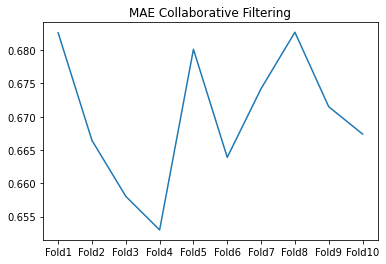

In [89]:
label_fold = ['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7','Fold8','Fold9','Fold10']
plt.plot(label_fold,mae_cf)
plt.title('MAE Collaborative Filtering')

Text(0.5, 1.0, 'RMSE Collaborative Filtering')

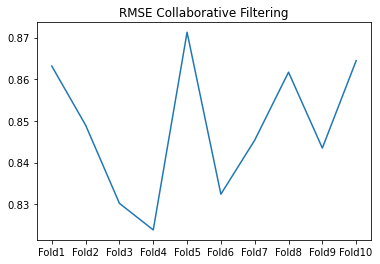

In [91]:
label_fold = ['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7','Fold8','Fold9','Fold10']
plt.plot(label_fold,rmse_cf)
plt.title('RMSE Collaborative Filtering')

### Find MAE and RMSE Content Based Filtering

In [16]:
def content_based_testing(dt_testing,dt_training):
    rating_pred = []
    for index,row in dt_testing.iterrows():
        user_id = row['user_id']
        destination_id = row['destination_id']
        rating_pred.append(content_based_recommender(user_id,destination_id,dt_training))
    return rating_pred

In [17]:
begin_time = datetime.datetime.now()
print(1)
rating_pred_cb_fold1 = content_based_testing(dt_fold_testing1,dt_fold_training1)
print(2)
rating_pred_cb_fold2 = content_based_testing(dt_fold_testing2,dt_fold_training2)
print(3)
rating_pred_cb_fold3 = content_based_testing(dt_fold_testing3,dt_fold_training3)
print(4)
rating_pred_cb_fold4 = content_based_testing(dt_fold_testing4,dt_fold_training4)
print(5)
rating_pred_cb_fold5 = content_based_testing(dt_fold_testing5,dt_fold_training5)
print(6)
rating_pred_cb_fold6 = content_based_testing(dt_fold_testing6,dt_fold_training6)
print(7)
rating_pred_cb_fold7 = content_based_testing(dt_fold_testing7,dt_fold_training7)
print(8)
rating_pred_cb_fold8 = content_based_testing(dt_fold_testing8,dt_fold_training8)
print(9)
rating_pred_cb_fold9 = content_based_testing(dt_fold_testing9,dt_fold_training9)
print(10)
rating_pred_cb_fold10 = content_based_testing(dt_fold_testing10,dt_fold_training10)
print(datetime.datetime.now() - begin_time)

1
2
3
4
5
6
7
8
9
10
0:01:58.580567


In [67]:
mae_cb = []
rmse_cb = []
print('MAE and RMSE fold 1')
mae_cb_fold1 = find_mae(rating_pred_cb_fold1,y_test1)
rmse_cb_fold1 = find_rmse(rating_pred_cb_fold1,y_test1)
print(mae_cb_fold1)
print(rmse_cb_fold1)
mae_cb.append(mae_cb_fold1)
rmse_cb.append(rmse_cb_fold1)

MAE and RMSE fold 1
0.9165095074516043
1.0641281395572884


In [68]:
print('MAE and RMSE fold 2')
mae_cb_fold2 = find_mae(rating_pred_cb_fold2,y_test2)
rmse_cb_fold2 = find_rmse(rating_pred_cb_fold2,y_test2)
print(mae_cb_fold2)
print(rmse_cb_fold2)
mae_cb.append(mae_cb_fold2)
rmse_cb.append(rmse_cb_fold2)

MAE and RMSE fold 2
0.9176963218142015
1.0633006013971702


In [69]:
print('MAE and RMSE fold 3')
mae_cb_fold3 = find_mae(rating_pred_cb_fold3,y_test3)
rmse_cb_fold3 = find_rmse(rating_pred_cb_fold3,y_test3)
print(mae_cb_fold3)
print(rmse_cb_fold3)
mae_cb.append(mae_cb_fold3)
rmse_cb.append(rmse_cb_fold3)

MAE and RMSE fold 3
0.9053781151039553
1.0497590830727566


In [70]:
print('MAE and RMSE fold 4')
mae_cb_fold4 = find_mae(rating_pred_cb_fold4,y_test4)
rmse_cb_fold4 = find_rmse(rating_pred_cb_fold4,y_test4)
print(mae_cb_fold4)
print(rmse_cb_fold4)
mae_cb.append(mae_cb_fold4)
rmse_cb.append(rmse_cb_fold4)

MAE and RMSE fold 4
0.8720786844357693
1.0144952729668284


In [71]:
print('MAE and RMSE fold 5')
mae_cb_fold5 = find_mae(rating_pred_cb_fold5,y_test5)
rmse_cb_fold5 = find_rmse(rating_pred_cb_fold5,y_test5)
print(mae_cb_fold5)
print(rmse_cb_fold5)
mae_cb.append(mae_cb_fold5)
rmse_cb.append(rmse_cb_fold5)

MAE and RMSE fold 5
0.8959065695355966
1.0518606373086605


In [72]:
print('MAE and RMSE fold 6')
mae_cb_fold6 = find_mae(rating_pred_cb_fold6,y_test6)
rmse_cb_fold6 = find_rmse(rating_pred_cb_fold6,y_test6)
print(mae_cb_fold6)
print(rmse_cb_fold6)
mae_cb.append(mae_cb_fold6)
rmse_cb.append(rmse_cb_fold6)

MAE and RMSE fold 6
0.8939098324092253
1.0396847200521544


In [73]:
print('MAE and RMSE fold 7')
mae_cb_fold7 = find_mae(rating_pred_cb_fold7,y_test7)
rmse_cb_fold7 = find_rmse(rating_pred_cb_fold7,y_test7)
print(mae_cb_fold7)
print(rmse_cb_fold7)
mae_cb.append(mae_cb_fold7)
rmse_cb.append(rmse_cb_fold7)

MAE and RMSE fold 7
0.897949772403601
1.0474047539365257


In [74]:
print('MAE and RMSE fold 8')
mae_cb_fold8 = find_mae(rating_pred_cb_fold8,y_test8)
rmse_cb_fold8 = find_rmse(rating_pred_cb_fold8,y_test8)
print(mae_cb_fold8)
print(rmse_cb_fold8)
mae_cb.append(mae_cb_fold8)
rmse_cb.append(rmse_cb_fold8)

MAE and RMSE fold 8
0.8989487401193476
1.0501940657780948


In [75]:
print('MAE and RMSE fold 9')
mae_cb_fold9 = find_mae(rating_pred_cb_fold9,y_test9)
rmse_cb_fold9 = find_rmse(rating_pred_cb_fold9,y_test9)
print(mae_cb_fold9)
print(rmse_cb_fold9)
mae_cb.append(mae_cb_fold9)
rmse_cb.append(rmse_cb_fold9)

MAE and RMSE fold 9
0.8949874018151791
1.0439603950802239


In [76]:
print('MAE and RMSE fold 10')
mae_cb_fold10 = find_mae(rating_pred_cb_fold10,y_test10)
rmse_cb_fold10 = find_rmse(rating_pred_cb_fold10,y_test10)
print(mae_cb_fold10)
print(rmse_cb_fold10)
mae_cb.append(mae_cb_fold10)
rmse_cb.append(rmse_cb_fold10)

MAE and RMSE fold 10
0.8994670729249643
1.0525230132644299


Text(0.5, 1.0, 'MAE Content Based Filtering')

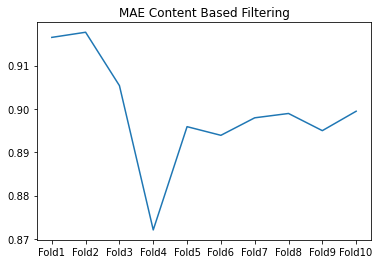

In [77]:
label_fold = ['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7','Fold8','Fold9','Fold10']
plt.plot(label_fold,mae_cb)
plt.title('MAE Content Based Filtering')

Text(0.5, 1.0, 'RMSE Content Based Filtering')

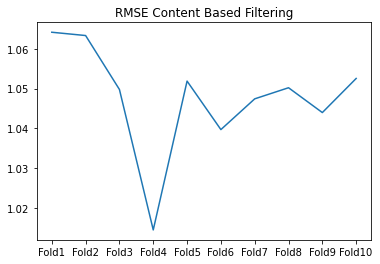

In [78]:
label_fold = ['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7','Fold8','Fold9','Fold10']
plt.plot(label_fold,rmse_cb)
plt.title('RMSE Content Based Filtering')

### Find MAE and RMSE Demographic Filtering

In [22]:
def demographic_filtering_testing(dt_testing,dt_training):
    rating_pred = []
    for index,row in dt_testing.iterrows():
        user_id = row['user_id']
        destination_id = row['destination_id']
        print(user_id,destination_id)
        rating_pred.append(demographic_filtering_using_svm(user_id,destination_id,dt_training))
    return rating_pred

In [23]:
begin_time = datetime.datetime.now()
print(1)
rating_pred_df_fold1 = demographic_filtering_testing(dt_fold_testing1,dt_fold_training1)
print(datetime.datetime.now() - begin_time)

1
3031 41
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3109 21
SVC(C=1, decision_function_shape='ovo', gamma=1)
1913 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1048 75
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2261 50
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
2833 4
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
2574 8
SVC(C=1, decision_function_shape='ovo', gamma=1)
682 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2930 62
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1170 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1968 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
929 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
760 77
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3395 29
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
3097 31
SVC(C=1, decision_function_shape='ovo', gamma=1)
1892 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
551 17
SVC(C=1, decision_functi

SVC(C=10, decision_function_shape='ovo', gamma=0.01)
2762 9
SVC(C=1, decision_function_shape='ovo', gamma=1)
3234 43
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1554 110
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
929 51
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2361 20
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1768 45
SVC(C=10, decision_function_shape='ovo', gamma=1)
1277 110
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
469 11
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
512 6
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
84 104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1064 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
796 11
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2760 50
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
668 9
SVC(C=1, decision_function_shape='ovo', gamma=1)
2956 34
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1599 1

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1655 69
SVC(C=1, decision_function_shape='ovo', gamma=1)
1214 48
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
273 104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3369 94
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1695 50
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
3339 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3314 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1269 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3037 43
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
156 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3120 27
SVC(C=1, decision_function_shape='ovo', gamma=1)
1484 82
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2881 17
SVC(C=1, decision_function_shape='ovo', gamma=1)
1835 43
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2860 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3308 68
SVC(C=0.1, decision_fun

SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
92 102
SVC(C=10, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
3453 85
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
524 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
424 77
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2449 91
SVC(C=100, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
829 105
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
2267 64
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2953 46
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1125 9
SVC(C=1, decision_function_shape='ovo', gamma=1)
1508 4
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
2513 51
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2254 68
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1230 9
SVC(C=1, decision_function_shape='ovo', gamma=1)
2134 1
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
3101 112
SVC(C=0.1, decisi

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2185 12
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
141 58
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1017 44
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
710 16
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
216 82
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
523 3
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2011 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
704 114
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1404 111
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
720 31
SVC(C=1, decision_function_shape='ovo', gamma=1)
1806 17
SVC(C=1, decision_function_shape='ovo', gamma=1)
44 42
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1346 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
984 17
SVC(C=1, decision_function_shape='ovo', gamma=1)
3002 60
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2877 3
SVC(C=0.1, decisi

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
708 17
SVC(C=1, decision_function_shape='ovo', gamma=1)
1678 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1662 9
SVC(C=1, decision_function_shape='ovo', gamma=1)
886 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
560 83
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3287 70
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
875 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
973 17
SVC(C=1, decision_function_shape='ovo', gamma=1)
3403 51
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
385 114
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2818 38
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1337 9
SVC(C=1, decision_function_shape='ovo', gamma=1)
2338 39
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2084 11
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1971 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2749 9
SVC(C=1, decision_function_shape='ovo', gamma=1)
1310 

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1046 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2600 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2286 5
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1428 26
SVC(C=10, decision_function_shape='ovo', gamma=1)
2107 58
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3472 9
SVC(C=1, decision_function_shape='ovo', gamma=1)
585 93
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3024 77
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3414 85
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2119 80
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3159 69
SVC(C=1, decision_function_shape='ovo', gamma=1)
2111 8
SVC(C=1, decision_function_shape='ovo', gamma=1)
1398 54
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2241 41
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2570 28
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3113 72
SVC(C=1, decision_function_shape='ovo', gamma=1)

SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1300 17
SVC(C=1, decision_function_shape='ovo', gamma=1)
1749 62
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
586 68
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1262 36
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
782 9
SVC(C=1, decision_function_shape='ovo', gamma=1)
3295 34
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
2314 42
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1679 12
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1573 51
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2557 63
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2687 65
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
835 94
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1294 9
SVC(C=1, decision_function_shape='ovo', gamma=1)
2359 49
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
1514 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3374 11
SVC(C=0.1, deci

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
683 5
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3166 17
SVC(C=1, decision_function_shape='ovo', gamma=1)
252 34
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
3226 46
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1472 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
870 4
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
219 3
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2203 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2764 79
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
29 66
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
2112 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
460 17
SVC(C=1, decision_function_shape='ovo', gamma=1)
2423 26
SVC(C=10, decision_function_shape='ovo', gamma=1)
3450 6
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
284 104
SVC(C=0.1, decision_function_shape

SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1566 46
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3032 70
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
2648 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2007 20
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
52 118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1547 4
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
3310 34
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
813 79
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1015 58
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1839 3
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
219 41
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2366 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3153 58
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
548 26
SVC(C=10, decision_function_shape='ovo', gamma=1)
2867 78
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmo

SVC(C=10, decision_function_shape='ovo', gamma=0.01)
3317 73
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
3202 67
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2694 38
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1572 20
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
3219 47
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2648 94
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
3159 80
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2091 2
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1076 43
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
182 41
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3386 26
SVC(C=10, decision_function_shape='ovo', gamma=1)
1533 70
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
707 55
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
135 104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1953 85
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
928 1
SVC(C=0.1, decision_fun

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2028 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2080 9
SVC(C=1, decision_function_shape='ovo', gamma=1)
1484 26
SVC(C=10, decision_function_shape='ovo', gamma=1)
176 17
SVC(C=1, decision_function_shape='ovo', gamma=1)
2899 26
SVC(C=10, decision_function_shape='ovo', gamma=1)
3472 69
SVC(C=1, decision_function_shape='ovo', gamma=1)
2608 26
SVC(C=10, decision_function_shape='ovo', gamma=1)
3186 17
SVC(C=1, decision_function_shape='ovo', gamma=1)
278 61
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1183 48
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
3063 70
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
2035 66
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
2967 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
440 54
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3113 43
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3393 33
SVC(C=0.1, decision_function_

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
622 5
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
315 104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2640 115
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2586 90
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3117 43
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2928 42
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2201 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2601 17
SVC(C=1, decision_function_shape='ovo', gamma=1)
2240 47
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1624 21
SVC(C=1, decision_function_shape='ovo', gamma=1)
2086 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1177 56
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2658 26
SVC(C=10, decision_function_shape='ovo', gamma=1)
1734 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1014 4
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
3049 24
SVC(C=0.1, decision_function

In [25]:
begin_time = datetime.datetime.now()
print(2)
rating_pred_df_fold2 = demographic_filtering_testing(dt_fold_testing2,dt_fold_training2)
print(3)
rating_pred_df_fold3 = demographic_filtering_testing(dt_fold_testing3,dt_fold_training3)
print(4)
rating_pred_df_fold4 = demographic_filtering_testing(dt_fold_testing4,dt_fold_training4)
print(5)
rating_pred_df_fold5 = demographic_filtering_testing(dt_fold_testing5,dt_fold_training5)
print(datetime.datetime.now() - begin_time)

2
629 45
SVC(C=1, decision_function_shape='ovo', gamma=1)
1069 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2892 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1780 102
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1224 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
238 31
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1862 5
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1298 41
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1090 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2719 104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
302 48
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1413 78
SVC(C=1, decision_function_shape='ovo', gamma=1)
3028 104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
36 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
844 93
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1812 31
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1312 33
SVC(C=0.1, decision

SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
529 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2184 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2015 39
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2142 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2818 27
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
85 9
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2374 19
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
938 10
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
3088 29
SVC(C=10, decision_function_shape='ovo', gamma=1)
3165 34
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
3205 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
65 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1038 8
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
498 9
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1078 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1586 18
SVC(C=0.1

SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
1309 40
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1553 78
SVC(C=1, decision_function_shape='ovo', gamma=1)
2342 78
SVC(C=1, decision_function_shape='ovo', gamma=1)
1917 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3155 45
SVC(C=1, decision_function_shape='ovo', gamma=1)
990 51
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2325 45
SVC(C=1, decision_function_shape='ovo', gamma=1)
1308 104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2721 87
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3227 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2002 78
SVC(C=1, decision_function_shape='ovo', gamma=1)
2106 65
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2572 58
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
995 5
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2767 17
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
3220 4

SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1171 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2180 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
703 118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2106 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
846 48
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2649 17
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
3067 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1319 1
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
68 50
SVC(C=10, decision_function_shape='ovo', gamma=1)
1761 64
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
229 31
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1500 11
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
963 102
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1194 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1010 90
SVC(C=0.1, decision_function_sh

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
828 113
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2256 58
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
306 34
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
3222 84
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
449 74
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
314 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2015 103
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1106 58
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
1593 48
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
705 78
SVC(C=1, decision_function_shape='ovo', gamma=1)
2368 94
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
196 88
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
457 54
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
3124 8
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
3051 21
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
824 24
SVC(C=0.1, decision_function_sh

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1470 61
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1004 17
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
2461 50
SVC(C=10, decision_function_shape='ovo', gamma=1)
3473 75
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1371 38
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
123 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1845 66
SVC(C=10, decision_function_shape='ovo', gamma=1)
293 78
SVC(C=1, decision_function_shape='ovo', gamma=1)
774 44
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2174 46
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1351 28
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1791 89
SVC(C=0.1, decision_function_shape='ovo', gamma=0.1, kernel='poly')
1699 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
520 45
SVC(C=1, decision_function_shape='ovo', gamma=1)
889 6
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2337 9
SVC(C=0.1, decis

SVC(C=0.1, decision_function_shape='ovo', gamma=0.1, kernel='poly')
1924 112
SVC(C=10, decision_function_shape='ovo', gamma=1)
3240 57
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
183 4
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3103 48
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2853 66
SVC(C=10, decision_function_shape='ovo', gamma=1)
824 36
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1413 102
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
3038 96
SVC(C=1, decision_function_shape='ovo', gamma=1)
1616 1
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
3246 8
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
1827 39
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3168 64
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
3262 17
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
21 17
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
1130 37
SVC(C=1, decision_function_shape='o

SVC(C=0.1, decision_function_shape='ovo', gamma=0.1, kernel='poly')
1251 87
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2946 77
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2786 11
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1215 110
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2912 9
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1820 64
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1675 13
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2588 17
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
2055 26
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2541 73
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2596 48
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
476 5
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
193 118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2396 1
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2422 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)


SVC(C=0.1, decision_function_shape='ovo', gamma=1)
289 102
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
3429 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2845 17
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
3163 5
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2123 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2498 46
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1486 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
801 50
SVC(C=10, decision_function_shape='ovo', gamma=1)
3266 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3076 94
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1259 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1764 62
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1406 20
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1797 13
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1458 78
SVC(C=1, decision_function_shape='ovo', gamma=1

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
917 118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
291 9
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3111 68
SVC(C=1, decision_function_shape='ovo', gamma=1)
2157 58
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
1170 70
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
2485 1
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
109 65
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1343 45
SVC(C=1, decision_function_shape='ovo', gamma=1)
2189 78
SVC(C=1, decision_function_shape='ovo', gamma=1)
3221 31
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1535 13
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2620 1
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
357 84
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
740 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2086 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3238 48
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
853 70
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1182 34
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
3089 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1329 17
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
505 23
SVC(C=10, decision_function_shape='ovo', gamma=1)
1098 68
SVC(C=1, decision_function_shape='ovo', gamma=1)
2282 80
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2279 10
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1474 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2277 68
SVC(C=1, decision_function_shape='ovo', gamma=1)
41 62
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1031 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
893 4
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3404 78
SVC(C=1, decision_function_shape='ovo', gamma=1)
2957 28
SVC(C=0.1, d

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1387 11
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1393 66
SVC(C=10, decision_function_shape='ovo', gamma=1)
518 70
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
3224 58
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
3151 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2990 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1977 84
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2099 45
SVC(C=1, decision_function_shape='ovo', gamma=1)
480 3
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1431 78
SVC(C=1, decision_function_shape='ovo', gamma=1)
837 4
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1847 3
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2954 60
SVC(C=1, decision_function_shape='ovo', gamma=1)
1070 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3338 56
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
706 14
SVC(C=0.1, decision_function_shape='ovo', gamm

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3440 3
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2647 102
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2500 64
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2754 72
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
3488 13
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
3055 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
232 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
684 28
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
899 51
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1767 115
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2982 55
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1135 68
SVC(C=1, decision_function_shape='ovo', gamma=1)
866 51
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1810 68
SVC(C=1, decision_function_shape='ovo', gamma=1)
3329 78
SVC(C=1, decision_function_shape='ovo', gamma=1)
2457 51
SVC(C=0.1, decision_functi

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2773 108
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
3055 21
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1834 93
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
631 74
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1507 45
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
743 104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1654 66
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1136 104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2180 26
SVC(C=0.1, decision_function_shape='ovo', gamma=0.1, kernel='poly')
2686 27
SVC(C=1, decision_function_shape='ovo', gamma=1)
976 21
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1237 23
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
519 79
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2910 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2155 68
SVC(C=1, decision_function_shape='ovo', gamm

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
381 45
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3255 9
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
3484 84
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
239 17
SVC(C=1, decision_function_shape='ovo', gamma=1)
541 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3448 62
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3490 9
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
3263 34
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2801 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1927 17
SVC(C=1, decision_function_shape='ovo', gamma=1)
643 85
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1498 3
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1145 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3437 93
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
3402 9
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
3291 34
SVC(C=0

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3060 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3051 64
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
3418 85
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2097 34
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1532 6
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
858 70
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2549 65
SVC(C=1, decision_function_shape='ovo', gamma=1)
1817 26
SVC(C=0.1, decision_function_shape='ovo', gamma=0.1, kernel='poly')
669 21
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2093 63
SVC(C=10, decision_function_shape='ovo', gamma=1)
2040 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
974 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1442 23
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
280 13
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1826 1
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
48

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
273 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
928 13
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
741 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1276 81
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1383 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2282 9
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
67 9
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
3191 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
11 72
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
2201 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3462 22
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1130 13
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1078 31
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2118 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1942 62
SVC(C=0.1, decision_function_s

SVC(C=0.1, decision_function_shape='ovo', gamma=0.1, kernel='poly')
3346 26
SVC(C=0.1, decision_function_shape='ovo', gamma=0.1, kernel='poly')
1168 94
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
533 114
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2574 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1832 17
SVC(C=1, decision_function_shape='ovo', gamma=1)
1572 11
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
2503 3
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
2208 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2483 4
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
2079 31
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1330 80
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
1714 110
SVC(C=10, decision_function_shape='ovo', gamma=1)
476 68
SVC(C=1, decision_function_shape='ovo', gamma=1)
2546 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2581 16
SVC(C=1, decision_function_shape='o

SVC(C=1, decision_function_shape='ovo', gamma=1)
1123 61
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
29 46
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2844 31
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2478 88
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1400 82
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
1612 51
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
169 73
SVC(C=10, decision_function_shape='ovo', gamma=1)
543 6
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1096 70
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1601 75
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
455 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2848 20
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2342 118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1742 48
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
737 68
SVC(C=1, decision_function_shape='ovo', gamma=1)
232 5
SVC(C=1, decision_function_sh

SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
3486 56
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2709 82
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
2090 56
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1294 13
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
689 11
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
1901 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1636 13
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1270 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2076 48
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2792 80
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
1274 62
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1605 3
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1624 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
310 74
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1216 26
SVC(C=0.1, decision_functi

SVC(C=1, decision_function_shape='ovo', gamma=1)
2705 48
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1345 17
SVC(C=1, decision_function_shape='ovo', gamma=1)
213 118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2931 64
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2560 8
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
1201 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1963 13
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1238 118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1408 118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1488 77
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
571 61
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2929 93
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
364 13
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2331 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
618 75
SVC(C=0.1, decision_function_shape='ovo', gamma=

SVC(C=1, decision_function_shape='ovo', gamma=1)
2583 66
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1555 27
SVC(C=1, decision_function_shape='ovo', gamma=1)
2151 2
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2452 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1699 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3047 58
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
1531 51
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1254 68
SVC(C=1, decision_function_shape='ovo', gamma=1)
2179 85
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3243 72
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
3453 20
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1263 17
SVC(C=1, decision_function_shape='ovo', gamma=1)
3003 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
982 11
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
173 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1895 56
SVC(C=0.1, decision_function_shape='ovo', gamma

SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
2410 65
SVC(C=1, decision_function_shape='ovo', gamma=1)
1634 62
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2575 13
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2258 42
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
735 36
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2950 6
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1332 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1901 16
SVC(C=1, decision_function_shape='ovo', gamma=1)
1418 6
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1663 1
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1509 56
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2749 10
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1752 94
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2449 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1751 110
SVC(C=10, decision_function_shape='o

SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
66 88
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2948 77
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
976 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1668 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
7 21
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2129 118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
619 108
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
539 1
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2864 61
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
432 23
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
846 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3083 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
712 11
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
1584 82
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
1252 61
SVC(C=10, decision_

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3400 109
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
718 64
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1803 39
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
621 64
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2294 58
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
101 43
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2799 3
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1841 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
419 61
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1278 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2004 8
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
3370 50
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
2085 39
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
851 5
SVC(C=1, decision_function_shape='ovo', gamma=1)
1599 80
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
8

SVC(C=1, decision_function_shape='ovo', gamma=1)
546 9
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
61 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1628 65
SVC(C=1, decision_function_shape='ovo', gamma=1)
667 72
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
450 55
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2329 118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2385 62
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3249 9
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2046 78
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
1182 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1560 94
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1367 74
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
3485 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2649 58
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
2628 118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2864 24
SVC(C=

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
445 3
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
491 97
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
432 9
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
3027 102
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
442 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3195 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2382 77
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3418 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2815 105
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
3237 48
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
80 70
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1364 56
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
673 80
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2951 64
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
104 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2305 58
SVC(C=0.1, decision_functi

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
495 57
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
554 51
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2404 63
SVC(C=10, decision_function_shape='ovo', gamma=1)
1124 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1647 68
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
342 5
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1249 51
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1016 32
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
611 4
SVC(C=10, decision_function_shape='ovo', gamma=1)
1411 5
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
341 39
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1624 45
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1881 68
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2738 3
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1620 27
SVC(C=0.1, decision_function_shape='o

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2260 85
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1173 56
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1134 20
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3376 85
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1007 58
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1191 9
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1414 82
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
69 5
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2287 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1089 80
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1368 78
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
3327 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
67 65
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
303 48
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3185 57
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2677 104
SVC(C=

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
998 4
SVC(C=10, decision_function_shape='ovo', gamma=1)
3137 79
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
3234 55
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
187 51
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1366 26
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1099 77
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3432 72
SVC(C=1, decision_function_shape='ovo', gamma=1)
1572 27
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
279 70
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
597 102
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2615 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2659 34
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1376 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1632 1
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
910 24
SVC(C=0.1, decision_function_shape='ovo',

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
3157 9
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1607 79
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1204 6
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
975 1
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2737 31
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3369 9
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2552 46
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
701 78
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
2759 21
SVC(C=1, decision_function_shape='ovo', gamma=1)
1850 16
SVC(C=1, decision_function_shape='ovo', gamma=1)
472 43
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
238 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3115 31
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3213 31
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
903 51
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoi

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2323 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2427 60
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
94 66
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='poly')
3498 113
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2621 3
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2649 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3123 68
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1364 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2672 85
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2749 58
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3361 50
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
50 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
919 12
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1163 63
SVC(C=10, decision_function_shape='ovo', gamma=1)
222 17
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
292 16
SVC(C=1, decision_functio

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2178 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1866 79
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
3156 65
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
96 26
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
28 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1495 26
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3010 68
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1150 85
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1990 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
939 11
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2928 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
473 70
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2311 101
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
152 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
817 39
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
895 28
SVC(C=0.1, decision_function_sh

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2010 68
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
665 41
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1045 27
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
781 77
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1210 41
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2460 72
SVC(C=1, decision_function_shape='ovo', gamma=1)
1401 104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
989 104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
446 23
SVC(C=1, decision_function_shape='ovo', gamma=1)
2029 9
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1895 82
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
2178 41
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
225 4
SVC(C=10, decision_function_shape='ovo', gamma=1)
3411 28
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
159 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2836 39
SVC(C=0.1, decis

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2736 65
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
209 26
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3114 31
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2421 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
288 58
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
599 8
SVC(C=1, decision_function_shape='ovo', gamma=1)
3096 82
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
3081 94
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1216 23
SVC(C=1, decision_function_shape='ovo', gamma=1)
3418 34
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
41 1
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
925 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3247 34
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
550 80
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2630 118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3075 70
SVC(C=0.1, decision_function_

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
811 84
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2139 62
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2597 11
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2836 78
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
3027 31
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3493 86
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
3074 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1461 78
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
675 104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2281 89
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
381 102
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1801 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
44 85
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2127 37
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
608 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
772 23
SVC(C=1, dec

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1807 11
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1249 72
SVC(C=1, decision_function_shape='ovo', gamma=1)
1767 55
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
3005 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1768 3
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2766 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3191 56
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1186 118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
268 36
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
951 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2154 26
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1510 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
196 78
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
2269 85
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1192 94
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2388 12
SVC(C=0.1, decision_function_s

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3255 110
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1919 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2509 9
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2409 45
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
3305 65
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
34 112
SVC(C=10, decision_function_shape='ovo', gamma=1)
2819 4
SVC(C=10, decision_function_shape='ovo', gamma=1)
2437 5
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2277 4
SVC(C=10, decision_function_shape='ovo', gamma=1)
109 82
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
2437 10
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1207 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1513 39
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2569 41
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
150 14
SVC(C=0.1, decision_function_sha

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
591 1
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2388 21
SVC(C=1, decision_function_shape='ovo', gamma=1)
1723 36
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1277 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1348 102
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1271 79
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
728 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
617 80
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
3385 109
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2343 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2939 19
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
3190 48
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
730 34
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
116 60
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
713 24
SVC(C=0.1, decisi

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
973 73
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
493 16
SVC(C=1, decision_function_shape='ovo', gamma=1)
2521 37
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
822 4
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
359 45
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1452 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2824 8
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1617 75
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3143 51
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
3216 56
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3212 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2317 91
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2877 56
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
705 87
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1002 91
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2874 85
SVC(C=1, decision_function_sha

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
803 75
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2242 94
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
3180 5
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
2928 17
SVC(C=1, decision_function_shape='ovo', gamma=1)
1742 118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
738 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
197 31
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2551 91
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2660 68
SVC(C=1, decision_function_shape='ovo', gamma=1)
1096 78
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1393 9
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2456 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3116 34
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2648 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2829 61
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2740 26
SVC(C=0.1, decision_function_shape='ovo',

SVC(C=10, decision_function_shape='ovo', gamma=1)
1528 95
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2448 37
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2283 104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2785 93
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
218 50
SVC(C=10, decision_function_shape='ovo', gamma=1)
3084 28
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2648 79
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2998 88
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
3158 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2700 34
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2933 9
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2329 31
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
601 70
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
934 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1706 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1059 93
SVC(C=0.1, decision_functi

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
208 96
SVC(C=1, decision_function_shape='ovo', gamma=1)
747 5
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
794 118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1551 97
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1062 26
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
255 62
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
3327 42
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1542 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
169 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2065 3
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
362 41
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
25 81
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2430 118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2262 26
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1596 5
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
2246 64
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2637 33
SV

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2682 3
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2371 2
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3131 45
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3488 65
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1350 63
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1915 28
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3209 4
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3157 34
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2835 4
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1843 43
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1555 68
SVC(C=1, decision_function_shape='ovo', gamma=1)
2857 38
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1461 47
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1970 78
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2030 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3154 72
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
321 24
SVC(

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
633 63
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3351 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3338 78
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2808 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2623 80
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
143 1
SVC(C=10, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
465 8
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3127 28
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1970 46
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1005 117
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
220 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3472 47
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
683 60
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
447 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1868 17
SVC(C=1, decision_function_shape='ovo', gamma=1)
38 24
SVC(C=0.1, decision_function_shape='ovo', gam

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1672 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1002 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1274 17
SVC(C=1, decision_function_shape='ovo', gamma=1)
1610 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1809 4
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2220 104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1002 45
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
502 78
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2614 9
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
442 55
SVC(C=1, decision_function_shape='ovo', gamma=1)
3195 31
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2945 70
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
320 85
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1485 26
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2404 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2097 61
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigm

SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
208 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
838 48
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1583 17
SVC(C=1, decision_function_shape='ovo', gamma=1)
347 9
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3247 62
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1899 99
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2495 68
SVC(C=1, decision_function_shape='ovo', gamma=1)
1599 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2452 65
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2468 93
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1734 21
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1266 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1573 20
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2214 80
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1621 102
SVC(C=0.1, decision_function_shape='ovo', gamma=1, ker

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
695 77
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
976 41
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1115 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1331 118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2269 17
SVC(C=1, decision_function_shape='ovo', gamma=1)
972 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
487 85
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2323 48
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2055 78
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
616 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2783 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
69 60
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1848 78
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1445 37
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3050 48
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2956 118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2596 9
SVC

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
31 75
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1936 5
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
2134 60
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
3478 39
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
498 17
SVC(C=1, decision_function_shape='ovo', gamma=1)
97 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2715 17
SVC(C=1, decision_function_shape='ovo', gamma=1)
2034 118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1359 10
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2692 5
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
3261 34
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2584 17
SVC(C=1, decision_function_shape='ovo', gamma=1)
847 22
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
471 77
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2312 59
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
503 39
SVC(C=0.1, decision_function_shape='ovo', ga

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
207 9
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3016 63
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3075 17
SVC(C=1, decision_function_shape='ovo', gamma=1)
3187 110
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
927 45
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1689 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1934 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1332 38
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
569 48
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1044 3
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
184 17
SVC(C=1, decision_function_shape='ovo', gamma=1)
702 63
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3 47
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
853 79
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2064 17
SVC(C=1, decision_function_shape='ovo', gamma=1)
2131 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1042 47
SVC(C=1, deci

SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
776 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1763 78
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1005 1
SVC(C=10, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
1168 16
SVC(C=1, decision_function_shape='ovo', gamma=1)
1904 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
99 104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
214 48
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2332 80
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
134 82
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2417 43
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3091 61
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
943 1
SVC(C=10, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
434 22
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
643 70
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3138 33
SVC(C=0.1, decision_functio

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2868 17
SVC(C=1, decision_function_shape='ovo', gamma=1)
531 23
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1441 17
SVC(C=1, decision_function_shape='ovo', gamma=1)
568 78
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2061 77
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3089 80
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2770 48
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
916 39
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2240 80
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1431 68
SVC(C=1, decision_function_shape='ovo', gamma=1)
2830 31
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
798 42
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2362 63
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2633 61
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1274 50
SVC(C=10, decision_function_shape='ovo', gamma=1)
2960 14
SVC(C=0.1, decision_function

In [57]:
print(6)
rating_pred_df_fold6 = demographic_filtering_testing(dt_fold_testing6,dt_fold_training6)

6
659 65
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2906 3
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2320 102
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2904 41
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
1366 5
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
2369 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1428 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3480 78
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1064 120
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3111 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3413 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
601 34
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
572 77
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2137 31
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
493 51
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1336 34
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1520 15
SVC(C=0

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
592 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
775 9
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
2156 3
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1151 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1370 113
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2759 89
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
692 3
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
125 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1175 86
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1585 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3251 28
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
322 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3368 97
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1686 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
732 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1663 45
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2074 13
SVC

SVC(C=10, decision_function_shape='ovo', gamma=0.01)
3448 85
SVC(C=10, decision_function_shape='ovo', gamma=1)
752 64
SVC(C=1, decision_function_shape='ovo', gamma=1)
2292 32
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
378 17
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
3259 77
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
618 79
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
3062 48
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
310 3
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1431 17
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
281 50
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1091 17
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1157 51
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2251 50
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
883 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
574 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1671 55
SVC(C=0.1, decision_function_shape='ovo'

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2795 102
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
328 77
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3469 62
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2528 9
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1366 37
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3093 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3430 45
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
640 3
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3097 58
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
3199 63
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3208 21
SVC(C=1, decision_function_shape='ovo', gamma=1)
1211 116
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1422 55
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2132 80
SVC(C=10, decision_function_shape='ovo', gamma=1)
1748 58
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
2951 78
SVC(C=10, decision

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
561 3
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1252 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
847 11
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
2728 11
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1117 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1934 11
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
966 102
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2867 104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1178 17
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
415 4
SVC(C=1, decision_function_shape='ovo', gamma=1)
3406 34
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1594 102
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
154 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2327 4
SVC(C=1, decision_function_shape='ovo', gamma=1)
218 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
993 15
SVC(C=0.1, decision_funct

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1256 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3029 87
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2116 102
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
314 85
SVC(C=10, decision_function_shape='ovo', gamma=1)
1996 104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2649 104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2208 43
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3307 113
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1496 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
857 31
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2916 85
SVC(C=10, decision_function_shape='ovo', gamma=1)
874 17
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
3419 58
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
3131 73
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1602 111
SVC(C=1, decision_function_shape='ovo', gamma=1)
824 34
SVC(C=0.1, decision_fu

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2934 106
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
734 9
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
2201 60
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
2064 8
SVC(C=1, decision_function_shape='ovo', gamma=1)
2868 79
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
2154 78
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
372 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1665 45
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1132 43
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
484 8
SVC(C=1, decision_function_shape='ovo', gamma=1)
2092 23
SVC(C=10, decision_function_shape='ovo', gamma=1)
343 75
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
8 9
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1775 1
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
464 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
114 3
SVC(C=0.1, de

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2176 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1226 120
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1210 85
SVC(C=10, decision_function_shape='ovo', gamma=1)
156 103
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2065 95
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1018 55
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
910 17
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2132 36
SVC(C=1, decision_function_shape='ovo', gamma=1)
2543 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2444 78
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
281 31
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
347 41
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
447 80
SVC(C=10, decision_function_shape='ovo', gamma=1)
3191 46
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3437 9
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1227 64
SVC(C=1, decision_func

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3145 16
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
3170 85
SVC(C=10, decision_function_shape='ovo', gamma=1)
3285 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1652 72
SVC(C=1, decision_function_shape='ovo', gamma=1)
195 115
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2835 86
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
389 62
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1689 1
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
3191 9
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1975 9
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1209 47
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2422 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2078 86
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
2410 65
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3093 1
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
2733 17
SVC(C=1, decision_funct

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1156 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1058 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1728 56
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
871 9
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
897 36
SVC(C=1, decision_function_shape='ovo', gamma=1)
2605 12
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1429 78
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
578 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1454 27
SVC(C=1, decision_function_shape='ovo', gamma=1)
1107 64
SVC(C=1, decision_function_shape='ovo', gamma=1)
882 110
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1684 118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1664 80
SVC(C=10, decision_function_shape='ovo', gamma=1)
783 68
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1824 81
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
19 43
SVC(C=0.1, decision_function_shape='ovo', gamma=1

SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1824 62
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
4 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2132 118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2128 77
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1494 3
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
509 58
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
2381 78
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2745 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1867 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2049 41
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
1351 43
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
878 51
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
730 46
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1912 31
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
447 61
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1869 24
S

SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
2137 38
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
783 89
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1232 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3278 104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2491 27
SVC(C=1, decision_function_shape='ovo', gamma=1)
3497 64
SVC(C=1, decision_function_shape='ovo', gamma=1)
2687 62
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2785 59
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
3243 90
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
575 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2402 78
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2788 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
855 8
SVC(C=1, decision_function_shape='ovo', gamma=1)
1575 68
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1176 97
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2997 15
SVC(C=0.1, d

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2669 17
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2419 17
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1341 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2324 20
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2460 68
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
540 70
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2667 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
925 28
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
437 3
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2209 55
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
458 45
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2958 17
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1803 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
721 20
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2423 31
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3076 64
SVC(C=1, decision_function_shape='ovo', gamma=1)
2935 38
SVC(C

In [26]:
begin_time = datetime.datetime.now()
print(7)
rating_pred_df_fold7 = demographic_filtering_testing(dt_fold_testing7,dt_fold_training7)
print(8)
rating_pred_df_fold8 = demographic_filtering_testing(dt_fold_testing8,dt_fold_training8)
print(datetime.datetime.now() - begin_time)

7
1510 3
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
520 48
SVC(C=1, decision_function_shape='ovo', gamma=1)
2122 17
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
1968 1
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1688 94
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
51 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1175 48
SVC(C=1, decision_function_shape='ovo', gamma=1)
2412 58
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1529 17
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
1246 84
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1609 17
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
277 8
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1334 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3140 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1728 102
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
181 102
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
529 28
SVC(C=0.1, decision_functio

SVC(C=10, decision_function_shape='ovo', gamma=0.1)
435 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3074 70
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1283 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3341 27
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3253 48
SVC(C=1, decision_function_shape='ovo', gamma=1)
1134 70
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
3497 21
SVC(C=1, decision_function_shape='ovo', gamma=1)
1350 66
SVC(C=1, decision_function_shape='ovo', gamma=1)
385 48
SVC(C=1, decision_function_shape='ovo', gamma=1)
2841 63
SVC(C=10, decision_function_shape='ovo', gamma=1)
58 66
SVC(C=1, decision_function_shape='ovo', gamma=1)
1825 66
SVC(C=1, decision_function_shape='ovo', gamma=1)
2272 65
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
1080 50
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2311 77
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3 70
SVC(C=10, decision_function_shape='ovo',

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
994 39
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1865 68
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
670 5
SVC(C=10, decision_function_shape='ovo', gamma=1)
1622 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
598 64
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
517 9
SVC(C=1, decision_function_shape='ovo', gamma=1)
107 120
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
526 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
22 113
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3414 34
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1849 94
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
2344 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2699 56
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2610 85
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
292 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2472 58
SVC(C=0.1, decision_function_shape='ovo', ga

SVC(C=1, decision_function_shape='ovo', gamma=1)
619 5
SVC(C=10, decision_function_shape='ovo', gamma=1)
1854 118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2851 86
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2804 46
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2866 93
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2523 26
SVC(C=1, decision_function_shape='ovo', gamma=1)
456 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
935 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
349 37
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1770 1
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3394 6
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1560 50
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1802 44
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1245 94
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
1056 11
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3

SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
3244 41
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3349 8
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3457 28
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
995 36
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2585 50
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2130 9
SVC(C=1, decision_function_shape='ovo', gamma=1)
3493 36
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2121 43
SVC(C=1, decision_function_shape='ovo', gamma=1)
956 78
SVC(C=10, decision_function_shape='ovo', gamma=1)
332 2
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
722 107
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2843 1
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3081 53
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1639 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
705 50
SVC(C=1, decision_function_shape='ovo', gamma=

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2719 68
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1923 17
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
1632 31
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3232 85
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1653 50
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
3370 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2631 21
SVC(C=1, decision_function_shape='ovo', gamma=1)
1038 26
SVC(C=1, decision_function_shape='ovo', gamma=1)
1226 46
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2144 3
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3434 48
SVC(C=1, decision_function_shape='ovo', gamma=1)
573 94
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
2089 48
SVC(C=1, decision_function_shape='ovo', gamma=1)
2918 58
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
845 69
SVC(C=10, decision_function_shape='ovo', gamma=1)
3414 21
SVC(C=1, decision_function_

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2331 23
SVC(C=1, decision_function_shape='ovo', gamma=1)
440 76
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1475 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2624 70
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
2604 27
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
413 85
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1888 9
SVC(C=1, decision_function_shape='ovo', gamma=1)
3145 56
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
712 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1298 102
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1032 94
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
1822 97
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
69 70
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
98 46
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2161 75
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
86 1
SVC(C=0.1, decision_function_shape='ovo', ga

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
824 9
SVC(C=1, decision_function_shape='ovo', gamma=1)
2068 61
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
3082 46
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2915 63
SVC(C=10, decision_function_shape='ovo', gamma=1)
2137 75
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2061 80
SVC(C=1, decision_function_shape='ovo', gamma=1)
581 65
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
1684 3
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1536 47
SVC(C=10, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
3471 21
SVC(C=1, decision_function_shape='ovo', gamma=1)
2842 61
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
777 77
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
113 75
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1209 50
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2201 85
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1414 17
SVC(C=100, decisi

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
684 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2826 9
SVC(C=1, decision_function_shape='ovo', gamma=1)
1770 50
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2692 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
192 69
SVC(C=10, decision_function_shape='ovo', gamma=1)
1862 69
SVC(C=10, decision_function_shape='ovo', gamma=1)
1905 50
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2314 64
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
117 62
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2616 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
475 12
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1718 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
271 73
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2770 109
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2269 11
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
545 58
SVC(C=0.1, decis

SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
758 4
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1662 50
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
266 51
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1317 78
SVC(C=10, decision_function_shape='ovo', gamma=1)
2413 10
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2649 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
286 114
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1885 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1472 58
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1501 1
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2393 101
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
129 26
SVC(C=1, decision_function_shape='ovo', gamma=1)
879 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1813 58
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3438 20
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
970 70
SVC(C=10, decisio

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3365 3
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2138 66
SVC(C=1, decision_function_shape='ovo', gamma=1)
563 39
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2520 65
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
1037 28
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1386 86
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3283 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1611 48
SVC(C=1, decision_function_shape='ovo', gamma=1)
370 50
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2346 60
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
1954 68
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
270 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2887 22
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2602 75
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
247 34
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
586 26
SVC(C=1, decision_function_shape

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
357 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
33 43
SVC(C=1, decision_function_shape='ovo', gamma=1)
105 77
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
767 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
528 48
SVC(C=1, decision_function_shape='ovo', gamma=1)
2321 94
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
1795 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1725 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2377 70
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
2788 68
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
44 78
SVC(C=10, decision_function_shape='ovo', gamma=1)
1953 50
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1615 111
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
556 19
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
483 8
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2187 104
SVC(C=0.1, decision_function_sh

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2151 28
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2025 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1702 12
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
335 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2391 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2136 69
SVC(C=10, decision_function_shape='ovo', gamma=1)
270 65
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
1143 110
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1837 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
18 69
SVC(C=10, decision_function_shape='ovo', gamma=1)
767 89
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
954 48
SVC(C=1, decision_function_shape='ovo', gamma=1)
979 39
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1891 78
SVC(C=10, decision_function_shape='ovo', gamma=1)
2651 1
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2527 18
SVC(C=0.1, decision_function_shape='o

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1351 80
SVC(C=1, decision_function_shape='ovo', gamma=1)
503 118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2984 23
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
3450 25
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2686 12
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3296 36
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
16 13
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1900 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1076 48
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3395 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2936 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
492 78
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
3005 70
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1166 60
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2931 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1603 102
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2162 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1376 118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
17 80
SVC(C=1, decision_function_shape='ovo', gamma=1)
885 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1056 1
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1489 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1691 109
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
1325 13
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1133 3
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1487 104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1808 77
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1476 9
SVC(C=1, decision_function_shape='ovo', gamma=1)
960 51
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1091 58
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3149 55
SVC(C=100, d

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3237 78
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
3076 5
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2383 7
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1581 13
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
102 9
SVC(C=1, decision_function_shape='ovo', gamma=1)
352 80
SVC(C=1, decision_function_shape='ovo', gamma=1)
3272 10
SVC(C=1, decision_function_shape='ovo', gamma=1)
1022 12
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
849 5
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
3188 26
SVC(C=10, decision_function_shape='ovo', gamma=1)
1544 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
659 46
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
575 73
SVC(C=10, decision_function_shape='ovo', gamma=1)
1118 102
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2416 34
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
2332 13
SVC(C=1, d

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
904 46
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1371 79
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
407 65
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1727 3
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1998 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2395 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
592 13
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
3048 43
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2547 31
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
449 118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
272 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2415 6
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1973 26
SVC(C=10, decision_function_shape='ovo', gamma=1)
168 36
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2507 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3264 85
SVC(C=100, decision_function_shape='ovo', gamma=

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1932 13
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
495 43
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1286 118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
895 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
667 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3211 65
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
469 17
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
218 43
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2381 1
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1015 31
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
944 6
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2060 56
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1731 89
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2834 8
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1261 89
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')

SVC(C=100, decision_function_shape='ovo', gamma=0.1)
119 5
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2583 56
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
264 80
SVC(C=1, decision_function_shape='ovo', gamma=1)
1871 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3070 31
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2567 51
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
554 3
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3410 19
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
2085 78
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2191 75
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
309 17
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
2878 58
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2405 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2205 49
SVC(C=100, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
251 102
SVC(C=1, d

SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
333 17
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
639 56
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1595 58
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
877 37
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
887 61
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
3285 80
SVC(C=1, decision_function_shape='ovo', gamma=1)
536 68
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
516 78
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1239 11
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1951 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2980 114
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
1540 64
SVC(C=10, decision_function_shape='ovo', gamma=1)
2359 58
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
892 17
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
5

SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2646 64
SVC(C=10, decision_function_shape='ovo', gamma=1)
457 59
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
978 17
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
2389 63
SVC(C=1, decision_function_shape='ovo', gamma=1)
1258 66
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1401 26
SVC(C=10, decision_function_shape='ovo', gamma=1)
309 85
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
4 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1708 57
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
724 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2077 42
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
3123 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2676 19
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
931 64
SVC(C=10, decision_function_shape='ovo', gamma=1)
2196 14
SVC(C=0.1, decision_fu

SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
2133 63
SVC(C=1, decision_function_shape='ovo', gamma=1)
311 36
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
3446 50
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
583 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
389 1
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
293 51
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2480 16
SVC(C=1, decision_function_shape='ovo', gamma=1)
1706 85
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
2817 26
SVC(C=10, decision_function_shape='ovo', gamma=1)
1032 85
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
317 22
SVC(C=1, decision_function_shape='ovo', gamma=1)
1214 41
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
3141 75
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2864 39
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3200 17
SVC(C=100, decision_function_shape='

SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
908 110
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2070 70
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
304 63
SVC(C=1, decision_function_shape='ovo', gamma=1)
3281 9
SVC(C=1, decision_function_shape='ovo', gamma=1)
1097 104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2650 9
SVC(C=1, decision_function_shape='ovo', gamma=1)
754 116
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2888 70
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1219 56
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2527 102
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
807 85
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
1010 114
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
843 41
SVC(C=100, decision_function_shape='ovo', gamma=0.01)
3198 57
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1975 9
SVC(C=1, decision_function_shape='ovo', gamma=1)
2467 56
SVC(C=0.1, decision_functi

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3118 17
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
728 64
SVC(C=10, decision_function_shape='ovo', gamma=1)
24 79
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1651 31
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2509 28
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
666 13
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
64 27
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2801 17
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
478 113
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1549 36
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2753 69
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1049 78
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2701 78
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
3071 34
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
3492 55
SVC(C=100, decision_func

SVC(C=100, decision_function_shape='ovo', gamma=0.001)
2839 38
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3129 9
SVC(C=1, decision_function_shape='ovo', gamma=1)
244 109
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
1569 4
SVC(C=10, decision_function_shape='ovo', gamma=1)
2794 13
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2616 93
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1796 56
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2420 5
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
3278 3
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
100 56
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2123 20
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1025 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3345 48
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3145 5
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
645 33
SVC(C=0.1, decision_function_shape='ovo', gamma=

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1161 13
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2476 26
SVC(C=10, decision_function_shape='ovo', gamma=1)
2410 70
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1105 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
593 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1880 4
SVC(C=10, decision_function_shape='ovo', gamma=1)
2011 66
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
3124 73
SVC(C=10, decision_function_shape='ovo', gamma=1)
960 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3361 110
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2296 5
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1593 84
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2801 38
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
543 56
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
656 9
SVC(C=1, decision_function_shape='ovo', gamma=1)
713 77
SVC(C=0.1, decision_function_s

In [67]:
print(9)
rating_pred_df_fold9 = demographic_filtering_testing(dt_fold_testing9,dt_fold_training9)

9
2270 24
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
3342 82
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
2084 102
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
1019 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
170 5
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
261 62
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
335 85
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
2716 78
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2844 35
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1280 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2723 26
SVC(C=0.1, decision_function_shape='ovo', gamma=0.1)
900 55
SVC(C=1, decision_function_shape='ovo', gamma=1)
2418 4
SVC(C=1, decision_function_shape='ovo', gamma=1)
2957 102
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
3107 58
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
2585 36
SVC(C=1, decision_funct

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
345 43
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
3057 79
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1029 36
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2022 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2033 50
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
1857 93
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
3108 4
SVC(C=1, decision_function_shape='ovo', gamma=1)
2570 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1878 58
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
1161 37
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
1818 9
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3093 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2388 103
SVC(C=100, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
936 13
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1981 104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)


SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2657 2
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2667 64
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1372 33
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
291 118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3431 17
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
1230 9
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1837 64
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
3003 11
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
1180 48
SVC(C=1, decision_function_shape='ovo', gamma=1)
2632 13
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2889 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2239 64
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1119 57
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2557 20
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1060 21
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1359 93
SVC(C=10, decisio

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
742 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3458 47
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
169 72
SVC(C=10, decision_function_shape='ovo', gamma=1)
1890 32
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2606 9
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
97 101
SVC(C=1, decision_function_shape='ovo', gamma=1)
3053 62
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
81 43
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
3419 68
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2363 47
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2419 65
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3429 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2473 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2641 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2368 62
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1327 41
SVC(C=0.1, decision_function_shap

SVC(C=0.1, decision_function_shape='ovo', gamma=0.1)
3280 63
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1310 4
SVC(C=1, decision_function_shape='ovo', gamma=1)
1891 97
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1652 23
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1440 102
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
2618 94
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1713 13
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
3301 58
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
2313 93
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
3010 3
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1907 8
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
3465 9
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1824 56
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
1980 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
650 15
SVC(C=0.1, decision_fu

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2088 68
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1533 80
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2308 9
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
879 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
167 17
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
906 66
SVC(C=1, decision_function_shape='ovo', gamma=1)
396 28
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1231 21
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2149 94
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1521 22
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2800 26
SVC(C=0.1, decision_function_shape='ovo', gamma=0.1)
3125 77
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1634 77
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
8 34
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3394 1
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2949 61
SVC(C=10, decision_function_shape='ovo', gamma=0.

SVC(C=1, decision_function_shape='ovo', gamma=0.1)
865 115
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
337 65
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2119 6
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2035 1
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
375 9
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
200 41
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
245 17
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
2653 9
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3383 107
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
689 70
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
391 62
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3408 61
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2669 55
SVC(C=1, decision_function_shape='ovo', gamma=1)
1898 43
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1664 4
SVC(C=1, decision_function_shape='ovo', gamma=1)
777 103
SVC(C=100, decision

SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
988 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
127 107
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
518 17
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
1787 39
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
3163 5
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
3171 80
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
959 6
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2248 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1617 80
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
427 9
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1106 34
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
817 94
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
786 87
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2199 4
SVC(C=1, decision_function_shape='ovo', gamma=1)
828 85
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kern

SVC(C=10, decision_function_shape='ovo', gamma=1)
3037 28
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
17 78
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
3024 78
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2456 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1980 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2688 31
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
3383 67
SVC(C=100, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1517 46
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2909 117
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
510 99
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3078 58
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
589 36
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2153 69
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
24 110
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
1017 50
SVC(C=10, decision_function_shape='ovo', 

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3358 34
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3470 41
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2572 88
SVC(C=10, decision_function_shape='ovo', gamma=1)
142 7
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
915 13
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1984 104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1340 9
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2130 5
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
509 24
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1091 51
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3498 93
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
3071 28
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2396 94
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2291 34
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
947 13
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
965 26
SVC(C=0.1, d

SVC(C=10, decision_function_shape='ovo', gamma=1)
344 47
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
2684 4
SVC(C=1, decision_function_shape='ovo', gamma=1)
229 47
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1397 41
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3171 26
SVC(C=0.1, decision_function_shape='ovo', gamma=0.1)
1549 68
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1554 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1046 17
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
1003 118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1252 1
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
399 62
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1033 62
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1031 80
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2624 70
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1336 1
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1779 41
SVC(C=0.1, dec

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
716 80
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2182 55
SVC(C=1, decision_function_shape='ovo', gamma=1)
546 24
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1397 84
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3026 41
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1092 3
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
703 9
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
395 36
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
3003 24
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1418 58
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
364 88
SVC(C=10, decision_function_shape='ovo', gamma=1)
3115 77
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1677 119
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
159 24
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1513 65
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2416 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)


SVC(C=10, decision_function_shape='ovo', gamma=1)
1141 104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3032 74
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
1603 4
SVC(C=1, decision_function_shape='ovo', gamma=1)
129 43
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
56 80
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1493 79
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2330 48
SVC(C=1, decision_function_shape='ovo', gamma=1)
1277 43
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1448 24
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
306 9
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1209 41
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2670 64
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
3252 36
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2796 33
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
2570 40
SVC(C=10, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1616 85
SVC(C=100, decision_function_s

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1309 24
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
321 45
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
51 13
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2869 3
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2576 60
SVC(C=100, decision_function_shape='ovo', gamma=0.001)


In [22]:
print(10)
rating_pred_df_fold10 = demographic_filtering_testing(dt_fold_testing10,dt_fold_training10)

10
1483 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3450 81
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1927 75
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2414 85
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
3254 1
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2822 72
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
2289 104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3353 9
SVC(C=1, decision_function_shape='ovo', gamma=1)
543 61
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
1436 65
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2022 45
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2788 28
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1000 5
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
40 1
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1192 28
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1302 50
SVC(C=1, decision_function

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
916 102
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1525 77
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
296 46
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3193 1
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
2519 118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
184 4
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
1194 34
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
382 80
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
2914 82
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
3115 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2784 101
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
1315 73
SVC(C=10, decision_function_shape='ovo', gamma=1)
1529 104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3454 118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1073 24
SVC(C=0.1, decision_function_shape='ovo', ga

SVC(C=1, decision_function_shape='ovo', gamma=1)
520 82
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
1841 78
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2682 9
SVC(C=1, decision_function_shape='ovo', gamma=1)
3358 48
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
1020 21
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1168 79
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1091 8
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2871 58
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
1257 65
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1324 70
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
494 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
508 81
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2285 79
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2741 56
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1141 4
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
3138 24
SVC(C=0.1, d

SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
3347 70
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
2327 97
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
346 50
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1205 70
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1276 108
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1686 14
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1274 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2735 99
SVC(C=100, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1578 83
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1928 51
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2161 78
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1483 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2941 50
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
252 28
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2573 66
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
421 63
SVC(

SVC(C=100, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
3313 51
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
87 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2072 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1375 61
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
2123 27
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
53 20
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2524 33
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
436 38
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2788 66
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
2580 69
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
2364 84
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2063 64
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
404 12
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2940 48
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
1574 68
SVC(C=0.1, decision_function_shap

SVC(C=10, decision_function_shape='ovo', gamma=0.01)
808 48
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
923 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2982 68
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2254 34
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
2175 9
SVC(C=1, decision_function_shape='ovo', gamma=1)
2362 3
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3315 48
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
3051 81
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2443 17
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
428 38
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3025 48
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
3002 78
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1163 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1001 117
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2322 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3364 78
SVC(C=

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2084 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2774 87
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2220 56
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2944 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3326 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1735 78
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
1853 34
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
2567 36
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1611 28
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
582 64
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1729 11
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
1051 58
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
1332 73
SVC(C=10, decision_function_shape='ovo', gamma=1)
543 9
SVC(C=1, decision_function_shape='ovo', gamma=1)
1794 58
SVC(C=100, decision_function_shape='ovo', gamma=0.1)
1461 62
SVC(C=10, decision_function_shape='o

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1299 85
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
667 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
76 20
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3431 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
874 45
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3206 4
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
2709 9
SVC(C=1, decision_function_shape='ovo', gamma=1)
1150 118
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2491 5
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
3345 48
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
934 5
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1488 94
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
180 74
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
871 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2817 107
SVC(C=0.1, decision_function

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
392 80
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1623 104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1574 9
SVC(C=1, decision_function_shape='ovo', gamma=1)
2530 27
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
892 114
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1530 23
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
1033 11
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
20 41
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
3475 43
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
397 75
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
99 104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3389 102
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
557 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3378 48
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
3423 93
SVC(C=1, decision_function_shape='ovo', gamma

SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
1534 4
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
768 26
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1816 50
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
3130 78
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
836 20
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
518 113
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1152 9
SVC(C=1, decision_function_shape='ovo', gamma=1)
976 22
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3322 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
558 70
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
2460 104
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1814 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1599 2
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1548 52
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1800 47
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
1564 

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1671 15
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2906 57
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2733 9
SVC(C=1, decision_function_shape='ovo', gamma=1)
3163 38
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
684 55
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
2742 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1331 65
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1433 8
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1818 78
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
724 84
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
3083 56
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
540 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2092 68
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2364 26
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
650 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
285 17
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
88 13
SVC(

SVC(C=1, decision_function_shape='ovo', gamma=1)
1009 17
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
231 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
463 52
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
737 11
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
778 9
SVC(C=1, decision_function_shape='ovo', gamma=1)
1010 43
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
19 9
SVC(C=1, decision_function_shape='ovo', gamma=1)
443 31
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2341 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3335 55
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1107 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2886 7
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
1397 18
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
114 24
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2564 70
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
2062 14
SVC(C=0.1, decisio

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
981 31
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2402 22
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
472 43
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1374 42
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
1857 4
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
1727 41
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
1894 53
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
3332 110
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
3422 106
SVC(C=1, decision_function_shape='ovo', gamma=1)
1943 13
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2648 102
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2479 78
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
2390 45
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2296 105
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
2291 9
SVC(C=1, decision_function_shape='ovo', gamma=1)
1149 85
SVC(C=0.1, decision_functio

In [50]:
mae_df = []
rmse_df = []
print('MAE and RMSE fold 1')
mae_df_fold1 = find_mae(rating_pred_df_fold1,y_test1)
rmse_df_fold1 = find_rmse(rating_pred_df_fold1,y_test1)
print(mae_df_fold1)
print(rmse_df_fold1)
mae_df.append(mae_df_fold1)
rmse_df.append(rmse_df_fold1)

MAE and RMSE fold 1
0.6395280235988201
1.009687588588011


In [51]:
print('MAE and RMSE fold 2')
mae_df_fold2 = find_mae(rating_pred_df_fold2,y_test2)
rmse_df_fold2 = find_rmse(rating_pred_df_fold2,y_test2)
print(mae_df_fold2)
print(rmse_df_fold2)
mae_df.append(mae_df_fold2)
rmse_df.append(rmse_df_fold2)

MAE and RMSE fold 2
0.6412979351032448
1.0158043153480132


In [52]:
print('MAE and RMSE fold 3')
mae_df_fold3 = find_mae(rating_pred_df_fold3,y_test3)
rmse_df_fold3 = find_rmse(rating_pred_df_fold3,y_test3)
print(mae_df_fold3)
print(rmse_df_fold3)
mae_df.append(mae_df_fold3)
rmse_df.append(rmse_df_fold3)

MAE and RMSE fold 3
0.6035398230088496
0.9700530654827638


In [53]:
print('MAE and RMSE fold 4')
mae_df_fold4 = find_mae(rating_pred_df_fold4,y_test4)
rmse_df_fold4 = find_rmse(rating_pred_df_fold4,y_test4)
print(mae_df_fold4)
print(rmse_df_fold4)
mae_df.append(mae_df_fold4)
rmse_df.append(rmse_df_fold4)

MAE and RMSE fold 4
0.6365781710914454
0.9791333233511946


In [54]:
print('MAE and RMSE fold 5')
mae_df_fold5 = find_mae(rating_pred_df_fold5,y_test5)
rmse_df_fold5 = find_rmse(rating_pred_df_fold5,y_test5)
print(mae_df_fold5)
print(rmse_df_fold5)
mae_df.append(mae_df_fold5)
rmse_df.append(rmse_df_fold5)

MAE and RMSE fold 5
0.6932153392330384
1.0528791821815962


In [55]:
print('MAE and RMSE fold 6')
mae_df_fold6 = find_mae(rating_pred_df_fold6,y_test6)
rmse_df_fold6 = find_rmse(rating_pred_df_fold6,y_test6)
print(mae_df_fold6)
print(rmse_df_fold6)
mae_df.append(mae_df_fold6)
rmse_df.append(rmse_df_fold6)

MAE and RMSE fold 6
0.6424778761061947
1.0093953913344351


In [56]:
print('MAE and RMSE fold 7')
mae_df_fold7 = find_mae(rating_pred_df_fold7,y_test7)
rmse_df_fold7 = find_rmse(rating_pred_df_fold7,y_test7)
print(mae_df_fold7)
print(rmse_df_fold7)
mae_df.append(mae_df_fold7)
rmse_df.append(rmse_df_fold7)

MAE and RMSE fold 7
0.6554572271386431
0.9911109347372534


In [57]:
print('MAE and RMSE fold 8')
mae_df_fold8 = find_mae(rating_pred_df_fold8,y_test8)
rmse_df_fold8 = find_rmse(rating_pred_df_fold8,y_test8)
print(mae_df_fold8)
print(rmse_df_fold8)
mae_df.append(mae_df_fold8)
rmse_df.append(rmse_df_fold8)

MAE and RMSE fold 8
0.6731563421828909
1.0262053133426778


In [58]:
print('MAE and RMSE fold 9')
mae_df_fold9 = find_mae(rating_pred_df_fold9,y_test9)
rmse_df_fold9 = find_rmse(rating_pred_df_fold9,y_test9)
print(mae_df_fold9)
print(rmse_df_fold9)
mae_df.append(mae_df_fold9)
rmse_df.append(rmse_df_fold9)

MAE and RMSE fold 9
0.6365781710914454
1.004121300949566


In [59]:
print('MAE and RMSE fold 10')
mae_df_fold10 = find_mae(rating_pred_df_fold10,y_test10)
rmse_df_fold10 = find_rmse(rating_pred_df_fold10,y_test10)
print(mae_df_fold10)
print(rmse_df_fold10)
mae_df.append(mae_df_fold10)
rmse_df.append(rmse_df_fold10)

MAE and RMSE fold 10
0.6727594339622641
1.048077755289213


Text(0.5, 1.0, 'MAE Demographic Filtering')

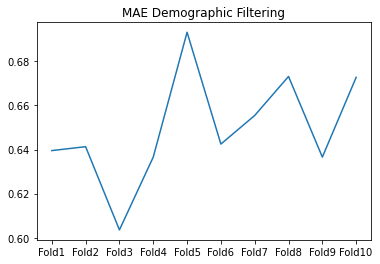

In [66]:
label_fold = ['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7','Fold8','Fold9','Fold10']
plt.plot(label_fold,mae_df)
plt.title('MAE Demographic Filtering')

Text(0.5, 1.0, 'RMSE Demographic Filtering')

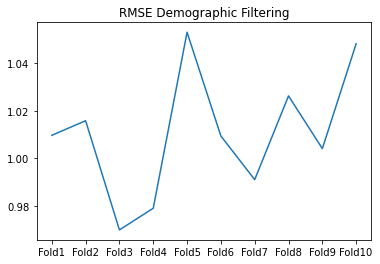

In [65]:
label_fold = ['Fold1','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7','Fold8','Fold9','Fold10']
plt.plot(label_fold,rmse_df)
plt.title('RMSE Demographic Filtering')

In [115]:
plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = (15, 5)

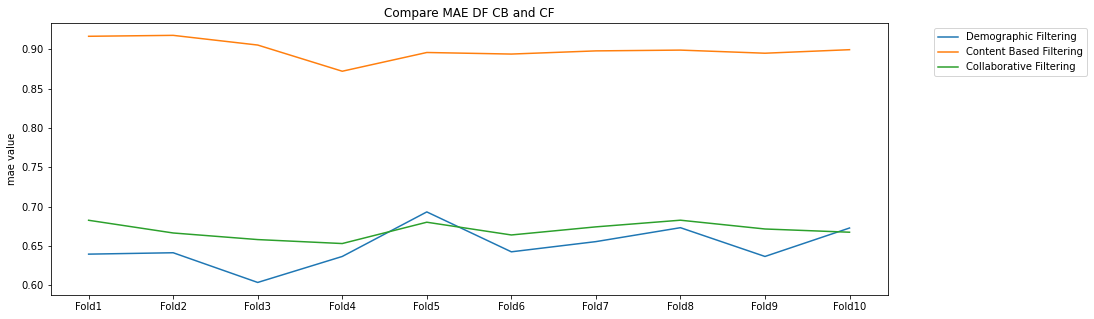

In [116]:
plt.plot(label_fold, mae_df, label='Demographic Filtering')  
plt.plot(label_fold, mae_cb, label='Content Based Filtering')
plt.plot(label_fold, mae_cf, label='Collaborative Filtering')
plt.ylabel('mae value')
plt.title("Compare MAE DF CB and CF")
plt.legend(bbox_to_anchor=(1.05, 1))

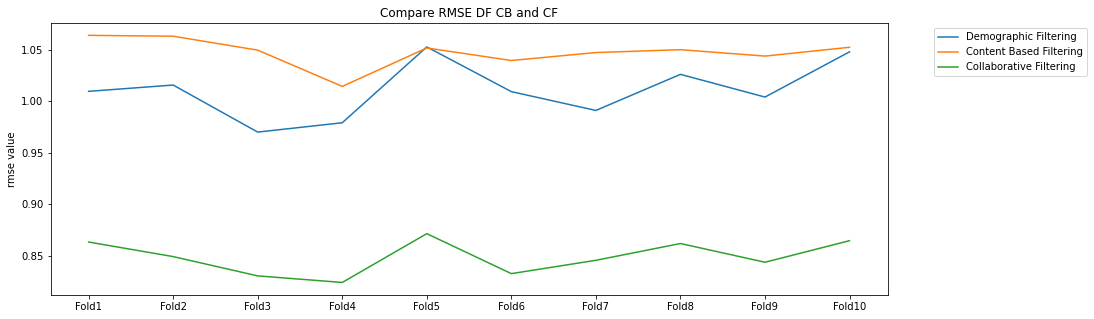

In [117]:
plt.plot(label_fold, rmse_df, label='Demographic Filtering')  
plt.plot(label_fold, rmse_cb, label='Content Based Filtering')
plt.plot(label_fold, rmse_cf, label='Collaborative Filtering')
plt.ylabel('rmse value')
plt.title("Compare RMSE DF CB and CF")
plt.legend(bbox_to_anchor=(1.05, 1))

### Find MAE and RMSE Weighted Method

### Find MAE and RMSE Combine Weighted and Switching 

In [212]:
def combine_hybrid_testing(dt_testing,dt_training):
    rating_pred = []
    for index,row in dt_testing.iterrows():
        user_id = row['user_id']
        destination_id = row['destination_id']
        rating_pred.append(hybrid_combine_pred(user_id,destination_id,dt_training))
    return rating_pred

In [223]:
begin_time = datetime.datetime.now()
print(1)
rating_pred_combine_hybrid = combine_hybrid_testing(dt_fold_testing1,dt_fold_training1)
# print(2)
# rating_pred_cb_fold2 = content_based_testing(dt_fold_testing2,dt_fold_training2)
# print(3)
# rating_pred_cb_fold3 = content_based_testing(dt_fold_testing3,dt_fold_training3)
# print(4)
# rating_pred_cb_fold4 = content_based_testing(dt_fold_testing4,dt_fold_training4)
# print(5)
# rating_pred_cb_fold5 = content_based_testing(dt_fold_testing5,dt_fold_training5)
# print(6)
# rating_pred_cb_fold6 = content_based_testing(dt_fold_testing6,dt_fold_training6)
# print(7)
# rating_pred_cb_fold7 = content_based_testing(dt_fold_testing7,dt_fold_training7)
# print(8)
# rating_pred_cb_fold8 = content_based_testing(dt_fold_testing8,dt_fold_training8)
# print(9)
# rating_pred_cb_fold9 = content_based_testing(dt_fold_testing9,dt_fold_training9)
# print(10)
# rating_pred_cb_fold10 = content_based_testing(dt_fold_testing10,dt_fold_training10)
print(datetime.datetime.now() - begin_time)

1
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamm

SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk demo
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
masuk weighted
SVC(C=1, decision_function_

SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='poly')
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_s

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_functi

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk demo
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=100, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=1

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk demo
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.

SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
masuk weighted
SVC(C=10, decision_fun

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=100, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=100, decision_function_shape='ovo', gam

SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk wei

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=100, decision_function_shape='ovo', gamma=0.001)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
m

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.1)
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_functio

SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='sigmoid')
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=0.1)
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C

SVC(C=1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.01)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='poly')
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=0.1, kernel='sigmoid')
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1, ke

SVC(C=100, decision_function_shape='ovo', gamma=0.001)
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=100, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=10, decision_function_shape='ovo', gamma=0.01, kernel='sigmoid')
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape='ovo', gamma=1)
masuk weighted
SVC(C=0.1, decision_function_shape=

In [224]:
print('MAE and RMSE fold 1')
print(find_mae(rating_pred_combine_hybrid,y_test1))
print(find_rmse(rating_pred_combine_hybrid,y_test1))

MAE and RMSE fold 1
0.8384067765649
1.0010694135239993
